# Methdods: Data Analysis

In this document, I aim to make reproduction of our results as easy as possible. All data is stored in and downloaded from [our main Spreadsheet](https://docs.google.com/spreadsheets/d/1eIdupjcWapVGPNMNTeKbnaPIroOXP6taFhrDMn5z3D4/edit?usp=sharing), but you can also change this part to ingest any files or else. Once all the data is successfully loaded, all calculations and figure generation should be fully automatic. Please notify constantin.goeldel@tum.de if you come across any issues.

To replicate our results, optain the datasets, then run all the cells. The data in the spreadsheet is just the content of the results.txt file you will get when running the metaprofile application.

In [141]:
# Link to the datsets
!wget https://syncandshare.lrz.de/dl/fiGJnLiRVUR4q5ijx7vgd8/methylomes.tar.gz
!tar -xzf methylomes.tar.gz

--2023-12-04 12:42:47--  https://syncandshare.lrz.de/dl/fiGJnLiRVUR4q5ijx7vgd8/methylomes.tar.gz
Resolving syncandshare.lrz.de (syncandshare.lrz.de)... 129.187.255.213
Connecting to syncandshare.lrz.de (syncandshare.lrz.de)|129.187.255.213|:443... connected.
HTTP request sent, awaiting response... 

403 Download link expired
2023-12-04 12:42:47 ERROR 403: Download link expired.

tar (child): methylomes.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [142]:
# Install Rust (shown for Linux/WSL otherwise see https://www.rust-lang.org/tools/install)
# !curl --proto '=https' --tlsv1.2 -sSf https://sh.rustup.rs | sh

# # Install the alphabeta & metaprofile binaries 
# !cargo install alphabeta

# # WT
# !metaprofile \
# -m ./methylomes/wt/MA3_new_total_original_methylome/ \
# -g ./methylomes/gbM_gene_anotation_extract_Arabidopsis.bed \
# -o ./methylomes/wt \
# --name wildtype \
# -s 1 -w 5 \ 
# alphabeta \
# -e ./wt_edgelist.txt \
# -n ./wt_nodelist.txt 


# # CMT3
# !metaprofile \
# -m ./methylomes/cmt3/total_original_methylome \
# -g ./methylomes/gbM_gene_anotation_extract_Arabidopsis.bed \
# -o ./methylomes/cmt3 \
# --name cmt3 \
# -s 1 -w 5 \
# alphabeta \
# -e ./cmt3_edgelist.txt \
# -n ./cmt3_nodelist.txt 

# #suv 4/5/6
# !metaprofile \
# -m ./methylomes/suv/total_original_methylome \
# -g ./methylomes/gbM_gene_anotation_extract_Arabidopsis.bed \
# -o ./methylomes/suv \
# --name suv \
# -s 1 -w 5 \
# alphabeta \
# -e ./SUV456_edgelist.txt \
# -n ./SUV456_nodelist.txt 

In [143]:
%pip install gspread oauth2client numpy matplotlib scipy

Note: you may need to restart the kernel to use updated packages.


Connect to Google Sheets API

In [166]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# authorize the API client with the credentials
client = gspread.oauth()

# open the Google Sheets document by its URL or ID
sheet = client.open_by_url('https://docs.google.com/spreadsheets/d/1eIdupjcWapVGPNMNTeKbnaPIroOXP6taFhrDMn5z3D4/edit#gid=1888658763')
# alternatively, you can open by the sheet ID only: client.open_by_key('your_sheet_id')

# get the worksheet by its name or index
worksheet = sheet.worksheet('2023_01_13_relative_5_1')
# alternatively, you can get by index: sheet.get_worksheet(0)

# fetch the data from the worksheet as a list of lists
data = worksheet.get_all_values()

mods = sheet.worksheet("Mods").get_all_values()

bivariate_raw = sheet.worksheet("Bivariate Analysis").get_all_values()

cmt3raw = sheet.worksheet("CMT3 Confirmation").get_all_values()
suvraw = sheet.worksheet("SUV Confirmation").get_all_values() 
wt_new_raw = sheet.worksheet("WT Confirmation").get_all_values()
MA3_UM_raw = sheet.worksheet("MA3_UM 04.12.23").get_all_values()
MA3_teM_raw = sheet.worksheet("MA3_teM 04.12.23").get_all_values()

D_dt_raw = sheet.worksheet("D_dt").get_all_values()

meth_lvl_raw = sheet.worksheet("meth_lvl").get_all_values()

Load data into numpy arrays

In [179]:
import numpy as np
import pandas as pd

hist_mods = pd.DataFrame(mods[1:], columns=mods[0])
hist_mods = hist_mods.drop(columns=["Window"])
hist_mods = hist_mods.rolling(10, step=10).sum()
# TODO: improve this
hist_mods.iloc[0] = hist_mods.iloc[1]
display(hist_mods)

headers, wt_pre = data[0], data[1:]
mods_headers, mod_pre = mods[0], mods[1:]
cmt3_headers, cmt3_pre = cmt3raw[0], cmt3raw[1:]
suv_headers, suv_pre = suvraw[0], suvraw[1:]
bivariate_headers, bivariate_pre = bivariate_raw[0], bivariate_raw[1:]
D_dt_headers, D_dt_pre = D_dt_raw[0], D_dt_raw[1:]
wt_new_headers, wt_new_pre = wt_new_raw[0], wt_new_raw[1:]
MA3_UM_headers, MA3_UM_pre = MA3_UM_raw[0], MA3_UM_raw[1:]
MA3_teM_headers, MA3_teM_pre = MA3_teM_raw[0], MA3_teM_raw[1:]



wt = np.array(wt_pre, dtype=np.float32)
mod = np.array(mod_pre, dtype=np.float32)
cmt3 = np.array(cmt3_pre, dtype=np.float32)
suv = np.array(suv_pre, dtype=np.float32)
bivariate = np.array(bivariate_pre, dtype=np.float32)
D_dt = np.array(D_dt_pre, dtype=np.float32)
wt_new = np.array(wt_new_pre, dtype=np.float32)
MA3_UM = np.array(MA3_UM_pre, dtype=np.float32)
MA3_teM = np.array(MA3_teM_pre, dtype=np.float32)
meth_lvl = [ meth_lvl_raw[i+1][7] for i in range(8)]

u = [i for i in range(-500, 0, 5)]
g=  [i for i in range(0, 1000, 10)]
d = [i for i in range(1000, 1500, 5)]

x = u + g + d


obs = wt_new[:, wt_new_headers.index('obs_steady_state')]
pred = wt_new[:, wt_new_headers.index('pred_steady_state')]
alpha = wt_new[:, wt_new_headers.index('alpha')]
beta = wt_new[:, wt_new_headers.index('beta')]
alpha_ci_lower = wt_new[:, wt_new_headers.index("ci_alpha_0.025")]
alpha_ci_upper = wt_new[:, wt_new_headers.index("ci_alpha_0.975")]
beta_ci_lower = wt_new[:, wt_new_headers.index("ci_beta_0.025")]
beta_ci_upper = wt_new[:, wt_new_headers.index("ci_beta_0.975")]
cg_int = bivariate[:, bivariate_headers.index('CG Density')]
cg_density = cg_int * 100  / (3955 * 5314 * 14) # Division into 100 windows, Average gene length 3955 bp, Number of genes 5314, 14 separate WGBS samples
h2az = bivariate[:, bivariate_headers.index('H2AZ')]  / (5314 * 14)
# h2az_compressed = [sum(h2az[i:i+10]) for i in range(0, len(h2az), 10)]
UM_alpha = MA3_UM[:, MA3_UM_headers.index('alpha')]
UM_beta = MA3_UM[:, MA3_UM_headers.index('beta')]
teM_alpha = MA3_teM[:, MA3_teM_headers.index('alpha')]
teM_beta = MA3_teM[:, MA3_teM_headers.index('beta')]

H2AZ       H3  H3K4Me1  H3K4me3  H3K27me3  H3K36me3  H3K56ac    Input
0         NaN      NaN      NaN      NaN       NaN       NaN      NaN      NaN
10    67484.0  47069.0  58405.0  35162.0   21191.0   47707.0  51757.0  28338.0
20    67359.0  47050.0  58621.0  35334.0   21259.0   47823.0  51700.0  28555.0
30    67637.0  46825.0  58984.0  35375.0   21435.0   48024.0  51752.0  28199.0
40    67588.0  47089.0  58513.0  35236.0   21345.0   48106.0  51940.0  28339.0
...       ...      ...      ...      ...       ...       ...      ...      ...
2950  68479.0  47197.0  59035.0  35263.0   21819.0   47884.0  51340.0  28533.0
2960  68185.0  47073.0  58859.0  35424.0   22044.0   47670.0  51328.0  28590.0
2970  68612.0  47326.0  58908.0  35234.0   21813.0   47581.0  51282.0  28718.0
2980  68536.0  46932.0  59308.0  35046.0   22054.0   47576.0  51693.0  28857.0
2990  68851.0  47204.0  59073.0  35045.0   21739.0   47643.0  51465.0  28471.0

[300 rows x 8 columns]

H2AZ       H3  H3K4Me1  H3K4me3  H3K27me3  H3K36me3  H3K56ac    Input
0     67484.0  47069.0  58405.0  35162.0   21191.0   47707.0  51757.0  28338.0
10    67484.0  47069.0  58405.0  35162.0   21191.0   47707.0  51757.0  28338.0
20    67359.0  47050.0  58621.0  35334.0   21259.0   47823.0  51700.0  28555.0
30    67637.0  46825.0  58984.0  35375.0   21435.0   48024.0  51752.0  28199.0
40    67588.0  47089.0  58513.0  35236.0   21345.0   48106.0  51940.0  28339.0
...       ...      ...      ...      ...       ...       ...      ...      ...
2950  68479.0  47197.0  59035.0  35263.0   21819.0   47884.0  51340.0  28533.0
2960  68185.0  47073.0  58859.0  35424.0   22044.0   47670.0  51328.0  28590.0
2970  68612.0  47326.0  58908.0  35234.0   21813.0   47581.0  51282.0  28718.0
2980  68536.0  46932.0  59308.0  35046.0   22054.0   47576.0  51693.0  28857.0
2990  68851.0  47204.0  59073.0  35045.0   21739.0   47643.0  51465.0  28471.0

[300 rows x 8 columns]

In [146]:
print(len(x))

300


In [147]:
from matplotlib import pyplot as plt
# from matplotlib import font_manager

# # font_path = font_manager.findfont('Calibri')
# # plt.rcParams.update({'font.family': 'Calibri',
# #                      'font.size': 12})

## Fig. 3
- A: Observed vs predicted steady state methylation in in WT
- B: Alpha and Beta in WT
- C: CG density & H2AZ in WT

All above each other, connected TSS and TTS


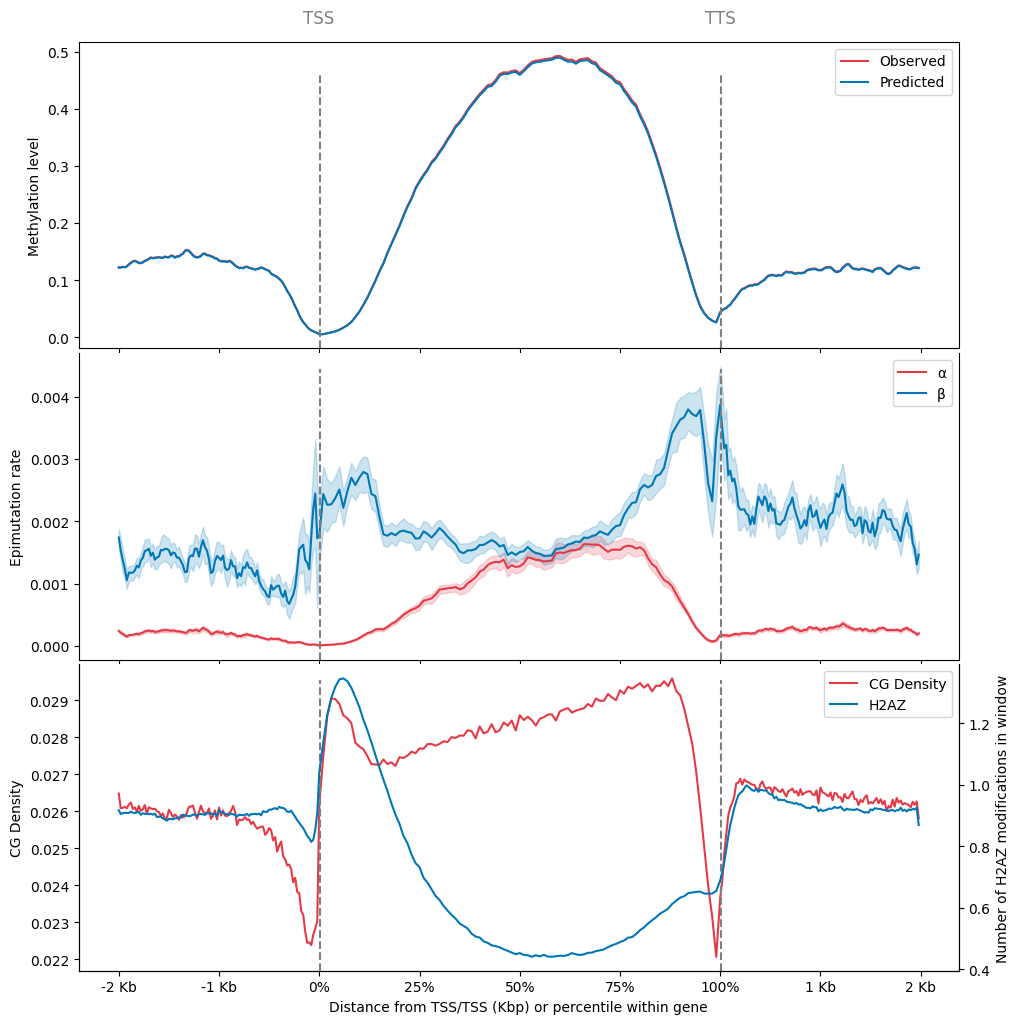

In [148]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1 ,sharex=True, figsize=(10,10)) 
ax4 = ax3.twinx() # instantiate a second axes that shares the same x-axis for H2AZ

r = "#e63946"
b = "#0077b6"
ax1.plot(x, obs, r, x, pred, b)
ax2.plot(x, alpha, r, x, beta, b)
ax2.fill_between(x, alpha_ci_lower, alpha_ci_upper, color=r, alpha=0.2)
ax2.fill_between(x, beta_ci_lower, beta_ci_upper, color=b, alpha=0.2)
c, = ax3.plot(x, cg_density, r, label='CG Density')
h, = ax4.plot(x, h2az, b, label='H2AZ')

def format_tick(x, pos): 
    if x < 0: 
        return f'{(x //250):.0f} Kb'
    elif x <= 1000:
        return f'{(x/10):.0f}%'
    else:
        return f'{((x -1000) // 250):.0f} Kb'
    
ax1.xaxis.set_major_formatter(plt.FuncFormatter(format_tick))
ax1.axvline(x=1,ymax=0.9, color='C7', linestyle='--')
ax1.axvline(x=1001, ymax=0.9,color='C7', linestyle='--')
ax1.annotate("TSS", xy=(0,0), xytext=(-40, 0.55),  color='C7', fontsize=12)
ax1.annotate("TTS", xy=(100,0), xytext=(962, 0.55),  color='C7', fontsize=12)
ax1.legend(['Observed', 'Predicted'], loc='upper right')
ax1.set_ylabel('Methylation level')



ax2.axvline(x=1,ymax=0.95, color='C7', linestyle='--')
ax2.axvline(x=1001, ymax=0.95,color='C7', linestyle='--')
ax2.legend(['α', 'β'], loc='upper right')
ax2.set_ylabel("Epimutation rate")

ax3.axvline(x=1,ymax=0.95, color='C7', linestyle='--')
ax3.axvline(x=1001, ymax=0.95,color='C7', linestyle='--')
ax3.legend([c,h],['CG Density', "H2AZ"], loc='upper right')
ax3.set_ylabel("CG Density")
ax3.set_xlabel('Distance from TSS/TSS (Kbp) or percentile within gene')
ax4.set_ylabel("Number of H2AZ modifications in window")


fig.tight_layout(pad=0)
ax2.spines['top'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax4.spines["top"].set_visible(False)



plt.savefig("3.png", dpi=120, bbox_inches="tight", pad_inches = 1)
plt.show()



## Fig. S1

- Comparison of wt, cmt3 and suv 

- Observed
- Alpha
- Beta

First, we need to calculate the statistical significance of the difference between each genotype for both alpha and beta. This is done by the compair function based on a t-test

In [149]:
from scipy import stats

# Samples a & b are lists of observables like alpha or beta, n is the number of samples in the pedigree
def compair(a,b, std_a, std_b,  n_a, n_b):
    
    t = (a-b) / np.sqrt( (std_a**2 + std_b**2)  )
    df = ((std_a**2 + std_b**2)**2) / ( (std_a**4 / (n_a-1)) + (std_b**4 / (n_b-1)) )
    p = stats.t.sf(np.abs(t), df)
    return p


In [150]:
wt_alphas = alpha
cmt3_alphas = cmt3[:, cmt3_headers.index("alpha")]
suv_alphas = suv[:, suv_headers.index("alpha")]

wt_betas = beta
cmt3_betas = cmt3[:,cmt3_headers.index("beta")]
suv_betas = suv[:,suv_headers.index("beta")]

wt_alpha_std = wt_new[:,wt_new_headers.index("sd_alpha")]
cmt3_alpha_std = cmt3[:,cmt3_headers.index("sd_alpha")]
suv_alpha_std = suv[:,suv_headers.index("sd_alpha")]

wt_beta_std = wt_new[:,wt_new_headers.index("sd_beta")]
cmt3_beta_std = cmt3[:,cmt3_headers.index("sd_beta")]
suv_beta_std = suv[:,suv_headers.index("sd_beta")]

def N(n):
    N = (n-1) * n/2
    return N

p_values = np.zeros((wt_alphas.shape[0], 6))

# Iterate over all windows
for w in range(0, wt_alphas.shape[0]):

    n_wt = 13
    n_cmt3 = 7
    n_suv = 15

    N_wt = N(n_wt)
    N_cmt3 = N(n_cmt3)
    N_suv = N(n_suv)

    # Calculate p-values for alpha and beta
    p_alpha_wt_cmt3 = compair(wt_alphas[w], cmt3_alphas[w], wt_alpha_std[w], cmt3_alpha_std[w], N_wt, N_cmt3)
    p_beta_wt_cmt3 = compair(wt_betas[w], cmt3_betas[w], wt_beta_std[w], cmt3_beta_std[w], N_wt, N_cmt3)

    p_alpha_wt_suv = compair(wt_alphas[w], suv_alphas[w], wt_alpha_std[w], suv_alpha_std[w], N_wt, N_suv)
    p_beta_wt_suv = compair(wt_betas[w], suv_betas[w], wt_beta_std[w], suv_beta_std[w], N_wt, N_suv)

    p_alpha_cmt3_suv = compair(cmt3_alphas[w], suv_alphas[w], cmt3_alpha_std[w], suv_alpha_std[w], N_cmt3, N_suv)
    p_beta_cmt3_suv = compair(cmt3_betas[w], suv_betas[w], cmt3_beta_std[w], suv_beta_std[w], N_cmt3, N_suv)

    # Print the results in CSV format
    p_values[w] = [p_alpha_wt_cmt3, p_beta_wt_cmt3, p_alpha_wt_suv, p_beta_wt_suv, p_alpha_cmt3_suv, p_beta_cmt3_suv]


significant = lambda x :   x < 0.05

significant_windows = significant(p_values)


    

/tmp/ipykernel_65771/518395233.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.yaxis.set_ticklabels(["CMT3 ⇄ SUV4/5/6", "WT ⇄ SUV4/5/6","WT ⇄ CMT3" ])
/tmp/ipykernel_65771/518395233.py:108: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax5.yaxis.set_ticklabels(["CMT3 ⇄ SUV4/5/6", "WT ⇄ SUV4/5/6","WT ⇄ CMT3" ])


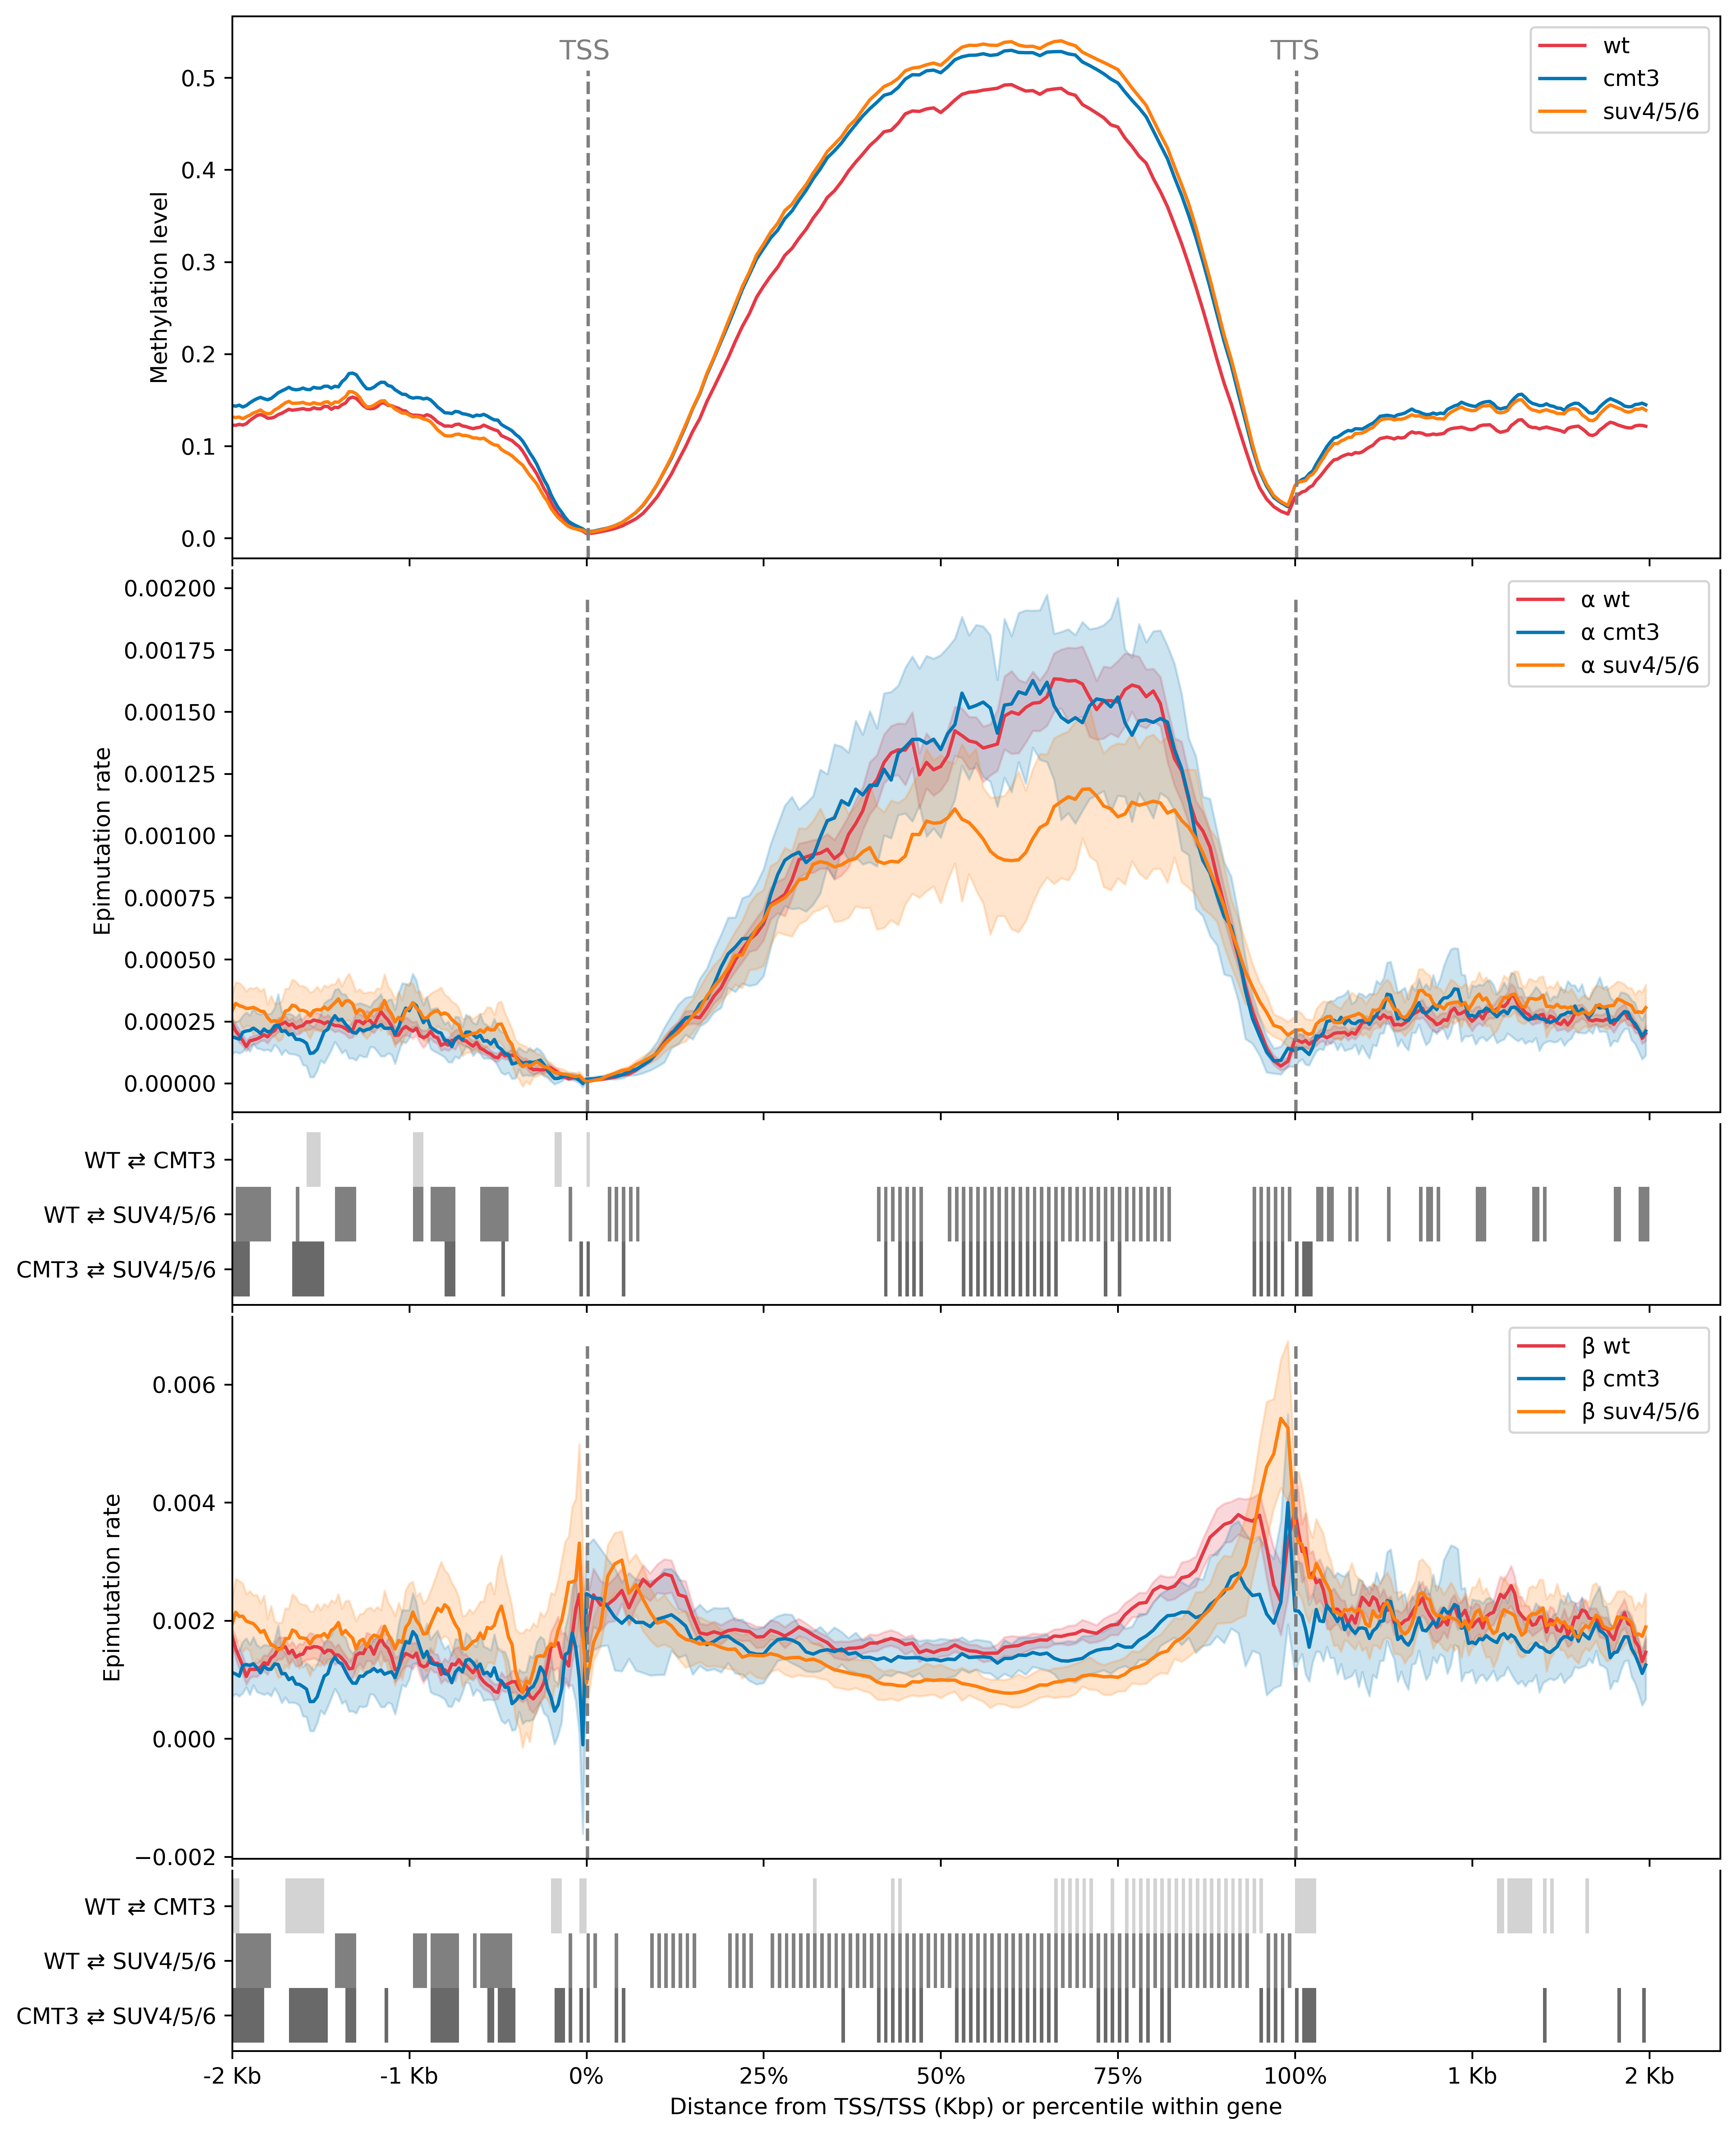

In [151]:
dpi = 450
fig, (ax1, ax2, ax3,ax4, ax5) = plt.subplots(5,1 ,sharex=True, figsize=(10,13) ,gridspec_kw={'height_ratios': [3,3, 1,3,1]}, dpi=dpi) 



r = "#e63946"
b = "#0077b6"
o = "C1"

wt_obs = wt_new[:, wt_new_headers.index('obs_steady_state')]
cmt_obs = cmt3[:, cmt3_headers.index('obs_steady_state')]
suv_obs = suv[:, suv_headers.index('obs_steady_state')]

cmt_alpha = cmt3[:, cmt3_headers.index('alpha')]
cmt_beta = cmt3[:, cmt3_headers.index('beta')]
cmt_alpha_ci_lower = cmt3[:, cmt3_headers.index("ci_alpha_0.025")]
cmt_alpha_ci_upper = cmt3[:, cmt3_headers.index("ci_alpha_0.975")]
cmt_beta_ci_lower = cmt3[:, cmt3_headers.index("ci_beta_0.025")]
cmt_beta_ci_upper = cmt3[:, cmt3_headers.index("ci_beta_0.975")]

suv_alpha = suv[:, suv_headers.index('alpha')]
suv_beta = suv[:, suv_headers.index('beta')]
suv_alpha_ci_lower = suv[:, suv_headers.index("ci_alpha_0.025")]
suv_alpha_ci_upper = suv[:, suv_headers.index("ci_alpha_0.975")]
suv_beta_ci_lower = suv[:, suv_headers.index("ci_beta_0.025")]
suv_beta_ci_upper = suv[:, suv_headers.index("ci_beta_0.975")]


def format_tick(x, pos): 
    if x < 0: 
        return f'{(x //250):.0f} Kb'
    elif x <= 1000:
        return f'{(x/10):.0f}%'
    else:
        return f'{((x -1000) // 250):.0f} Kb'
ax1.xaxis.set_major_formatter(plt.FuncFormatter(format_tick))
    
ax1.plot(x, wt_obs, r, x, cmt_obs, b, x, suv_obs, o)
ax1.axvline(x=2,ymax=0.9, color='C7', linestyle='--')
ax1.axvline(x=1002, ymax=0.9,color='C7', linestyle='--')
ax1.annotate("TSS", xy=(0,0), xytext=(-38, 0.52),  color='C7', fontsize=12)
ax1.annotate("TTS", xy=(100,0), xytext=(965, 0.52),  color='C7', fontsize=12)
ax1.legend(['wt', 'cmt3', "suv4/5/6"], loc='upper right')
ax1.set_ylabel('Methylation level')

# Pick every second entry, then reverse the order (the barplot is kinda upside down)
significant_alphas = significant_windows[:, 0::2][:, ::-1]
significant_betas = significant_windows[:, 1::2][:, ::-1]

ax2.plot(x, alpha, r, x, cmt_alpha, b, x, suv_alpha, o)
ax2.fill_between(x, alpha_ci_lower, alpha_ci_upper, color=r, alpha=0.2)
ax2.fill_between(x, cmt_alpha_ci_lower, cmt_alpha_ci_upper, color=b, alpha=0.2)
ax2.fill_between(x, suv_alpha_ci_lower, suv_alpha_ci_upper, color=o, alpha=0.2)
ax2.axvline(x=1,ymax=0.95, color='C7', linestyle='--')
ax2.axvline(x=1001, ymax=0.95,color='C7', linestyle='--')
ax2.legend(['α wt', 'α cmt3' , "α suv4/5/6"], loc='upper right')
ax2.set_ylabel("Epimutation rate")

label = [0,.05,.1]
colors = ["dimgray", "gray", "lightgray"]
for w in range(significant_windows.shape[0]):
    left = 0 
    if w < 100:
        left = w * 5 -500
    if w >= 100 and w < 200:
        left = (w-100) * 10
    if w >= 200:
        left = (w-200) * 5 + 1000

    
    ax3.barh(label, significant_alphas[w]*5,  color=colors, left=left, height=.05, )

ax4.plot(x, beta, r, x, cmt_beta, b, x, suv_beta, o)
ax4.fill_between(x, beta_ci_lower, beta_ci_upper, color=r, alpha=0.2)
ax4.fill_between(x, cmt_beta_ci_lower, cmt_beta_ci_upper, color=b, alpha=0.2)
ax4.fill_between(x, suv_beta_ci_lower, suv_beta_ci_upper, color=o, alpha=0.2)

ax4.axvline(x=1,ymax=0.95, color='C7', linestyle='--')
ax4.axvline(x=1001, ymax=0.95,color='C7', linestyle='--')
ax4.legend(['β wt', "β cmt3", "β suv4/5/6"], loc='upper right')
ax4.set_ylabel("Epimutation rate")
ax5.set_xlabel('Distance from TSS/TSS (Kbp) or percentile within gene')


for w in range(significant_windows.shape[0]):
    left = 0 
    if w < 100:
        left = w * 5 -500
    if w >= 100 and w < 200:
        left = (w-100) * 10
    if w >= 200:
        left = (w-200) * 5 + 1000

    
    ax5.barh(label, significant_betas[w]*5,  color=colors, left=left, height=.05)


fig.tight_layout(pad=0)
ax2.spines['top'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax5.spines['top'].set_visible(False)

ax3.yaxis.set_ticklabels(["CMT3 ⇄ SUV4/5/6", "WT ⇄ SUV4/5/6","WT ⇄ CMT3" ])
ax3.yaxis.set_ticks([0.0, 0.05, 0.1])


ax5.yaxis.set_ticklabels(["CMT3 ⇄ SUV4/5/6", "WT ⇄ SUV4/5/6","WT ⇄ CMT3" ])
ax5.yaxis.set_ticks([0.0, 0.05, 0.1])

plt.savefig("4.png",  bbox_inches="tight", pad_inches = 1)
plt.show()



Figure 3 right

- $\alpha$ vs CG Density
- $\alpha$ vs H2AZ

Show dotplot and lowess line

In [152]:
# Chromatine States in gbM genes, command: metaprofile -m ../chr_states -g ../genes/gbM_gene_anotation_extract_Arabidopsis.bed -o ../output/chr_states/gbM -w 1 -s 1

gbM_distribution = {
"S18":np.array([1,3,2,0,1,1,0,1,3,0,1,2,2,0,1,1,0,1,0,4,1,1,4,1,2,0,1,1,0,1,0,0,0,0,0,1,0,0,1,2,1,1,2,1,0,1,0,1,1,2,1,1,0,0,0,1,1,0,0,2,2,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,1,1,2,0,1,1,1,1,2,2,0,1,1,2,1,1,1,2,2,1,3,0,0,3,0,0,3,1,1,1,0,4,2,3,2,0,2,3,3,1,2,1,0,0,2,4,3,2,0,3,1,0,1,0,1,0,2,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0]),
"S09":np.array([5,1,7,3,5,3,4,3,5,2,3,5,2,3,1,3,4,5,4,2,3,1,3,2,3,5,2,4,3,4,2,8,4,3,2,2,4,1,3,2,2,1,1,2,3,2,1,2,2,3,2,4,3,3,1,3,4,1,3,2,2,2,4,1,2,1,1,1,1,2,2,2,2,4,3,3,4,3,1,3,2,5,4,1,4,3,2,0,2,1,0,1,1,0,1,2,2,0,2,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,2,1,0,1,2,1,0,0,0,1,0,1,1,0,0,0,0,2,3,3,2,5,1,2,6,4,7,2,2,5,4,0,0,4,3,3,1,3,2,0,2,4,2,3,1,2,3,3,4,4,1,4,2,3,3,6,8,3,4,5,4,1,4,3,5,4,3,4,5,0,3,4,1,4,2,3,2,7,3,2,3,2,4,1,3,1,2,3,3,6,4,4,5,5,6,5,2,3,2,2,2,4,3,3,3,4,1,0,0,0,0,0,0,0,0,0]),
"S10":np.array([3,7,8,9,16,9,4,11,8,12,5,8,10,5,8,10,6,7,8,7,13,10,12,8,11,11,12,11,6,9,15,14,10,10,14,19,7,13,13,14,18,9,10,18,15,14,17,12,13,17,18,10,8,16,13,17,11,12,9,4,9,8,4,5,1,4,3,3,5,3,2,3,2,4,1,2,2,1,1,2,2,0,0,1,0,0,0,2,1,2,3,0,1,1,0,2,2,0,0,0,2,0,2,3,4,6,9,14,22,28,34,53,43,65,58,56,76,43,55,65,57,66,64,76,50,51,47,46,54,51,48,49,31,31,29,32,33,25,20,22,22,21,19,20,19,19,17,23,20,14,18,21,25,18,19,34,29,20,28,34,31,40,41,33,48,44,38,41,48,63,49,78,67,68,51,51,72,59,55,54,51,48,44,54,40,46,32,28,26,23,17,12,14,10,6,2,2,1,0,4,0,1,1,1,1,2,3,2,4,0,0,0,0,1,5,3,0,4,2,3,3,6,5,3,4,7,8,2,16,21,20,9,15,19,21,31,24,32,35,24,19,41,21,21,24,24,19,20,20,22,29,22,22,20,21,17,17,19,22,19,21,11,13,17,10,9,12,13,19,15,20,6,18,16,18,13,14,12,18,15,13,8,15,8,14,11,10,10,5,6,3,0,0,0,0,0,0,0,0,0]),
"S28":np.array([13,10,2,5,6,7,6,6,4,9,7,12,6,6,11,6,6,6,7,5,8,6,12,13,11,5,7,5,6,10,9,3,6,7,7,8,10,10,3,7,7,3,10,7,12,9,8,7,11,9,8,7,7,6,6,9,6,8,14,12,10,12,11,7,9,13,14,14,20,14,9,13,17,11,14,12,18,6,13,16,15,12,15,16,11,17,14,14,7,18,14,9,6,12,7,3,6,9,7,1,4,5,7,7,2,2,0,1,1,1,0,0,0,0,1,4,1,0,0,1,1,2,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,2,0,5,1,1,1,0,2,0,3,0,4,3,1,3,3,4,5,9,8,9,18,21,19,26,44,12,20,24,15,21,21,20,19,20,18,22,19,30,23,16,19,15,11,15,14,10,12,15,15,15,9,12,16,18,8,11,15,20,8,15,8,12,8,15,15,9,9,13,15,7,11,6,8,7,8,8,10,8,12,16,13,11,12,10,7,9,6,5,7,7,13,14,9,10,8,7,6,6,7,5,5,9,4,9,8,4,4,6,8,6,4,7,8,8,8,1,0,0,0,0,0,0,0,0,0]),
"S30":np.array([6,4,9,7,3,9,3,7,6,5,10,6,6,1,5,3,3,3,5,2,3,4,3,6,6,2,4,6,4,3,4,6,5,10,5,1,1,8,1,5,3,6,5,2,3,3,8,1,4,3,5,3,2,4,5,4,7,2,5,5,4,4,6,2,4,2,5,3,5,7,4,6,3,1,3,7,5,7,8,6,4,7,8,9,14,19,10,12,13,6,12,19,23,22,48,51,57,73,79,65,98,76,48,33,18,15,11,3,5,6,3,0,5,1,3,2,2,3,1,0,0,1,0,0,0,1,1,1,1,0,1,0,0,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,2,0,0,0,1,2,0,1,0,0,1,3,0,2,0,4,2,1,1,3,4,4,4,8,4,13,10,25,33,33,45,64,89,114,122,156,148,106,71,10,11,15,9,8,15,14,17,11,14,13,14,6,10,2,7,7,5,9,10,9,10,8,6,4,6,9,10,4,3,9,5,3,6,6,10,2,7,5,3,4,9,4,3,9,7,1,4,7,6,8,6,6,12,5,7,12,7,8,6,4,4,3,7,9,13,8,8,9,7,6,7,6,12,11,7,9,12,7,7,5,10,4,5,10,14,8,11,6,4,1,0,0,0,0,0,0,0,0,0]),
"S26":np.array([4,4,5,15,8,9,5,8,4,4,7,5,3,4,3,7,6,6,3,3,7,8,4,4,6,5,5,3,5,7,5,2,2,5,6,2,5,2,3,2,7,5,4,6,1,6,6,4,5,7,3,5,5,10,7,8,10,8,8,6,3,7,5,5,7,4,5,5,7,6,11,7,7,3,11,10,7,15,9,7,12,12,11,18,14,16,21,24,17,24,14,20,28,29,16,19,14,17,7,6,17,9,8,12,3,5,4,1,6,6,1,1,5,2,2,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,1,0,2,1,1,1,2,2,0,1,0,4,1,1,4,0,1,2,1,0,4,3,2,9,10,7,6,14,27,28,32,39,46,57,68,62,38,25,17,18,22,19,16,16,13,10,13,14,14,11,13,8,10,7,11,5,5,6,7,4,6,7,11,10,8,11,5,7,8,9,7,8,10,8,5,5,10,5,8,6,10,3,5,4,5,7,5,6,5,7,5,6,4,7,8,7,7,4,4,6,8,5,4,8,10,9,7,4,6,5,6,13,6,4,4,6,7,6,7,2,10,7,1,4,4,9,1,0,0,0,0,0,0,0,0,0]),
"S14":np.array([2,4,2,4,6,1,5,8,2,1,2,2,4,5,6,4,5,3,2,3,5,2,5,4,4,2,0,6,3,2,2,7,6,4,3,4,5,4,2,4,7,5,4,5,7,4,6,3,4,4,6,5,8,3,5,5,6,3,5,11,5,7,7,4,9,6,5,7,8,11,10,13,8,10,19,15,9,13,9,17,16,11,11,13,13,13,6,6,9,11,2,2,5,5,7,3,4,5,4,5,14,24,36,42,46,40,46,41,40,34,34,19,13,10,3,7,9,7,7,1,3,5,2,2,5,4,4,2,2,1,1,1,1,0,1,1,1,1,1,2,4,3,5,0,4,3,0,0,3,1,4,0,2,3,0,0,2,3,2,5,10,6,2,3,2,1,2,2,3,9,3,4,7,11,10,9,12,11,16,15,15,27,32,37,40,48,41,37,51,44,49,35,46,33,22,10,8,11,17,26,14,18,15,26,19,29,29,29,24,21,23,25,20,12,15,16,17,12,8,12,15,12,5,8,7,10,11,6,8,5,11,10,10,5,3,5,4,3,6,12,5,4,4,3,2,6,2,4,5,7,7,7,7,10,11,9,5,7,9,5,6,6,2,4,4,11,6,9,5,5,6,2,6,5,3,4,3,6,4,6,7,1,3,2,4,8,5,2,4,4,1,0,0,0,0,0,0,0,0,0]),
"S05":np.array([8,11,8,3,9,8,4,7,7,6,8,8,7,7,3,5,5,9,4,5,6,6,4,11,11,7,6,3,7,9,4,6,7,3,8,4,9,5,10,6,9,7,3,9,7,3,7,9,5,7,5,4,5,10,10,7,2,5,7,5,7,1,4,7,6,9,7,1,5,7,8,6,8,8,6,10,17,12,14,8,15,14,25,15,12,14,16,8,7,10,10,6,5,2,1,8,11,24,26,52,144,164,127,106,75,52,43,29,18,18,8,15,5,4,2,5,5,3,1,2,1,0,1,2,3,1,1,0,0,2,3,3,1,0,1,0,1,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,2,4,1,1,4,3,1,2,1,2,1,1,7,7,9,2,8,10,18,18,21,31,42,53,63,77,91,119,111,128,127,113,97,65,26,16,11,8,21,17,24,19,29,22,26,25,24,18,22,20,9,14,20,12,11,14,8,20,6,15,8,7,10,10,9,11,9,14,6,6,11,8,7,7,13,12,3,7,11,7,8,8,12,10,7,6,2,4,6,8,8,14,11,8,12,8,5,10,9,9,13,10,9,9,18,11,7,13,11,11,11,11,8,12,11,13,10,11,6,12,7,14,14,11,8,9,3,0,0,0,0,0,0,0,0,0]),
"S21":np.array([7,10,5,5,4,5,8,4,6,6,3,8,6,6,10,2,12,9,5,8,5,9,7,10,4,7,12,9,9,4,3,6,6,6,5,6,4,3,0,5,13,7,6,11,3,8,4,9,6,7,5,8,6,4,5,5,4,2,4,7,4,5,6,2,4,6,5,2,5,5,3,1,3,2,4,6,3,1,2,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,1,0,0,1,3,1,0,4,4,1,1,2,2,2,1,1,2,2,1,0,0,1,1,1,4,1,2,1,0,0,1,0,0,0,2,1,0,0,1,3,1,1,1,2,1,2,2,0,1,2,1,0,0,2,0,0,1,1,2,0,1,0,2,1,1,1,1,1,0,0,1,2,1,1,2,1,0,2,1,0,1,2,0,0,0,3,1,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,2,1,3,4,4,2,2,3,1,1,7,8,5,6,7,11,8,7,5,4,9,5,11,7,8,6,6,6,4,14,6,3,8,12,10,8,3,5,7,3,9,5,7,9,10,6,8,5,11,2,6,12,4,9,6,3,4,7,7,7,6,9,9,9,9,4,8,6,4,5,7,5,3,4,5,3,2,3,1,4,1,2,6,2,4,0,0,0,0,0,0,0,0,0,0]),
"S34":np.array([10,10,14,11,11,11,14,6,11,5,9,11,10,9,17,13,9,12,13,9,11,7,11,12,6,9,10,7,3,12,7,9,8,13,11,9,13,5,11,13,5,8,8,13,11,5,10,7,8,11,8,9,8,7,9,10,12,14,9,5,13,16,10,16,12,16,21,16,16,17,16,8,18,15,10,15,9,9,3,5,10,5,2,4,2,1,3,3,0,2,1,2,1,2,1,2,1,4,7,11,39,77,100,152,152,166,154,166,112,110,104,69,72,56,35,40,28,17,23,23,15,7,5,6,10,8,6,2,5,4,4,2,3,6,2,6,1,3,2,0,1,1,2,1,1,3,2,2,1,2,3,3,2,3,2,2,4,1,9,6,4,6,8,13,13,14,16,23,21,27,30,26,30,45,45,60,61,62,76,74,80,72,91,94,110,98,107,94,102,111,105,89,63,72,42,41,26,9,9,0,4,3,4,4,7,11,11,12,17,30,11,30,38,24,31,38,33,42,37,30,24,29,34,19,21,23,20,20,13,21,20,16,18,15,7,18,24,14,12,11,14,11,7,14,17,21,14,16,17,15,17,21,19,13,19,13,10,19,13,8,18,14,15,19,9,14,18,17,13,10,12,16,13,15,19,18,12,19,16,15,13,8,14,7,5,7,8,8,10,8,2,0,0,0,0,0,0,0,0,0]),
"S32":np.array([10,7,4,6,11,10,7,4,8,7,7,8,6,9,7,5,6,5,8,8,1,7,7,5,5,5,8,2,11,3,6,4,4,4,6,7,3,5,4,13,6,10,6,4,6,6,5,6,6,13,6,11,5,12,6,14,7,4,13,6,11,14,16,18,11,15,7,16,10,15,19,13,17,28,24,24,21,17,22,23,29,27,20,29,24,23,30,37,37,40,36,23,27,46,38,45,33,31,40,46,89,111,101,89,78,70,63,43,60,32,31,22,19,11,12,8,7,10,10,5,11,9,9,6,6,3,5,9,6,4,8,7,5,2,2,4,5,4,2,4,3,0,5,3,3,3,3,1,2,2,4,4,5,5,6,8,3,5,3,4,5,10,10,3,1,9,10,7,11,16,8,7,17,16,17,26,37,30,43,48,45,59,65,75,84,78,117,111,118,154,152,137,132,131,132,96,70,41,20,13,7,9,15,13,14,18,17,12,18,20,25,26,27,32,33,34,28,24,25,17,20,19,16,10,17,24,16,7,17,18,10,14,8,14,6,9,16,14,12,13,14,16,10,9,9,13,9,4,11,9,9,8,7,10,5,17,8,19,15,14,11,5,15,9,10,13,8,4,12,8,9,7,9,8,9,13,5,7,10,8,7,3,7,6,11,4,9,11,3,8,2,0,0,0,0,0,0,0,0,0]),
"S08":np.array([6,3,7,3,8,4,0,5,5,5,3,3,6,3,4,3,3,4,6,6,6,4,6,3,4,4,3,5,6,7,7,7,3,6,2,3,5,3,4,3,4,3,4,6,9,6,7,4,5,1,6,3,4,2,6,3,3,4,7,4,4,5,4,7,8,5,3,5,5,8,10,4,6,2,10,8,5,12,9,9,10,8,16,11,17,21,15,28,25,28,21,37,25,32,33,23,22,12,15,6,13,10,6,2,2,4,2,4,1,1,0,0,1,0,2,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,2,1,0,0,1,2,2,3,2,0,4,6,11,8,21,30,49,39,80,87,101,33,41,24,24,15,13,14,10,5,13,8,13,7,10,14,6,6,10,7,11,7,8,5,7,5,7,1,5,6,6,9,8,6,5,9,4,6,4,7,4,4,7,6,5,5,9,8,2,5,10,3,5,4,5,5,3,4,3,3,6,3,3,5,8,8,5,5,7,3,3,8,5,6,3,7,3,4,8,12,4,5,4,4,4,4,4,8,3,5,1,2,0,0,0,0,0,0,0,0,0]),
"S36":np.array([7,5,8,7,6,5,16,11,13,12,15,6,11,7,10,8,3,5,5,7,8,16,4,12,11,8,10,9,10,8,4,11,9,12,12,8,11,10,10,6,8,17,12,7,13,13,9,8,8,10,12,13,10,8,12,9,19,10,12,8,9,12,10,15,10,11,10,14,11,17,14,13,13,17,22,19,15,21,18,24,21,32,41,29,33,37,38,43,34,44,46,61,49,45,41,33,27,26,24,15,40,37,20,18,8,8,6,4,4,5,3,1,1,0,0,2,0,0,2,2,2,0,1,1,2,0,2,1,1,2,2,1,0,1,2,2,1,1,1,0,0,2,1,0,0,0,0,0,0,0,0,0,1,1,0,3,1,0,0,2,1,1,0,1,2,2,1,1,2,1,0,1,3,3,1,0,2,3,4,4,5,4,3,0,3,8,8,14,8,15,27,26,29,53,58,71,77,91,82,113,51,56,54,52,55,48,41,48,47,31,32,29,19,22,18,27,27,17,23,14,15,15,14,13,11,13,15,18,18,11,9,12,11,10,11,11,15,9,9,18,12,15,17,12,14,17,17,8,15,13,13,14,10,14,16,12,12,11,9,11,9,12,13,11,12,12,10,17,13,10,8,5,6,12,11,15,10,18,11,9,12,8,12,10,12,8,5,15,12,16,3,0,0,0,0,0,0,0,0,0]),
"S15":np.array([2,6,3,4,7,7,4,6,9,5,5,10,7,4,8,5,2,4,6,5,5,8,8,7,3,7,8,4,7,6,9,6,9,7,4,3,4,8,6,8,6,6,7,3,6,3,7,4,2,5,5,9,5,4,9,3,4,8,9,5,1,0,3,6,6,5,3,7,4,3,3,3,8,7,8,10,5,7,4,5,10,11,9,8,8,5,10,9,8,5,6,15,15,15,31,28,32,39,33,30,34,38,22,19,13,12,15,18,3,5,6,7,11,5,5,5,6,1,2,1,5,2,4,2,2,2,1,1,2,0,3,0,1,1,1,2,0,0,0,0,0,2,1,0,1,1,0,2,1,2,0,1,1,2,1,1,1,0,1,0,5,3,4,4,3,1,0,3,5,6,4,5,6,6,9,7,12,9,7,7,12,9,7,7,7,8,7,17,11,24,27,22,31,38,50,34,47,60,60,28,7,12,14,10,6,5,13,9,15,12,10,7,10,6,8,9,9,3,8,4,5,5,6,6,7,5,8,10,11,6,10,8,2,11,9,13,14,8,7,6,5,7,11,11,8,8,11,3,6,8,7,6,6,4,7,5,8,7,8,6,11,9,8,7,5,11,4,7,8,3,11,10,6,2,10,2,6,8,11,8,8,7,7,12,13,12,5,9,8,6,4,0,0,0,0,0,0,0,0,0]),
"S04":np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
"S12":np.array([13,13,11,7,9,23,9,11,6,8,14,11,14,13,19,15,16,17,11,11,13,12,12,10,18,13,9,11,13,8,12,14,7,10,9,11,16,8,9,12,9,9,8,10,10,15,13,10,16,12,12,13,17,27,19,18,24,19,18,17,20,9,12,13,14,18,9,9,9,7,10,7,3,3,3,3,7,3,4,2,1,2,1,1,2,3,3,4,1,2,2,2,2,3,0,2,2,1,5,4,11,13,21,27,40,39,50,72,83,100,86,88,84,87,91,73,78,70,63,54,62,41,59,55,37,32,31,25,26,25,18,18,15,23,10,22,9,8,8,9,4,6,4,3,6,5,4,1,3,3,3,5,6,8,9,14,14,8,14,22,19,15,20,26,20,28,39,32,42,53,45,69,61,57,68,82,81,81,84,86,84,78,88,95,77,80,69,63,69,60,49,53,33,22,16,20,3,6,6,2,0,1,0,3,1,5,0,6,3,3,4,6,6,3,6,6,8,9,17,17,15,14,16,19,35,32,44,33,26,30,16,37,21,24,28,30,23,28,27,32,24,16,23,22,24,22,15,31,24,14,16,13,18,14,24,18,16,15,16,16,22,13,21,23,19,16,14,19,18,16,23,18,21,18,13,16,8,18,12,11,15,9,11,10,8,8,7,9,15,14,4,0,0,0,0,0,0,0,0,0]),
"S31":np.array([2,2,3,0,2,2,4,2,4,1,1,1,3,1,5,1,2,1,3,0,1,3,1,2,2,2,3,1,0,2,2,2,2,2,0,1,2,0,0,2,2,1,2,3,1,1,2,0,1,0,0,3,2,1,2,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,2,0,1,1,2,0,0,3,1,1,3,5,5,1,0,1,5,2,2,1,3,1,1,3,1,2,1,3,3,1,2,1,0,3,2,1,4,2,3,0,2,3,1,4,2,0,1,3,3,2,1,1,2,1,2,1,1,2,2,3,3,0,0,1,1,2,1,2,0,0,0,2,3,1,0,0,0,0,0,0,0,0,0]),
"S19":np.array([18,7,16,9,14,10,11,10,12,8,10,15,13,11,13,9,13,12,14,9,13,18,11,18,18,13,19,15,20,7,13,19,20,12,18,18,11,14,21,18,15,19,17,20,23,14,14,18,18,19,14,23,24,15,12,18,10,15,17,16,20,28,18,28,28,26,24,15,24,27,25,26,29,31,19,26,24,46,42,43,28,35,42,33,26,36,28,34,28,31,32,34,32,23,29,21,25,16,13,8,30,30,15,10,8,7,6,2,4,2,2,0,2,0,4,1,4,3,3,4,0,2,0,0,0,1,2,1,1,0,1,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,1,0,0,0,1,2,1,0,2,1,1,0,1,0,1,0,0,4,1,2,0,2,2,2,3,1,1,0,1,2,4,3,2,1,3,5,7,4,8,7,13,20,8,25,21,38,35,50,65,64,65,73,88,39,44,46,47,57,45,62,40,49,43,44,38,46,34,41,33,33,33,30,25,20,24,25,19,35,27,24,26,19,21,20,15,20,25,27,23,18,18,14,24,21,23,14,14,22,15,22,20,24,19,25,14,16,19,16,23,18,9,18,15,19,19,16,23,22,19,23,19,13,7,21,19,7,17,23,25,14,17,9,11,10,10,9,10,9,8,6,8,14,11,2,0,0,0,0,0,0,0,0,0]),
"S13":np.array([3,3,4,3,7,1,5,2,5,5,5,4,5,6,6,5,10,5,4,7,5,3,2,6,8,2,2,4,4,3,5,4,6,5,6,3,3,8,2,4,3,8,8,3,8,9,13,7,5,3,6,6,8,8,5,4,8,3,6,10,2,5,3,4,14,5,8,6,3,7,7,6,3,10,9,5,5,8,8,5,4,1,1,1,1,3,2,0,1,0,0,0,1,0,0,1,2,2,1,0,1,2,4,14,26,32,35,33,37,45,39,50,45,47,44,43,42,44,42,28,33,29,30,26,31,36,24,22,21,31,20,17,26,29,25,28,32,32,32,27,21,33,32,22,16,32,39,30,37,27,34,22,27,32,26,38,29,32,35,25,39,30,35,29,46,26,28,44,32,29,41,42,49,37,36,45,36,47,33,38,35,32,32,42,36,35,31,26,23,25,18,11,16,17,6,1,1,1,2,0,2,1,0,2,3,3,5,6,12,13,8,12,14,14,10,14,24,17,11,15,11,14,12,16,12,11,15,8,16,11,14,10,5,9,11,7,12,13,16,13,11,9,7,14,11,13,13,10,9,9,13,8,13,9,9,8,5,11,8,12,10,8,11,11,11,10,9,11,10,14,14,8,10,9,7,14,8,9,8,5,6,6,3,11,5,6,3,3,6,2,1,0,0,0,0,0,0,0,0,0]),
"S01":np.array([4,4,8,1,7,8,7,3,7,3,8,3,10,6,8,6,4,7,6,7,6,4,6,6,5,7,3,8,3,4,3,2,2,8,9,4,5,6,2,7,4,4,3,7,6,5,6,3,3,9,5,7,4,4,9,6,11,8,6,8,8,3,10,15,5,12,6,12,11,4,9,8,14,7,10,9,10,7,4,7,5,1,6,5,4,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,6,24,39,50,63,50,42,42,43,20,19,14,12,10,11,9,8,8,11,6,7,5,6,4,2,1,2,2,5,1,2,3,0,2,0,3,0,0,5,4,1,1,0,0,0,1,0,0,1,0,0,1,2,1,1,0,0,1,2,3,4,3,2,2,3,7,4,4,7,9,8,5,10,5,10,9,9,14,22,16,16,25,14,40,26,31,36,26,35,27,53,39,29,24,27,18,12,5,4,2,3,3,2,2,4,8,6,9,11,10,17,9,14,10,14,18,22,11,9,14,10,9,7,15,10,14,12,9,15,10,5,12,6,7,12,8,7,9,10,15,6,12,8,9,6,7,11,9,11,10,10,7,6,8,5,13,4,14,8,6,12,8,9,11,8,8,9,9,13,9,4,7,4,9,6,12,7,11,6,6,10,3,8,11,10,8,6,12,7,6,1,0,0,0,0,0,0,0,0,0]),
"S02":np.array([5,4,4,5,3,5,4,7,4,6,5,9,2,6,7,3,7,3,5,3,3,3,5,6,6,12,7,8,11,15,7,6,7,7,4,8,9,10,6,7,4,8,6,8,10,9,1,8,12,8,9,8,7,10,18,14,8,7,6,8,9,5,9,13,13,13,12,7,13,11,11,4,8,8,12,8,6,4,3,3,4,3,3,4,3,6,2,5,4,0,2,0,0,0,0,3,2,0,3,3,6,11,25,27,42,46,85,85,76,91,98,100,97,69,98,83,77,81,64,55,52,44,47,56,40,48,29,28,25,30,23,24,27,29,26,17,20,18,16,18,15,16,21,16,12,10,22,18,12,17,31,25,26,35,24,35,34,37,32,42,45,48,41,57,59,60,58,79,60,81,75,77,69,77,84,69,75,82,68,67,75,59,71,66,47,46,58,44,30,28,22,14,13,6,11,6,5,5,4,4,3,3,5,5,10,13,8,4,9,18,13,22,14,18,29,24,23,17,30,27,29,29,26,31,23,20,25,24,20,19,14,20,19,19,22,29,17,11,13,16,18,14,15,11,15,17,14,16,17,11,12,10,21,5,14,14,16,8,13,5,13,8,9,13,8,14,15,9,11,10,7,12,8,14,7,12,2,9,11,14,9,6,7,9,4,9,5,3,4,3,2,0,0,0,0,0,0,0,0,0]),
"S07":np.array([7,4,7,4,3,8,10,8,4,4,10,13,10,10,14,9,9,12,7,9,3,6,3,5,6,6,9,9,11,9,6,7,7,9,15,15,13,4,4,8,8,9,5,9,5,6,5,5,2,5,4,3,4,7,6,2,3,4,3,3,1,1,0,2,2,0,1,3,0,0,2,2,1,0,0,0,0,0,2,0,1,1,0,0,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,2,1,0,2,1,7,8,12,12,21,25,33,49,46,67,66,77,86,96,86,92,100,91,114,109,132,129,125,127,114,150,140,127,145,134,111,140,155,131,141,113,126,132,133,115,122,114,92,110,95,119,112,125,119,99,118,118,115,91,114,90,101,90,84,89,96,89,85,56,57,54,62,55,57,52,52,48,40,38,41,30,36,25,30,25,18,16,8,8,5,6,3,7,2,5,5,2,1,1,2,0,0,1,1,0,2,1,1,1,3,3,0,1,2,0,2,0,2,3,1,3,2,6,1,9,12,12,6,8,8,10,14,10,15,12,12,8,14,20,18,18,22,21,20,21,31,23,21,27,20,19,19,19,19,23,18,15,14,13,21,15,19,21,14,22,12,12,16,15,15,12,6,16,9,8,12,11,10,9,9,9,7,5,9,10,8,4,7,12,10,2,0,0,0,0,0,0,0,0,0]),
"S27":np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]),
"S23":np.array([5,4,3,4,4,3,10,2,5,2,8,4,6,8,4,5,5,6,8,7,4,6,6,7,6,7,8,11,5,8,6,6,6,4,4,5,7,4,13,4,2,4,13,7,8,1,1,7,9,5,4,7,10,6,12,9,9,7,5,4,2,5,7,2,2,0,3,8,8,4,2,5,2,2,6,3,2,3,5,5,2,2,0,2,4,2,0,0,0,3,1,0,1,0,0,3,3,1,3,1,3,7,6,7,5,9,5,13,17,8,5,12,9,9,4,1,5,5,7,8,8,7,0,2,3,0,7,7,1,1,3,4,3,5,1,1,0,0,1,2,0,4,1,0,4,3,3,2,0,0,1,1,1,1,2,0,4,3,2,1,1,2,6,4,8,5,4,9,4,2,9,10,6,7,5,9,6,7,2,6,12,6,8,9,7,10,5,3,10,9,8,9,3,4,2,1,3,2,1,1,0,1,3,3,1,4,2,6,6,9,11,8,8,12,14,6,10,8,12,11,12,6,6,6,12,11,13,11,9,16,10,8,9,9,5,12,7,8,8,11,9,7,4,10,4,6,7,10,9,8,7,8,7,7,6,7,8,5,9,3,5,6,3,10,7,9,5,10,4,8,7,6,5,3,5,6,5,6,3,7,7,1,6,5,2,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0]),
"S16":np.array([6,7,9,6,10,6,7,6,13,6,9,9,12,6,7,7,13,7,7,8,5,6,6,10,6,8,8,7,5,5,3,7,3,10,8,3,7,10,6,10,5,5,8,6,7,8,5,4,4,6,4,2,1,5,6,7,6,6,2,3,7,2,4,3,9,8,2,1,5,1,3,4,4,0,2,3,1,2,1,3,0,0,1,1,2,4,0,0,2,0,0,3,2,2,0,0,0,2,2,2,2,3,4,0,1,0,2,4,3,3,1,0,1,5,1,1,0,2,1,3,2,0,0,0,1,0,2,0,1,2,0,0,2,3,2,0,1,2,1,2,0,0,0,1,1,0,0,2,0,2,1,1,0,2,1,1,0,0,1,2,1,1,1,2,1,4,0,0,2,0,1,1,0,2,2,2,2,0,1,0,1,0,1,2,1,1,2,1,1,0,1,2,0,2,0,1,1,2,0,1,0,1,0,0,0,0,1,1,2,1,1,1,7,4,4,8,4,6,8,8,10,3,3,4,10,8,6,6,4,11,6,9,6,10,6,8,7,9,9,14,5,6,5,5,5,5,7,13,9,10,4,4,6,6,5,11,8,6,7,7,9,9,4,9,7,10,4,6,4,10,4,4,7,7,7,3,6,1,9,10,10,2,3,2,5,4,3,5,3,4,1,0,0,0,0,0,0,0,0,0]),
"S11":np.array([8,8,12,8,9,10,10,9,8,8,5,10,7,13,5,6,5,3,10,9,9,5,8,4,7,5,9,9,5,9,9,5,4,9,6,12,9,6,8,4,3,9,8,7,4,10,9,8,9,5,7,4,7,6,10,9,8,3,6,6,5,6,13,11,5,4,9,9,7,6,7,9,7,7,2,6,4,4,4,5,5,8,3,3,1,4,4,2,2,2,0,0,0,1,4,1,3,2,2,1,0,1,2,0,1,2,1,1,1,1,0,2,1,1,1,0,0,2,1,1,0,0,0,0,3,3,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,2,1,0,1,1,1,4,1,1,3,1,1,0,0,0,1,0,0,0,2,1,2,0,0,1,2,1,1,0,1,1,1,0,2,1,0,0,0,1,0,0,0,0,2,3,1,0,2,2,0,2,0,1,5,4,6,2,4,1,3,2,3,2,4,4,5,6,10,8,3,4,5,7,7,6,11,14,8,5,13,11,10,8,12,5,13,8,7,6,5,5,8,7,8,9,7,13,10,7,9,14,11,13,5,4,7,5,5,8,3,3,7,8,7,13,11,13,6,5,7,5,4,9,11,6,10,9,14,7,4,11,11,6,5,7,6,4,3,4,3,4,5,6,3,3,4,5,3,0,0,0,0,0,0,0,0,0]),
"S24":np.array([2,0,1,0,0,3,5,5,1,0,0,0,3,0,2,1,0,1,0,2,2,1,0,0,1,0,1,0,3,3,2,0,1,1,3,1,2,2,2,2,2,3,1,1,0,2,1,2,0,0,1,0,1,1,2,2,2,0,4,2,1,1,0,0,0,1,1,0,0,1,3,1,1,1,0,0,0,2,1,1,0,2,0,0,2,0,0,0,1,0,0,1,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,0,0,0,1,2,0,0,0,1,0,0,0,1,0,0,1,1,0,2,0,0,1,1,0,1,0,0,0,1,0,2,2,0,2,2,2,0,0,1,0,0,1,0,2,1,1,2,0,2,3,3,5,3,3,3,3,3,5,2,2,3,1,0,2,2,1,1,4,3,1,3,5,2,2,1,2,3,1,1,1,3,1,1,2,0,0,1,2,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0]),
"S35":np.array([12,11,12,16,12,11,13,13,15,24,7,11,11,10,17,16,22,12,20,17,8,15,14,16,14,13,14,16,16,18,10,17,17,13,10,14,20,15,15,11,14,17,9,22,9,12,17,21,21,13,15,23,16,19,16,10,14,21,24,13,27,18,20,27,17,27,10,10,26,15,12,20,23,21,19,28,25,22,14,9,25,26,13,24,16,14,12,9,15,9,14,13,13,6,7,15,6,9,9,12,15,14,10,9,8,4,4,7,4,3,1,3,3,4,4,4,2,0,2,2,3,4,3,2,0,0,1,2,2,0,2,2,1,1,3,3,2,1,1,0,3,3,0,1,0,1,0,0,1,1,1,1,0,0,0,1,3,1,0,2,0,0,1,2,3,3,5,3,1,2,2,0,2,2,2,2,2,1,1,4,5,5,10,9,7,8,8,15,16,20,21,17,23,39,44,32,44,49,41,39,18,14,28,20,21,31,40,34,39,43,35,32,37,30,36,45,39,33,29,21,26,25,20,17,12,17,16,16,26,17,16,17,24,12,18,13,12,12,10,10,13,11,16,7,11,18,15,12,9,12,9,14,12,9,14,9,10,15,8,11,13,14,7,7,13,10,12,6,8,11,13,10,11,9,6,12,12,5,14,7,3,3,3,4,1,4,1,1,3,3,1,0,0,0,0,0,0,0,0,0]),
"S25":np.array([1,2,4,1,0,0,1,0,0,3,2,0,0,1,1,0,0,0,1,0,4,0,0,0,0,2,0,0,0,0,0,2,1,3,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,1,2,1,3,3,0,0,1,1,0,3,0,0,0,2,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,1,0,2,1,1,0,1,1,1,0,0,0,1,1,3,3,2,1,6,2,2,3,0,1,2,1,0,0,2,3,1,0,1,1,1,2,0,0,0,2,2,2,1,0,1,0,2,2,0,2,0,0,1,1,2,1,1,4,2,1,0,1,1,0,0,2,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0]),
"S03":np.array([4,10,9,4,4,4,7,3,8,4,3,3,5,7,4,5,5,4,5,8,5,6,6,8,2,5,8,3,6,7,4,7,2,7,6,5,3,3,8,3,3,7,3,9,4,10,6,3,7,3,6,3,5,6,7,7,6,8,9,6,3,6,2,5,5,7,10,3,6,7,9,7,10,8,12,8,7,6,6,8,9,2,4,3,1,5,4,2,2,4,2,1,0,0,0,2,1,1,0,3,1,3,2,0,0,0,1,0,0,4,1,0,1,1,0,0,1,0,1,2,0,0,2,1,0,0,1,0,0,0,2,1,1,0,0,0,0,0,0,1,0,0,1,3,0,0,0,1,0,1,0,0,0,2,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,1,1,0,0,0,1,3,1,0,0,2,3,1,0,1,2,2,1,1,0,0,2,1,1,1,5,5,3,4,2,5,8,9,6,9,8,9,9,13,9,8,8,13,11,4,14,9,15,11,16,7,15,10,16,11,5,7,2,6,8,6,8,8,5,3,6,4,6,6,4,4,4,6,6,4,9,6,6,6,4,2,6,8,8,5,2,3,4,2,5,1,6,4,4,7,8,12,4,7,2,0,6,1,1,3,4,7,5,5,3,1,1,0,1,2,4,0,1,0,0,0,0,0,0,0,0,0]),
"S17":np.array([6,0,9,1,5,8,8,1,4,7,5,7,6,5,5,6,5,3,4,7,6,2,4,4,1,3,8,4,6,8,5,5,6,6,6,8,6,5,6,4,5,7,3,2,5,6,9,6,7,4,8,5,5,4,8,6,3,4,6,1,9,5,7,3,4,1,4,3,4,3,2,1,2,5,2,2,2,4,1,1,1,1,2,1,0,1,1,0,3,1,3,1,0,1,0,0,1,1,1,2,2,4,9,6,18,12,24,22,29,24,35,35,45,36,31,44,35,48,27,31,35,30,26,31,28,24,33,30,25,22,20,20,13,18,15,15,9,17,17,14,15,12,17,16,19,28,16,13,21,25,19,11,19,17,24,18,18,23,22,16,24,29,38,22,33,38,28,24,22,28,34,39,30,30,33,35,20,21,25,19,17,17,22,22,26,19,12,14,8,13,11,15,6,5,5,4,3,2,2,2,3,1,2,4,4,1,2,2,4,10,5,6,8,11,9,7,6,6,9,7,13,11,10,7,13,13,13,5,4,9,7,10,6,7,10,9,8,8,13,10,11,9,9,10,10,9,9,7,8,9,7,8,13,6,6,10,10,7,13,10,8,6,10,11,5,6,4,5,6,4,9,8,11,6,3,3,4,4,4,8,5,1,2,5,3,4,2,9,5,2,0,0,0,0,0,0,0,0,0,0]),
"S20":np.array([7,13,7,8,9,12,11,6,4,6,4,12,10,9,7,8,12,6,7,11,10,8,7,8,7,8,9,9,11,8,8,8,8,9,9,8,10,4,18,12,12,15,11,11,4,7,6,7,7,6,5,11,10,8,9,7,11,9,10,6,6,7,12,11,12,13,11,10,13,11,15,13,19,18,11,15,10,14,12,13,17,18,24,19,22,21,33,26,24,25,23,19,30,36,15,18,14,13,12,9,6,12,4,4,2,0,2,0,0,0,0,1,1,0,0,0,0,1,1,1,3,0,0,1,3,1,1,2,1,0,0,0,0,1,0,0,0,0,0,1,0,3,0,2,0,0,1,0,1,0,2,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,2,2,0,2,1,3,2,2,2,2,1,4,1,1,0,1,2,0,3,5,4,3,6,6,12,23,30,38,51,62,71,38,40,40,40,36,41,33,30,28,28,23,19,22,20,16,13,18,18,16,18,20,15,17,7,9,13,12,11,12,10,12,11,18,14,13,11,14,6,6,17,9,4,9,13,13,8,10,9,14,10,10,11,10,12,12,11,7,7,8,6,10,13,5,9,13,9,11,10,8,5,4,14,9,9,12,8,10,13,9,9,6,2,6,7,6,6,8,7,11,11,1,0,0,0,0,0,0,0,0,0]),
"S22":np.array([7,2,4,9,8,10,7,7,14,9,7,10,10,7,3,6,10,7,5,8,7,6,11,8,4,7,9,3,7,6,11,8,9,12,6,6,10,9,8,4,4,10,11,9,7,6,3,10,7,8,14,10,11,11,12,10,8,9,11,13,9,14,10,13,9,8,11,15,12,9,12,9,8,8,6,4,9,8,11,6,5,9,3,5,4,2,2,3,4,4,9,4,4,2,2,2,7,3,3,6,10,10,12,9,6,6,11,4,6,6,2,6,4,0,2,3,2,1,3,2,0,3,3,4,3,2,2,2,2,2,2,2,2,2,4,3,3,2,0,2,2,5,5,0,0,1,3,1,2,3,1,5,1,3,3,1,5,2,5,2,2,3,2,4,3,3,4,2,4,2,2,2,5,5,4,4,2,3,6,6,8,11,4,6,14,7,7,6,12,6,11,10,10,14,8,8,6,7,4,7,3,4,6,1,2,6,12,17,7,13,18,12,12,8,8,10,14,15,11,12,20,12,12,4,11,7,12,12,6,6,10,13,10,10,10,12,6,17,7,12,17,10,11,4,13,6,16,16,10,10,6,9,5,8,5,7,6,4,8,5,7,6,11,7,3,3,4,8,9,12,7,5,1,3,7,3,5,7,7,9,11,4,2,6,2,6,4,3,2,4,2,0,0,0,0,0,0,0,0,0]),
"S33":np.array([6,2,4,5,9,9,5,5,9,6,6,6,6,8,4,6,5,8,10,9,5,8,7,4,9,3,9,6,10,8,6,10,14,10,9,13,6,12,9,8,5,11,6,7,9,9,9,5,13,8,6,10,11,13,14,5,9,7,7,10,10,9,7,7,9,11,11,13,17,8,8,12,14,15,4,16,11,8,22,13,14,16,26,29,27,35,30,31,41,44,44,39,48,30,33,28,23,24,14,13,11,14,9,4,1,0,2,1,0,0,1,0,2,2,1,0,0,1,0,0,0,0,0,1,0,0,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,2,3,0,1,3,4,0,7,8,5,7,9,18,25,21,43,47,77,123,133,52,58,58,38,39,43,25,23,21,20,17,15,17,12,16,14,5,7,12,13,20,13,15,15,18,13,15,20,12,13,8,12,11,11,12,12,12,7,9,5,10,14,7,12,15,10,7,7,10,11,7,12,5,8,10,10,11,11,12,10,12,5,7,9,15,11,13,5,12,7,6,5,4,11,10,9,8,10,13,6,4,8,4,10,12,6,5,9,10,5,2,0,0,0,0,0,0,0,0,0]),
"S29":np.array([2,4,5,4,7,11,6,5,3,3,8,2,2,2,2,4,6,6,4,7,3,4,2,3,6,6,4,6,2,5,5,5,3,5,6,12,9,3,4,5,4,3,4,6,7,6,4,0,1,5,0,2,2,2,2,1,1,1,3,2,4,1,1,5,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,2,4,6,5,12,17,23,22,26,24,30,44,51,54,70,54,71,76,78,69,96,105,103,96,121,95,100,120,105,120,122,136,118,128,131,125,130,125,119,122,123,115,121,128,124,140,128,129,109,115,124,117,123,108,108,106,107,96,102,85,94,94,92,70,65,68,56,68,53,53,57,60,37,36,45,44,28,26,22,13,21,19,12,13,5,7,8,5,4,3,1,1,0,2,2,0,0,0,0,0,1,0,0,1,2,2,3,0,3,3,5,3,1,1,4,4,2,1,1,8,3,7,5,4,10,3,1,6,6,5,2,6,10,10,12,9,12,8,5,11,18,13,8,15,11,13,15,16,13,13,16,7,13,14,16,9,10,11,15,13,13,17,11,11,14,14,15,8,13,10,15,8,3,7,14,10,5,3,7,4,11,11,2,9,8,6,3,0,0,0,0,0,0,0,0,0]),
"S06":np.array([204,186,218,182,228,237,226,197,220,195,203,227,224,202,231,198,224,203,211,215,196,208,205,230,216,203,228,208,222,222,201,227,207,236,225,234,234,207,216,218,204,242,210,245,231,226,222,211,228,227,216,237,233,248,268,239,243,218,252,216,233,223,232,261,240,258,230,223,265,241,254,231,262,262,256,283,247,266,256,251,269,273,293,286,270,307,290,303,288,319,298,312,321,316,318,318,302,317,313,304,605,715,645,666,634,610,643,634,605,600,572,558,563,503,517,507,522,499,499,442,473,443,438,469,441,468,443,419,435,396,419,422,367,425,384,389,381,405,376,381,344,374,373,350,329,355,354,324,347,343,375,351,363,373,349,400,395,364,363,400,399,404,415,381,444,447,434,441,403,466,438,513,491,493,505,537,544,531,559,548,551,546,583,644,626,627,648,629,681,726,768,735,746,829,848,840,828,865,841,840,356,383,407,366,387,421,422,395,422,442,416,404,427,376,392,417,415,358,398,368,376,353,341,302,360,360,385,345,356,351,297,342,311,318,337,357,323,325,344,370,334,329,303,312,339,354,315,310,341,312,307,304,292,286,311,323,287,302,316,266,297,258,272,297,292,309,280,286,306,273,281,248,246,265,281,272,215,267,266,250,221,161,175,194,203,193,147,202,194,183,54,0,0,0,0,0,0,0,0,0]),
"h2az":np.array([8250,8486,9048,8503,8852,8506,9004,8650,8936,8572,9178,8666,9007,8661,9195,8559,9102,8866,9172,8524,9175,8694,9009,9011,9136,8990,8656,9060,8608,9030,8576,9114,8671,8990,8605,8871,8619,8910,8360,8962,8619,8923,8540,8977,8537,8836,8451,8889,8742,8714,8687,8324,8642,8196,8642,8153,8396,8138,8418,7906,8331,7826,8216,7770,8020,7588,7834,7243,7645,7246,7467,7063,7323,7192,7096,6944,6508,6836,6301,6586,6189,6201,5917,6001,5619,5609,5344,5575,5270,5317,5031,5208,4841,5071,4839,4924,4715,4901,4957,4703,8690,9834,10592,11354,11831,12343,12812,13118,13455,13473,13935,14126,14341,14574,14743,14852,14932,15191,15219,15551,15726,15772,15685,15789,16008,15999,16037,16408,16540,16551,16496,16744,16922,16808,17148,17107,17268,17082,17431,17261,17342,17704,17806,17633,17824,17994,17809,18143,17775,18000,18148,18216,18208,18136,18447,18475,18374,18454,18516,18249,18424,18683,18634,18674,18593,18633,18642,18502,18625,18561,18592,18540,18608,18479,18685,18780,18566,18562,18417,18375,18444,18251,17972,17917,17999,17909,17665,17448,17199,16970,16429,16419,16073,15800,15255,14603,14020,13314,12604,12167,5383,6023,6286,6033,6256,6010,6372,6145,6468,6327,6823,6576,6940,6958,7391,7205,7838,7491,8003,7945,8500,8091,8565,8774,8975,9083,8672,9220,9174,9632,9333,9850,9620,10216,9799,10300,9872,10501,10025,10695,10177,10865,10415,11019,10649,11213,10685,11479,11375,11614,11533,11162,11730,11293,12030,11237,11770,11272,12141,11424,11972,11566,12080,11619,12094,11764,12168,11657,12255,11763,12366,11820,12254,12405,12446,12336,11866,12229,11976,12334,11815,12519,11749,12371,11955,12453,11910,12536,11844,12555,11836,12224,11852,12470,11764,12418,11933,12255,11757,8329]),
"H3K36Me3":np.array([9634,9950,10589,10128,10550,10176,10590,10196,10677,10209,10543,10161,10704,10201,10890,10205,10753,10342,10990,10339,10891,10507,10797,10812,10852,10672,10223,10985,10440,10807,10484,11132,10585,11033,10641,11169,10721,11259,10548,11272,10642,11305,10471,11225,10710,11283,10827,11342,11350,11347,11417,10728,11371,10863,11271,10773,11381,10993,11163,10893,11396,10944,11402,11039,11185,10915,11468,10765,11218,10781,11372,10614,11265,11175,11068,11076,10602,11180,10619,10993,10518,10893,10391,10925,10536,10776,10383,10973,10460,10894,10403,11169,10668,11069,10771,11457,10986,11875,12042,11574,21875,25209,26182,26889,27796,28544,28951,29596,29623,29962,30477,30704,31055,31215,31161,31249,31222,31616,31426,31733,31694,31809,31964,31731,31940,32249,32551,32469,32584,32612,33121,33154,33545,33481,33461,33810,34159,34315,34122,34202,34513,34431,34407,34596,34851,34890,35169,35238,35246,35699,35788,35845,35684,35881,35948,35908,35800,35888,35982,36116,36466,36144,36508,36618,36709,37060,36533,36765,36845,36840,37180,36857,37188,37354,37307,37079,37337,37198,37522,37511,37357,37796,37394,37854,37554,37676,37430,37801,37788,37721,37628,37109,37250,36716,36451,35717,34466,33392,32149,31338,13609,14838,15406,14520,15062,14331,15007,14244,14678,14215,14822,14041,14606,14178,15057,14411,14952,14341,15280,14512,15217,14853,15464,15472,15638,15856,14969,15791,15156,16043,15389,16003,15303,15876,15435,16077,15499,16170,15463,16224,15506,16499,15833,16213,15746,16479,15901,16441,16592,16712,16785,15989,16554,16135,16745,16201,16787,16114,16958,16092,16553,15969,16797,16246,16722,16003,16896,16141,16769,16121,17102,16340,16789,17123,17051,16930,16103,17101,16067,16624,16164,16815,16021,16939,16094,16732,16324,16787,16131,16949,16072,16676,16262,16902,16193,16610,16067,16725,16449,11962]),
"H3":np.array([12099,12858,13508,12866,13266,12750,13361,12894,13484,12926,13571,13118,13675,13148,13593,13089,13676,13136,13625,12974,13649,13053,13720,13690,13665,13686,13056,13826,13027,13585,13113,13641,13218,13744,13205,13875,13064,13858,13160,13886,13290,13746,13519,13914,13290,14031,13498,13988,13885,13990,13828,13253,13991,13178,14026,13234,14126,13751,14047,13325,13955,13319,14126,13402,14163,13373,13707,13140,13872,13278,13807,13050,13610,13420,13387,13410,12665,12950,12328,12809,12078,12542,11603,12264,11497,11992,11560,11953,11334,12113,11728,12490,12240,13145,13116,14239,14563,15971,16650,16882,34017,40935,44249,47425,49575,51260,52245,52558,52613,52587,52090,51588,50347,49196,48284,46991,46294,44897,44130,43267,41597,41041,39685,38855,37793,36970,36238,35589,34914,34538,34166,33760,33161,32613,32286,31885,31289,31442,31117,30943,30554,30519,30434,30463,29816,29947,29968,29730,30092,29956,29510,29882,30246,30526,30637,30529,30941,31278,31359,31364,31543,31947,32764,33546,34143,34301,35142,35521,36420,37275,37744,38629,39748,40582,41841,42867,44057,45424,47004,48042,49284,50922,52212,54016,55452,57045,58506,59577,61262,62366,63691,64293,64986,64840,64711,63268,61194,58062,54296,49959,19690,21013,20844,19126,18986,17796,17911,16626,17128,16419,16805,15936,16758,16253,16854,16561,17450,16924,17922,17376,18461,17862,18981,19125,19498,19762,18869,19651,19393,20092,19265,20325,19787,20821,19808,20602,19911,20822,20124,20991,20069,21209,20258,20977,20459,20913,20072,21145,21199,20817,20773,20021,20951,19976,20911,20035,21196,20145,20845,19962,20978,19903,20802,19910,20712,19830,20922,19956,20828,19834,21036,19994,20955,20901,21095,21035,20025,20876,19879,20980,20040,20843,19966,20820,19874,20689,20184,20843,20123,21199,20309,21238,20142,21291,20208,21187,20108,21141,20791,16718]),
"H3K27Me3":np.array([18362,19118,20060,19157,19987,19097,20061,19494,20153,19380,20358,19517,20334,19264,20458,19307,20327,19466,20487,19600,20324,19657,20621,20256,20387,20667,19473,20470,19561,20381,19624,20475,19695,20706,19849,20693,19792,20952,19883,20857,20050,21041,20104,21300,20099,21280,20329,21471,21334,21356,21341,20534,21417,20680,21521,20661,21791,20751,21801,20857,22051,21130,21721,20861,21949,20871,21886,20951,21947,20906,21682,20940,21775,21732,21450,21471,20649,21486,20275,21170,19899,20905,19904,20665,19819,20686,19748,20986,20280,21415,20892,22237,21980,23405,22971,25224,24688,26608,27603,27183,52038,59956,62837,64518,66059,67535,67943,68149,67875,67291,66297,64570,63707,62332,60371,59059,57133,55975,54269,53119,51600,50202,49282,47924,46554,45496,44276,43527,42785,41752,41207,40318,39708,38734,38525,37749,37417,37094,36511,36115,35624,35338,34855,34703,34588,34484,34219,33944,33892,34360,34230,34444,34370,34604,34828,34743,35018,35752,35859,36417,36834,37515,37974,39234,39609,40662,41699,42410,43509,44343,45824,47281,48464,49565,51456,52919,54732,55963,58011,60141,61788,63737,66095,68666,70804,72706,74826,76460,78579,80214,82249,83550,84381,85537,85555,84613,83468,81562,78373,75775,31926,34323,35051,32510,32917,30819,31766,29394,30414,28470,29143,27907,28939,27604,28753,27789,29077,27941,29232,28306,30051,28764,30106,30159,30661,30766,29510,30991,29970,31491,30025,31573,30446,31924,30325,32018,30764,31894,30509,31822,30546,31715,30166,31592,30254,31584,29831,31063,31323,31432,31027,29726,31064,29615,30921,29477,30968,29732,30735,29322,30658,29252,30557,29251,30442,28970,30217,28974,30402,29033,30647,29181,30339,30339,30344,30415,28970,30410,29187,30222,29029,30378,28851,29973,28745,30219,29285,30318,29159,30446,28948,30167,29050,30444,28919,30174,28851,30386,29932,25485]),
"H3K56Ac":np.array([16106,17207,18037,17004,17782,17167,17987,17170,17981,17124,18135,17293,18213,17299,18304,17376,18255,17539,18073,17382,18286,17578,18465,18362,18428,18638,17726,18352,17830,18636,17797,18548,18124,18957,17902,18947,18292,18938,18187,19024,18294,18954,18274,19049,18265,19104,18314,19072,19179,19352,19242,18468,19277,18488,19369,18649,19347,18928,19655,18405,19389,18784,19577,18760,19733,18856,19709,18913,19602,18687,19689,18823,19694,19613,19665,19631,18655,19657,18667,19472,18791,19417,18402,19499,18450,19253,18494,19483,18422,19029,18122,19213,18254,19087,18142,19194,18207,18863,19356,18334,34051,37245,38312,38804,39686,40195,40766,41425,41953,42320,42538,42852,43456,43309,43771,43975,44134,44916,44978,45753,45663,46128,46249,46193,46514,46643,46751,47237,47102,47796,47596,48141,48255,48577,48862,48915,49153,49210,49961,49953,49896,50225,50601,50324,50935,51207,51000,51252,51251,52080,51646,51828,52406,52421,52199,52308,52612,52654,52529,52827,52884,52842,53462,53106,53466,53541,53631,53535,53512,53286,53955,53547,53645,53980,53635,53481,53745,53884,53562,53738,53552,53904,53937,53516,53606,53905,53446,53022,53017,52719,52727,52637,51631,51498,50761,49922,49362,48944,48262,48653,21844,23932,24886,23797,24797,23616,24891,23917,25018,24152,25320,24387,25539,24252,25833,24618,25856,25017,26002,25076,26108,25058,26657,26492,26832,26779,25662,26610,25602,26675,25448,26927,25594,26656,25736,26826,25787,27206,25830,26911,26399,27060,26125,27358,26129,27210,25919,27244,27300,27269,27368,26248,27200,26415,27350,26368,27430,26478,27478,26190,27423,26279,27523,25965,26988,26409,27217,25858,27174,26185,27471,26042,26965,27424,27489,27288,26169,27490,26131,27422,26094,27165,25952,26954,25978,27054,25748,27161,25770,27264,26167,27224,26097,27399,26144,27073,26081,27254,27147,21963]),
"H3K4Me3":np.array([14750,15304,16167,15594,16369,15548,16509,15674,16550,15760,16568,15887,16730,15962,16712,16126,16949,16198,17157,16306,17188,16337,17026,17088,17162,17222,16502,17229,16600,17246,16530,17271,16548,17509,16745,17500,16848,17481,16736,17556,16924,17356,16883,17663,16605,17236,16684,17274,17645,17181,17133,16411,17304,16168,16802,16273,16880,16036,16978,15949,16587,15791,16495,15720,16323,15448,15821,15199,15773,14739,15502,14543,15064,15066,14839,14809,13864,14695,13653,14147,13233,13825,12899,13732,13022,13413,12988,13585,13012,13832,13352,14053,13794,14957,14600,15976,15931,17426,18070,18295,36192,43396,46538,49791,52744,54737,56817,58520,59591,61024,62077,63810,64278,65132,65860,66901,67770,68726,69553,71009,71446,72398,73092,73608,75285,75428,75999,77894,77883,79278,80167,81048,82123,82599,83689,84431,85251,86210,87373,87723,88636,88792,89899,90272,90575,90741,91238,91435,91502,92564,92122,92548,92734,93175,92894,93057,92369,92434,92118,92493,92108,91815,91950,91197,91285,90551,90316,90123,89099,88906,88207,87381,87303,87044,86843,85889,84894,84765,84172,83248,82684,82460,81815,81617,81156,80351,79806,78483,77970,77210,76241,75038,73925,72050,70068,67507,65249,61713,58009,54042,21876,23324,23216,21303,21590,20234,20591,19278,19919,18769,19481,18522,19241,18529,19484,18871,19795,19119,20340,19655,20804,20252,21632,21815,22112,22313,21694,22816,22285,23670,22668,24044,23513,24799,23729,25289,24422,25680,24709,26147,25227,26497,25527,26752,26018,27109,26260,27522,27779,27729,27799,26871,28223,27126,28573,27392,28680,27326,28697,27743,28949,27724,29089,28073,29118,27981,29507,28016,29483,28435,29585,28197,29483,29744,29916,29861,28422,29591,28596,29556,28579,29708,28320,29911,28348,29570,28417,29574,28172,29616,28445,29309,28249,29341,27912,29249,27963,29276,28676,24727]),
"H3K4Me1":np.array([18734,19955,20674,19683,20900,20001,20967,19875,21054,20182,21166,20444,21186,20502,21543,20673,21367,20726,21826,20726,21560,20885,21996,21862,21804,22024,21185,22046,21229,22349,21198,22465,21536,22462,21355,22483,21755,22624,21650,22743,21673,22661,21845,22737,21716,22807,21866,22806,22633,22626,22780,21518,22804,21938,22688,21618,22771,21538,22663,21440,22338,21532,22260,21070,22328,21021,21909,20542,21607,20319,21294,20230,20896,20735,20659,20278,19436,20006,19158,19428,18455,19170,18063,18571,17343,17987,17092,17266,16410,16746,16100,16594,15493,16165,15457,16255,15434,15935,16141,15574,28569,32418,34817,37396,40268,43703,46594,49806,52336,55340,57688,60143,62322,64571,66384,68054,70173,71067,72691,74929,76131,77583,78262,79221,80434,81132,82320,82740,83134,84957,85212,86225,86947,87688,88353,88875,89740,90479,90670,91138,91600,92339,92534,92835,93184,93508,94036,94248,94449,95424,94939,95200,95049,96033,96479,95990,96091,96105,95998,96295,96202,96377,96602,96314,96769,96828,96375,96177,96065,96201,95958,95374,95063,94791,94236,93721,92506,92263,91019,90515,89145,87876,86205,85117,83409,81293,79446,77127,74652,72277,69778,66566,63501,60194,56480,52776,48927,45534,42731,41083,18324,20100,21003,19751,20828,20302,21344,20496,21792,21077,22493,21759,23447,22613,23971,23509,24971,24240,25815,25310,26661,26144,27647,27913,28427,29311,28064,29593,28646,30257,29071,30716,29642,31190,30031,31768,30870,32383,31224,33138,31666,33527,32168,33619,32316,33908,32677,34338,34502,34680,34796,33345,34850,33568,35302,33776,35426,33932,35599,34043,35576,34012,35691,33905,35361,33940,35585,33709,35421,33893,35779,33915,35361,35578,35411,35445,34115,35361,33624,35240,33840,34920,33322,35168,33356,35130,33490,34950,33452,35010,33378,34716,33511,34826,33223,34675,33258,34808,34704,29497]),
"input":np.array([25310,26814,28266,26853,28020,26979,28286,27096,28391,27030,28411,27309,28651,27370,28823,27373,28700,27684,29055,27430,28588,27529,28986,28904,29050,29191,27877,29067,27639,29335,28220,29287,28067,29374,28225,29391,28107,29585,28510,29589,28383,29688,28418,29924,28776,30210,29052,30334,30352,30344,30631,29139,30665,29469,30838,29425,30945,29658,31362,29917,31285,29900,31293,29910,31304,30083,31308,30130,31111,29999,31153,29629,31127,31048,30846,30465,29191,30342,28793,29756,28116,29037,27800,28850,27123,28074,26667,27395,25787,26668,25286,26012,24831,25558,24528,25629,24804,25979,26435,25500,48796,56382,59622,61747,63352,64679,65006,64893,64208,63050,61980,60610,59006,57271,55909,53937,52701,51223,49310,48387,46778,45298,44538,43075,42364,41577,40571,39797,38897,38359,38180,37107,36990,36420,35900,35644,35661,35305,34923,34486,34629,34207,34193,34024,34067,33877,33648,33554,33483,34018,33778,33743,34031,34034,34466,34389,34918,34973,35051,35774,36189,36415,37310,37872,38265,38879,39428,40170,41030,41971,42830,44000,44951,46172,47727,48652,50047,52109,53240,55394,57013,58943,61048,63092,65103,67194,69378,71255,73358,75473,77560,78675,80083,81007,80977,80304,78943,76526,73076,70029,29649,32244,33140,31341,32443,30913,32745,31604,33771,32322,34536,33387,35335,34394,36180,35239,37313,36195,38316,37068,38721,37842,39846,40055,40559,40314,39145,41323,38963,40986,39649,41276,39458,41150,39704,41532,39795,41626,39703,41570,39923,41408,39566,41264,39452,41259,39334,40894,41082,41132,40737,39081,40657,38981,40709,38648,40283,38845,40687,38425,40121,38195,39967,38360,39881,38106,39898,38428,39924,38272,39876,37783,39461,39743,39880,39500,37924,39522,37864,39632,37559,39430,37801,39182,37699,39533,37707,39692,38003,39503,37466,39452,37505,39203,37764,39671,37921,39451,39379,34457]),

}
# metaprofile -m ../chr_states -g ../genes/UM_gene_anotation_extract_Arabidopsis.bed -o ../output/chr_states/UM -w 1 -s 1  
UM_distribution = {
"S18":np.array([6,8,7,2,10,4,5,7,5,5,8,8,7,10,3,3,1,7,10,8,8,6,6,4,7,6,5,2,5,8,8,4,4,2,5,5,9,12,8,11,6,6,12,10,8,7,8,6,9,16,11,10,9,14,10,15,14,10,15,12,11,12,16,13,13,9,13,14,12,12,11,19,11,15,13,10,13,10,10,16,17,17,19,24,29,25,20,35,37,42,36,37,35,31,33,28,41,16,21,18,10,13,12,10,7,7,9,10,9,7,1,4,9,13,2,2,3,3,5,3,0,2,3,4,2,4,1,2,3,2,3,2,4,5,6,6,4,1,1,4,4,5,1,2,2,2,4,3,6,1,3,2,4,2,2,2,5,5,8,7,7,5,4,5,4,6,5,7,4,2,5,6,8,8,9,10,5,11,10,9,11,15,10,18,26,18,14,23,21,27,31,36,32,31,39,54,59,40,54,48,54,49,36,38,31,28,19,22,20,20,26,14,24,14,33,21,13,16,15,27,21,16,20,13,24,18,13,12,16,16,17,17,16,22,10,17,20,17,15,14,10,22,17,12,11,13,24,19,11,16,16,18,19,15,13,13,10,3,16,10,18,14,21,14,20,11,18,9,8,11,26,20,20,14,11,17,13,13,16,15,13,13,13,10,15,15,10,9,10,14,4,0,0,0,0,0,0,0,0,0,]),
"S09":np.array([7,8,3,8,7,4,2,3,9,6,8,8,3,6,2,5,8,9,12,7,10,3,4,12,10,7,7,10,13,7,6,9,4,9,11,8,5,6,5,11,7,7,10,11,10,7,8,11,14,14,10,16,16,13,13,10,10,11,11,16,7,11,14,17,9,9,12,17,14,13,13,18,24,18,17,16,11,20,22,14,20,32,19,35,21,30,38,22,21,36,32,41,23,45,33,32,20,39,34,23,23,21,24,16,12,15,10,13,15,16,16,3,11,10,9,8,4,7,5,2,3,5,6,11,8,8,9,6,6,7,6,8,11,0,6,7,10,4,7,9,8,6,8,3,5,8,12,7,6,10,5,4,5,4,6,13,8,8,3,14,15,5,8,15,6,4,5,2,6,9,9,17,11,9,20,11,15,16,18,14,21,17,15,20,22,22,29,38,36,36,29,42,42,32,43,41,63,43,50,48,47,28,44,38,36,31,29,33,36,31,27,29,25,23,23,26,33,29,24,18,28,28,23,28,16,19,19,19,24,19,20,24,24,18,20,22,26,21,10,21,21,19,25,25,24,24,19,18,28,20,19,19,20,13,16,14,19,23,22,18,24,24,20,19,17,23,25,26,11,12,18,17,25,21,11,14,20,21,14,20,16,9,14,13,19,17,18,19,18,15,9,0,0,0,0,0,0,0,0,0,]),
"S10":np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]),
"S28":np.array([6,3,2,3,5,5,1,0,3,5,3,1,3,3,1,2,2,7,2,2,3,4,0,5,3,2,3,4,5,1,3,3,3,3,4,2,1,4,3,5,3,1,4,6,2,3,2,5,5,5,3,1,2,2,1,1,1,0,0,2,6,1,1,1,1,2,2,0,1,0,0,0,3,1,0,2,1,0,2,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,2,1,0,2,0,2,0,1,1,1,1,3,1,3,6,1,3,2,1,1,3,4,4,2,3,3,2,2,0,2,5,3,1,1,1,2,2,3,4,2,3,3,6,4,3,2,2,2,3,1,1,1,1,1,2,3,6,2,2,3,3,2,3,0,0,1,3,0,1,2,0,2,3,1,3,4,1,2,1,0,2,1,0,0,0,0,0,0,0,0,0,]),
"S30":np.array([16,11,23,19,18,10,17,13,25,16,17,17,12,24,24,15,23,14,21,16,25,16,16,19,21,21,14,16,25,21,12,19,17,20,30,17,22,24,15,24,23,24,23,18,13,28,17,20,13,18,20,19,16,14,22,8,6,11,12,6,4,7,8,7,6,2,1,2,2,1,0,0,0,2,0,3,2,3,0,0,0,1,1,1,0,2,3,2,1,2,1,1,3,2,1,1,3,2,4,1,0,2,1,0,0,0,3,0,2,4,3,6,3,3,8,5,4,5,7,4,9,8,9,7,14,12,17,20,18,14,36,26,36,35,37,40,34,32,34,32,27,29,48,45,45,41,40,36,26,35,31,34,38,34,33,23,32,28,28,22,9,17,17,14,15,19,12,9,15,14,8,7,7,3,9,7,2,3,3,4,1,4,1,2,3,1,3,0,1,0,1,1,2,2,0,1,0,1,2,2,1,2,2,2,1,4,3,1,2,3,2,2,1,3,3,2,2,2,3,6,8,8,5,12,17,12,8,9,21,19,15,14,29,28,29,27,24,29,45,37,39,41,44,37,34,44,37,53,55,46,43,31,33,39,38,37,35,40,34,44,31,33,34,27,29,26,30,34,33,35,36,29,31,25,29,26,24,36,29,30,25,24,26,23,23,14,28,26,22,18,7,0,0,0,0,0,0,0,0,0,]),
"S26":np.array([5,3,8,9,3,3,4,5,8,10,10,4,4,3,6,5,4,1,3,5,8,3,3,4,3,3,4,2,1,5,7,4,7,6,5,3,3,9,3,9,6,7,5,6,7,10,1,10,5,8,11,9,9,9,8,6,6,9,6,13,6,4,8,13,10,5,10,5,5,13,6,11,5,12,13,15,10,13,14,17,11,16,15,6,28,19,13,16,23,16,27,19,18,31,31,37,45,62,59,54,43,49,32,37,30,27,33,17,21,22,13,19,14,13,19,13,10,10,11,9,10,6,8,8,6,4,10,10,10,8,5,7,5,5,5,6,3,5,4,5,5,3,5,8,4,5,4,8,5,1,5,3,9,8,7,5,5,9,5,8,6,9,6,14,8,13,7,11,12,13,15,19,11,12,11,19,23,16,22,28,19,25,22,31,31,35,47,48,57,51,49,63,57,56,50,33,21,17,19,20,25,17,18,19,17,23,20,23,26,28,13,19,15,12,10,18,17,18,18,18,13,14,9,12,16,19,21,12,15,16,11,12,11,13,14,8,12,15,11,6,7,8,13,10,8,13,11,19,7,16,11,14,10,14,6,20,6,14,14,13,17,16,18,18,10,13,10,16,16,17,17,24,16,15,16,17,11,12,19,17,18,22,15,20,13,21,15,19,16,25,9,0,0,0,0,0,0,0,0,0,]),
"S14":np.array([9,7,14,5,6,6,3,4,7,6,9,4,2,5,6,4,8,8,5,7,6,3,6,3,7,3,7,9,4,7,7,2,3,5,4,7,4,10,10,4,8,5,6,9,7,15,12,13,4,9,6,6,12,6,9,10,8,12,11,8,11,12,13,2,12,13,10,14,10,14,15,18,14,16,13,14,16,20,17,21,24,17,19,14,15,8,20,15,10,8,14,8,7,8,7,2,8,16,33,43,34,45,48,48,68,52,48,49,43,65,46,39,27,31,26,27,36,25,20,18,20,23,21,24,22,24,14,12,16,16,11,15,10,12,12,4,13,6,10,12,14,14,15,7,12,16,13,17,19,19,16,11,18,16,12,13,13,20,14,15,23,15,17,16,19,28,18,32,18,25,29,28,29,27,32,28,34,44,48,39,47,32,52,44,69,51,44,42,54,46,41,39,27,15,16,4,4,3,2,11,12,12,20,18,28,18,17,23,30,31,24,29,25,19,26,24,28,19,26,21,14,18,18,20,21,16,17,17,21,17,15,19,15,13,15,15,20,20,22,16,13,18,17,18,8,13,17,14,19,16,16,20,22,21,21,22,22,18,18,20,20,16,27,26,21,17,17,19,26,27,14,20,18,18,18,23,22,25,20,21,21,27,29,18,14,19,17,23,18,19,5,0,0,0,0,0,0,0,0,0,]),
"S05":np.array([13,12,20,11,11,16,16,13,12,17,11,9,11,9,24,22,16,14,15,15,12,13,19,20,17,17,11,22,18,21,22,20,14,17,21,25,10,10,26,15,25,20,25,17,23,16,22,23,25,22,19,24,16,16,22,18,22,20,24,12,13,11,20,19,9,17,23,13,12,11,6,14,10,14,8,6,9,9,7,4,3,2,6,4,4,2,1,0,2,3,1,0,0,2,1,3,3,2,1,1,2,0,3,2,5,2,6,4,6,9,10,9,8,16,18,12,21,17,16,21,19,23,20,11,21,10,12,13,11,7,5,5,9,9,7,4,5,3,6,1,4,6,2,7,3,4,6,9,14,7,7,6,8,18,9,13,12,18,13,18,15,16,22,16,20,20,23,23,15,17,19,19,12,22,8,11,15,15,11,16,8,6,1,7,5,4,3,3,3,2,3,1,2,2,2,1,1,1,0,3,4,5,3,10,7,8,7,10,23,21,15,24,17,21,21,34,19,18,28,26,40,29,37,23,42,36,35,36,39,22,21,26,19,29,30,30,22,25,18,26,30,22,16,27,22,29,27,23,30,27,21,21,18,25,24,18,11,19,25,18,22,17,26,28,17,21,17,24,27,10,19,21,24,24,19,13,14,22,29,15,14,9,13,14,19,13,12,19,15,11,2,0,0,0,0,0,0,0,0,0,]),
"S21":np.array([6,5,3,2,3,6,2,4,3,5,4,7,8,5,8,3,5,2,3,9,4,4,3,4,7,6,2,6,7,5,3,5,4,8,7,6,4,7,4,6,12,13,8,8,3,2,3,6,10,9,9,8,3,5,6,5,9,6,9,7,8,5,8,6,5,9,2,3,13,5,3,7,6,8,9,10,7,8,7,10,8,14,13,10,7,12,9,6,12,10,8,15,28,19,30,28,25,37,56,49,43,43,42,46,36,32,31,38,39,26,33,31,19,30,29,31,31,18,23,23,22,16,27,19,22,20,28,26,20,25,17,23,13,17,14,26,19,16,19,14,16,21,22,27,24,21,19,24,21,14,18,17,17,16,26,24,25,25,24,20,21,26,19,20,18,28,21,19,37,33,30,35,37,37,32,37,33,32,30,32,40,42,43,44,35,39,29,44,33,52,45,48,45,40,28,34,19,13,14,17,6,14,22,22,20,15,10,8,16,14,9,18,13,13,23,19,18,14,23,10,13,25,23,15,13,14,12,6,13,21,22,16,21,18,22,20,17,17,20,16,24,20,23,22,15,21,18,16,18,22,22,16,19,13,22,16,22,16,19,23,19,14,14,12,15,16,12,23,30,8,17,20,13,10,21,19,14,18,7,13,16,16,20,18,15,13,11,17,11,15,3,0,0,0,0,0,0,0,0,0,]),
"S34":np.array([13,5,10,12,8,10,9,9,11,10,10,6,15,9,8,15,10,12,10,9,18,9,9,8,11,11,4,5,8,12,8,11,8,11,7,11,10,16,17,16,12,6,8,11,17,13,7,16,18,16,13,17,16,12,17,12,17,15,21,27,25,25,19,20,24,17,24,24,31,27,23,37,37,37,35,37,28,41,39,40,29,47,36,39,31,39,36,47,35,28,31,25,22,32,20,16,21,26,26,23,19,27,26,27,29,39,28,25,25,15,18,21,13,18,12,8,10,16,8,14,9,8,9,8,13,8,9,4,10,11,5,5,3,3,6,4,6,5,4,8,10,4,11,9,7,7,6,9,7,17,10,6,10,13,13,15,10,18,10,11,9,13,10,13,20,19,16,24,27,26,26,33,32,41,35,36,47,30,55,48,40,48,48,46,50,60,60,39,46,47,43,41,42,33,28,24,19,25,28,20,24,34,36,32,29,37,25,24,31,37,35,25,42,35,37,38,40,32,28,40,27,19,21,29,31,30,24,31,31,30,23,28,27,21,30,19,18,24,27,28,26,13,21,20,22,20,18,24,23,21,16,23,22,25,18,17,19,26,24,24,28,20,25,19,18,25,19,14,20,23,32,21,23,24,16,25,21,22,24,26,20,7,2,11,19,16,20,21,12,10,6,0,0,0,0,0,0,0,0,0,]),
"S32":np.array([15,11,6,14,8,9,15,17,10,13,20,11,16,14,9,16,11,15,18,15,13,7,14,19,13,8,13,14,14,15,15,12,16,12,13,18,17,18,7,19,19,12,14,16,18,12,9,14,20,24,13,15,19,15,27,17,22,18,23,20,29,16,23,18,19,19,15,22,14,25,27,21,15,16,22,15,14,6,7,8,9,6,8,3,4,4,2,4,2,1,1,4,3,1,3,5,4,3,2,7,5,8,17,22,27,22,40,38,50,44,44,37,49,42,41,43,47,44,45,44,49,32,37,29,28,27,22,28,30,21,31,24,25,16,20,23,17,21,18,19,20,24,21,17,13,22,21,20,24,20,15,25,29,16,32,27,20,23,33,24,26,38,34,29,30,32,32,30,38,26,34,37,26,41,39,41,31,34,39,38,27,21,20,12,19,14,14,15,16,10,3,4,5,3,3,3,3,2,1,2,3,3,2,5,10,6,14,18,17,26,32,31,33,35,26,41,29,38,39,40,29,30,41,51,27,33,36,29,47,39,30,33,21,31,33,56,21,23,30,35,29,24,27,33,37,33,24,32,34,29,31,31,31,33,25,31,35,25,34,29,30,42,24,27,31,27,32,35,33,34,35,27,25,30,26,24,20,21,29,30,18,26,16,13,11,13,11,24,15,15,3,0,0,0,0,0,0,0,0,0,]),
"S08":np.array([11,10,17,14,13,10,11,15,19,14,11,14,11,17,13,9,17,16,14,16,15,16,16,15,15,13,12,17,14,18,15,10,15,21,13,15,11,18,17,22,17,20,18,14,24,22,25,15,16,20,18,23,21,20,20,17,25,22,25,28,28,32,33,19,22,17,14,21,25,28,30,27,29,29,27,34,38,34,35,45,31,40,54,64,48,46,52,55,56,53,53,66,58,53,40,43,42,34,31,41,26,24,22,23,23,12,12,17,9,12,8,5,5,5,7,5,1,4,7,4,9,4,2,6,3,3,9,6,4,5,7,10,7,8,5,9,9,8,4,9,2,8,8,6,7,9,9,13,10,10,15,9,10,10,9,13,7,7,7,11,6,7,9,10,17,9,8,8,6,9,11,5,9,9,11,9,12,15,20,21,23,23,32,31,25,36,47,45,52,51,41,70,69,62,64,68,92,86,77,83,66,77,79,67,71,60,81,64,59,57,51,58,56,47,52,39,48,57,50,38,38,26,51,48,42,35,34,41,44,32,54,41,39,26,24,44,32,34,39,46,34,41,34,37,31,30,41,24,39,31,33,25,46,23,30,37,34,30,26,29,40,33,22,21,29,28,30,41,30,32,32,22,35,30,38,33,30,36,30,26,28,16,19,21,15,33,25,28,29,29,9,0,0,0,0,0,0,0,0,0,]),
"S36":np.array([2,7,4,4,6,4,5,6,6,6,1,4,4,5,2,0,7,1,2,5,3,6,3,4,2,3,3,5,4,4,3,2,3,3,5,4,7,3,3,4,7,4,3,2,0,5,6,7,6,10,5,6,4,4,3,1,6,7,5,5,8,9,5,5,5,3,1,11,9,5,5,7,6,7,5,7,7,9,4,5,10,5,9,7,5,6,8,7,9,15,9,9,9,5,6,10,7,4,7,7,11,6,2,5,3,5,5,2,2,2,2,5,2,1,2,1,4,4,6,2,2,1,2,5,5,0,1,1,0,3,4,7,5,2,5,8,4,2,2,6,4,6,5,2,4,3,5,3,1,2,4,2,7,5,5,5,2,4,3,2,2,7,5,5,5,5,7,5,5,4,3,5,4,4,2,3,4,7,4,5,6,8,8,4,7,12,10,10,10,20,13,12,18,14,17,15,21,17,16,14,17,20,13,16,7,6,6,12,15,9,6,9,13,10,13,9,7,6,10,8,12,6,8,10,6,6,14,13,13,6,9,11,7,9,6,9,13,9,10,7,9,8,10,5,4,8,11,2,5,13,8,10,8,5,5,4,6,13,12,7,8,8,7,8,11,7,10,7,6,7,8,5,7,2,4,6,4,7,4,5,4,3,1,2,6,3,2,6,1,5,2,0,0,0,0,0,0,0,0,0,]),
"S15":np.array([0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,]),
"S04":np.array([17,10,13,17,13,11,12,21,19,17,21,12,18,21,19,9,18,22,19,20,18,20,21,13,15,15,21,20,14,24,21,20,19,15,16,16,14,15,23,21,14,20,21,19,23,18,22,24,26,23,22,18,20,23,17,31,15,13,17,22,25,23,12,19,19,14,12,8,12,12,6,6,8,4,4,4,3,5,1,2,1,3,1,1,3,2,3,5,1,0,1,2,1,3,4,4,4,6,6,7,4,7,8,7,7,20,11,10,13,13,22,18,16,23,13,24,18,21,25,18,30,30,33,18,36,27,32,45,33,30,44,37,40,33,40,43,33,40,27,42,46,45,38,36,39,26,28,29,39,33,24,32,38,34,44,38,31,29,34,25,36,29,33,30,28,31,28,27,30,28,17,31,20,19,20,22,14,13,10,16,19,10,14,9,9,8,11,4,7,6,5,1,3,2,4,1,7,0,2,2,1,6,1,3,6,4,3,3,4,5,2,4,7,9,11,3,12,11,19,17,15,16,23,26,24,30,23,32,28,54,35,51,41,42,36,37,42,43,44,43,42,39,36,39,37,34,28,37,47,37,41,40,42,38,39,35,24,40,47,33,42,43,36,39,35,30,24,36,38,30,34,34,39,29,18,27,26,47,31,32,23,21,21,23,26,19,22,32,34,21,5,0,0,0,0,0,0,0,0,0,]),
"S12":np.array([25,21,20,20,21,22,24,28,15,19,29,27,24,17,25,18,25,13,31,33,27,31,18,29,25,30,30,25,28,30,26,36,24,29,25,22,33,35,26,37,33,28,32,32,24,32,29,40,36,37,33,32,42,44,36,35,38,38,40,35,43,39,39,42,34,42,46,42,53,54,46,43,44,43,55,44,63,56,55,55,71,56,68,65,56,40,47,51,54,50,38,47,35,47,36,45,45,29,36,26,18,25,26,22,16,20,13,6,6,13,9,5,15,12,4,11,9,10,4,7,7,8,12,9,4,7,8,8,9,11,12,5,3,12,12,11,12,9,10,8,10,16,11,7,6,10,5,14,12,14,8,20,9,13,12,9,11,12,14,16,16,11,15,12,8,8,11,9,8,16,14,10,16,13,13,14,15,17,15,17,22,24,32,29,29,36,54,37,53,46,58,50,60,64,85,73,71,69,72,97,77,75,81,93,65,82,102,91,85,74,92,81,74,89,73,71,99,72,64,86,68,61,67,52,46,48,48,56,66,52,55,54,47,58,48,52,64,55,49,52,39,59,63,49,58,55,53,62,46,51,42,41,48,36,35,51,51,44,53,42,43,48,43,27,42,43,56,35,40,53,43,36,41,34,32,41,45,37,31,35,27,32,31,34,33,40,40,23,26,26,10,0,0,0,0,0,0,0,0,0,]),
"S31":np.array([6,5,5,10,6,11,4,7,3,8,5,6,3,6,4,9,9,8,4,5,4,9,6,9,6,7,4,4,8,11,6,9,10,7,4,9,5,11,10,9,7,13,5,11,8,5,9,9,6,12,12,7,9,12,9,16,7,10,5,6,10,9,18,7,7,9,10,3,5,11,10,8,8,12,14,15,6,11,14,11,13,15,20,15,20,10,12,16,15,12,17,19,18,11,18,24,26,17,18,18,12,21,11,14,9,7,14,6,7,7,5,8,7,4,9,4,9,10,4,5,7,7,8,4,12,7,11,9,6,10,11,9,5,4,6,5,7,7,10,9,12,9,8,7,14,7,4,15,13,10,12,8,7,9,13,13,6,10,12,13,10,11,13,8,10,12,10,11,9,9,8,9,6,12,13,10,9,20,17,19,12,18,17,20,18,21,24,27,23,22,26,20,33,34,28,22,32,23,17,21,18,20,30,18,17,20,19,13,18,13,25,17,27,13,19,12,13,14,18,19,18,26,26,23,11,20,19,13,14,22,24,16,20,18,14,8,18,15,16,19,14,19,16,9,18,12,16,19,27,23,18,16,13,25,14,11,18,15,22,16,14,19,18,14,14,15,13,11,19,15,11,19,14,11,14,11,15,12,10,14,12,9,10,7,13,6,9,8,6,7,1,0,0,0,0,0,0,0,0,0,]),
"S19":np.array([16,17,23,20,18,27,26,17,18,27,27,13,21,17,15,21,20,10,13,18,20,16,18,16,11,18,20,18,20,11,18,11,16,8,15,12,17,13,13,13,7,11,8,9,10,6,3,7,8,10,2,2,3,3,5,7,4,6,3,4,0,0,0,5,2,3,1,5,2,3,1,1,2,1,0,0,0,1,2,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,1,2,0,2,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,0,1,3,1,3,3,3,5,0,7,9,12,11,8,7,13,12,10,13,15,19,22,12,16,22,14,20,22,24,24,21,23,20,11,14,18,13,15,16,17,12,9,10,7,11,5,6,8,5,6,6,4,3,1,2,2,2,1,0,0,3,3,1,3,0,0,1,0,2,2,0,0,0,0,2,0,1,2,0,0,0,1,1,1,0,1,0,1,1,1,1,1,1,0,1,0,3,3,2,0,3,2,1,0,5,8,4,2,3,4,4,8,6,3,5,9,6,13,16,14,17,17,16,6,21,28,30,16,26,17,25,28,28,24,30,41,32,27,34,30,32,19,23,23,28,34,21,22,23,17,22,34,27,19,22,33,20,21,19,17,19,26,18,13,16,18,19,15,8,9,5,4,11,7,21,13,7,8,0,0,0,0,0,0,0,0,0,]),
"S13":np.array([2,3,3,4,10,4,4,4,4,3,4,6,7,7,3,7,6,0,5,4,3,8,5,8,5,1,5,6,2,5,7,2,7,7,1,3,3,2,4,1,4,5,4,1,4,2,3,0,4,2,5,2,6,4,3,7,4,5,7,5,1,1,1,4,4,3,1,7,7,2,3,4,2,7,3,2,4,1,3,2,1,1,3,2,0,3,0,1,2,1,2,1,1,0,0,1,1,4,3,3,8,13,8,17,21,21,26,24,38,35,25,27,33,41,28,37,28,33,31,39,36,44,40,29,33,38,39,32,35,28,28,25,30,25,19,23,31,29,34,22,35,21,23,27,23,24,26,22,23,23,23,22,26,27,24,28,21,22,25,25,18,26,25,23,33,17,22,27,30,23,40,27,23,18,19,19,24,21,25,19,17,22,25,16,11,15,12,12,10,12,4,4,8,3,3,1,2,2,0,2,3,5,2,1,4,4,6,6,5,8,8,9,9,16,19,12,11,12,12,13,8,8,8,12,13,9,11,10,14,12,13,17,13,17,12,13,13,14,10,16,16,21,16,20,15,13,14,18,21,19,24,14,14,22,18,17,19,15,24,19,22,19,10,12,20,16,16,15,15,23,9,9,12,8,15,11,8,14,13,11,10,5,6,10,9,8,3,8,10,10,2,0,0,0,0,0,0,0,0,0,]),
"S01":np.array([8,5,3,6,1,6,9,6,8,4,4,3,7,6,6,5,7,5,6,7,6,7,7,10,7,8,5,6,5,4,8,6,4,7,4,8,4,8,5,4,4,7,6,7,8,3,5,4,6,9,10,5,6,5,5,10,6,10,5,5,0,5,5,7,11,6,3,3,6,3,3,2,4,8,1,5,3,3,3,4,2,2,0,1,4,4,3,4,4,4,2,6,7,11,6,9,12,14,15,18,18,11,20,15,30,14,29,22,18,25,23,26,24,21,25,22,24,35,27,31,17,22,15,18,19,15,28,24,30,21,17,21,15,15,21,17,12,15,15,17,23,14,12,16,21,18,14,19,19,15,16,16,21,15,20,19,17,17,14,23,19,23,20,8,25,21,10,19,12,18,20,17,17,17,19,20,8,18,17,13,14,7,7,15,12,13,13,15,12,8,3,11,8,3,5,3,4,5,9,4,5,8,5,7,5,10,11,4,5,8,7,14,18,21,9,13,18,12,12,19,19,28,17,27,22,20,18,27,17,17,14,27,21,18,8,20,27,21,20,30,13,19,17,19,9,12,18,11,10,19,17,12,21,13,12,15,15,13,14,13,12,15,21,13,17,16,8,12,12,14,15,8,9,11,12,13,13,10,7,13,5,2,7,3,6,8,4,5,8,7,5,0,0,0,0,0,0,0,0,0,]),
"S02":np.array([1,3,4,0,3,4,4,6,0,4,2,0,1,2,3,2,2,2,2,0,1,1,1,2,2,3,1,1,2,3,1,3,1,1,0,2,1,2,1,2,2,2,2,2,2,3,1,0,1,0,0,1,3,1,1,0,0,0,4,2,2,1,1,1,1,2,1,0,2,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,2,0,2,0,1,0,0,0,1,1,1,0,2,1,2,5,2,2,0,1,2,1,2,1,2,1,2,2,0,2,1,2,1,2,0,2,2,2,3,2,0,0,2,1,3,4,4,2,1,2,2,0,1,3,3,2,0,1,0,2,1,1,0,1,1,1,1,0,1,1,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,]),
"S07":np.array([13,12,11,11,8,14,12,11,15,14,14,7,13,10,13,12,9,6,16,12,13,14,12,12,16,11,12,21,18,17,19,14,11,19,11,20,12,17,12,20,10,18,13,18,12,15,24,21,15,11,18,27,21,22,17,21,27,26,24,17,14,15,20,22,24,17,25,30,29,20,26,27,37,29,29,24,27,31,32,29,23,38,26,35,23,28,34,19,25,28,27,23,30,18,22,16,9,13,6,14,7,13,6,6,7,2,4,2,4,3,5,5,2,4,4,5,5,4,5,3,2,5,3,4,2,2,3,7,1,5,6,2,3,1,3,5,4,3,5,1,6,2,5,4,7,4,1,9,4,4,5,0,4,3,2,3,5,3,5,7,5,5,3,6,9,2,3,2,5,6,4,2,8,4,11,7,8,8,6,7,9,9,10,11,9,19,13,15,14,24,22,22,25,30,36,31,32,38,39,40,33,39,38,52,37,29,34,41,44,51,50,39,44,42,34,36,35,39,35,33,28,26,37,41,31,29,35,31,28,35,27,23,24,38,23,30,33,34,27,21,26,22,25,16,26,27,28,31,30,21,33,24,28,17,27,32,24,18,26,24,10,17,15,17,26,32,25,25,27,20,21,23,22,16,22,24,21,21,16,23,15,21,14,12,22,18,9,14,11,7,3,0,0,0,0,0,0,0,0,0,]),
"S27":np.array([7,5,8,8,14,16,12,12,10,7,9,13,12,10,8,9,7,7,8,10,8,8,11,14,12,16,11,8,7,7,4,4,10,11,11,14,10,7,6,9,7,10,8,4,12,9,11,7,7,5,6,8,5,11,10,5,7,5,10,10,10,3,6,7,7,2,5,5,5,6,4,5,4,7,6,3,7,2,1,1,1,2,3,1,4,3,4,3,5,2,2,2,3,3,1,3,0,2,2,4,2,1,2,3,3,2,6,2,2,5,4,9,14,7,14,8,11,4,10,9,12,8,13,4,14,14,10,16,19,16,19,10,9,9,6,11,10,9,10,15,10,5,9,16,18,12,15,11,16,12,5,9,8,11,18,8,11,17,12,10,12,8,5,14,13,17,12,5,11,12,15,13,5,4,2,10,6,5,5,5,2,6,6,3,5,3,3,4,1,2,3,4,4,1,1,3,3,4,1,2,4,1,1,2,5,5,7,11,4,8,7,5,9,13,9,8,6,12,7,8,11,10,11,12,23,14,8,10,13,16,21,17,21,22,13,20,16,17,10,8,12,19,10,9,14,15,13,19,16,11,17,13,13,19,17,23,22,15,13,22,14,13,12,8,15,8,7,11,10,10,16,8,11,4,13,9,11,7,7,10,7,6,7,5,6,7,4,6,5,5,1,0,0,0,0,0,0,0,0,0,]),
"S23":np.array([7,5,12,10,12,12,8,11,9,10,7,12,12,17,8,7,9,5,8,12,11,10,7,6,18,19,10,11,6,13,12,15,17,16,14,9,7,13,13,8,9,14,11,10,15,9,17,14,16,9,13,7,15,8,14,14,12,14,11,12,7,13,13,9,8,8,12,11,9,6,10,7,8,8,11,4,10,7,3,10,6,5,1,6,0,1,1,3,1,1,0,1,0,1,0,1,2,1,2,4,3,5,1,1,4,4,7,9,11,13,10,15,17,18,13,11,14,17,21,18,11,13,18,9,14,12,15,11,15,9,6,7,9,7,7,6,12,10,5,7,6,6,8,10,14,9,8,8,8,12,15,7,9,7,10,10,9,11,11,6,8,18,18,12,12,19,16,18,16,14,15,12,8,17,11,19,13,17,9,16,8,8,8,6,6,8,3,3,2,1,3,4,2,0,1,1,1,1,1,0,1,1,3,2,5,4,10,3,9,13,14,19,13,14,12,23,14,11,20,17,20,20,17,17,32,24,17,15,20,18,28,22,18,21,15,27,15,16,16,16,19,20,15,23,19,21,18,22,26,18,22,21,22,25,24,20,16,9,17,23,25,15,21,21,22,11,12,22,19,14,21,12,17,18,20,25,15,20,17,18,12,9,13,16,6,15,12,10,9,13,6,0,0,0,0,0,0,0,0,0,]),
"S16":np.array([4,8,3,5,0,4,7,5,3,7,9,1,5,5,2,6,4,7,11,3,9,9,5,3,3,4,3,7,5,4,5,3,5,2,6,8,3,2,4,7,1,3,4,4,6,6,6,8,8,4,8,2,6,10,11,3,8,8,10,10,5,11,14,6,11,5,16,17,12,14,12,13,17,17,20,15,14,18,25,10,21,16,11,14,16,14,17,8,13,5,9,7,5,8,8,8,10,10,11,8,10,10,16,25,24,18,29,29,37,31,34,31,26,28,29,25,16,19,21,14,16,8,14,16,6,8,11,6,10,8,12,8,7,9,5,3,5,2,10,7,7,4,12,6,5,6,7,5,13,15,9,8,11,11,7,15,15,11,14,13,11,16,7,10,25,18,17,14,20,17,26,25,22,20,21,31,25,36,26,34,29,20,24,33,21,29,20,22,19,15,10,16,15,6,8,7,13,15,13,10,8,16,20,22,23,25,32,18,24,31,31,31,30,22,39,30,24,24,28,20,17,18,20,23,23,18,17,16,15,17,13,12,16,18,15,10,13,16,14,10,19,14,19,4,13,12,11,9,10,17,14,14,23,18,19,12,11,7,7,14,12,13,19,13,18,9,14,12,22,19,19,5,11,12,14,12,9,16,10,17,19,17,9,18,17,19,7,11,9,20,5,0,0,0,0,0,0,0,0,0,]),
"S11":np.array([3,2,4,3,5,3,6,2,7,11,4,4,9,9,5,5,3,5,4,4,8,9,7,8,7,7,3,4,10,4,4,5,4,5,5,3,6,2,2,3,1,2,3,3,5,7,12,7,7,3,6,3,4,5,4,3,3,4,4,5,4,1,4,2,3,5,6,4,0,5,5,2,5,4,1,1,4,3,4,6,1,0,1,0,4,3,1,0,4,6,4,1,9,7,11,13,19,23,31,43,30,49,48,51,67,57,53,76,80,53,61,51,58,55,44,53,48,49,44,38,39,42,44,42,43,37,41,47,31,30,29,33,33,30,23,30,34,30,33,27,27,33,35,30,28,33,36,26,37,28,30,25,36,38,31,42,33,31,32,27,39,33,40,37,33,35,33,33,42,54,50,29,48,38,36,37,37,47,31,37,41,32,27,27,26,29,29,26,18,22,12,13,5,7,5,3,4,1,4,1,2,5,6,2,3,5,4,8,9,13,15,9,11,14,5,16,16,11,14,10,22,16,26,13,18,9,18,16,15,12,19,19,13,21,14,19,22,25,14,15,35,18,27,21,19,24,20,20,19,21,28,32,24,22,21,21,16,26,20,28,27,23,22,22,33,15,26,22,22,16,18,19,17,19,15,21,16,20,12,12,15,13,10,7,11,5,11,9,7,6,2,0,0,0,0,0,0,0,0,0,]),
"S24":np.array([7,4,6,1,5,6,4,4,4,5,4,3,6,4,4,4,14,7,6,3,5,4,5,4,9,12,11,8,7,3,5,6,9,8,7,11,4,7,5,11,8,6,6,2,3,8,7,10,9,7,9,5,6,6,10,6,7,5,5,8,7,11,10,13,8,4,9,14,11,8,12,10,11,6,9,10,6,9,9,8,8,4,3,4,5,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,6,5,9,12,17,18,20,28,38,43,39,40,38,43,49,46,58,43,37,43,35,42,32,39,26,30,36,32,23,31,37,28,34,47,28,36,32,31,24,35,23,22,31,25,19,26,23,14,16,27,33,30,17,19,25,26,28,22,19,17,18,26,28,24,30,26,22,30,27,20,30,25,22,26,16,23,21,21,28,24,19,21,24,17,17,12,10,10,9,9,8,3,4,2,0,0,1,1,1,0,0,1,3,1,5,7,6,4,10,11,13,10,19,23,22,16,12,18,19,24,19,24,17,15,21,22,28,29,20,20,14,19,17,23,14,11,16,19,24,21,15,22,15,23,14,22,23,18,23,18,20,17,11,13,19,11,19,21,22,18,15,11,17,13,15,18,17,14,23,19,13,16,21,18,18,11,16,17,12,22,15,13,16,20,9,5,8,13,14,11,3,0,0,0,0,0,0,0,0,0,]),
"S35":np.array([6,7,4,6,7,12,9,11,11,2,9,11,10,12,10,5,8,14,15,5,12,13,5,9,11,11,10,9,10,10,9,9,8,14,14,13,9,9,14,7,12,10,6,14,10,13,7,11,10,8,13,10,14,4,18,12,13,18,5,10,17,11,8,13,11,8,11,15,16,17,11,6,10,17,14,4,19,14,5,7,12,7,15,13,12,16,10,17,21,14,28,29,35,36,45,34,43,40,49,41,41,32,51,45,45,44,48,41,45,29,43,34,29,30,30,29,33,30,32,26,23,33,35,31,27,26,30,33,29,27,34,26,35,31,37,32,25,27,31,36,31,26,29,35,30,25,32,26,26,32,34,33,42,27,35,34,27,32,42,34,37,41,40,28,29,31,32,40,45,43,41,34,24,43,40,38,39,28,38,33,31,47,31,27,55,39,35,27,33,37,34,40,38,19,26,35,26,20,22,15,18,19,11,19,12,15,16,19,15,20,26,26,25,22,26,23,23,29,26,27,28,26,38,36,28,32,24,35,39,41,35,27,31,21,8,30,31,39,24,30,27,34,30,32,31,32,20,28,20,36,35,35,37,20,22,32,31,25,15,37,31,30,28,24,23,26,21,20,19,26,22,20,17,23,24,14,30,20,26,23,18,17,11,14,14,15,9,10,20,11,5,0,0,0,0,0,0,0,0,0,]),
"S25":np.array([8,3,5,10,15,5,8,5,4,5,8,8,8,7,14,6,5,7,10,6,5,3,6,2,7,10,4,4,5,10,8,10,6,9,12,8,10,6,5,9,8,5,6,11,8,3,11,13,16,17,6,10,8,14,8,6,15,9,6,8,12,9,10,9,9,13,8,6,7,5,7,6,7,6,13,7,5,4,7,7,6,7,8,6,5,4,3,1,1,2,2,0,1,2,0,3,3,1,3,5,0,1,0,0,3,1,1,1,0,1,0,0,0,0,1,0,1,1,3,0,1,1,1,1,1,3,0,0,0,0,0,2,0,0,1,2,0,1,0,0,0,2,1,2,0,0,0,1,0,1,1,2,1,1,0,1,0,0,1,1,1,1,2,2,1,0,1,0,3,1,1,1,1,0,1,0,0,2,2,0,0,0,2,1,2,0,0,0,4,2,0,4,2,2,3,2,3,5,3,4,1,3,11,11,9,11,12,8,12,17,13,14,15,25,12,11,12,14,12,13,13,10,13,18,11,11,9,13,11,15,13,11,13,11,14,12,21,12,12,16,12,13,12,13,6,9,12,17,8,13,7,7,9,11,15,13,14,14,12,11,12,8,6,8,9,8,9,16,13,8,12,6,16,5,8,10,11,10,5,6,10,5,2,4,3,4,1,10,2,4,3,0,0,0,0,0,0,0,0,0,]),
"S03":np.array([16,14,12,10,20,10,14,9,12,16,15,12,10,13,11,18,17,11,17,14,14,11,18,16,12,19,11,13,22,14,15,20,21,18,12,10,24,19,17,15,11,15,17,25,19,16,20,24,32,22,22,12,20,16,16,23,16,21,22,27,25,23,24,28,21,32,20,21,26,19,29,35,25,28,32,21,19,31,30,28,28,47,34,37,39,46,43,47,41,42,40,44,43,40,40,39,33,25,23,27,18,14,11,11,8,1,12,7,7,1,5,2,4,0,3,5,7,4,4,2,1,5,4,3,4,4,1,3,5,3,4,3,3,6,4,6,6,9,4,5,1,5,4,4,7,4,5,6,5,9,6,4,6,5,6,4,4,2,7,7,8,4,9,6,7,9,8,7,9,12,7,5,2,9,10,10,11,14,8,16,17,17,12,17,22,18,20,35,33,29,38,38,46,37,51,54,66,54,72,71,53,54,68,57,60,45,53,41,53,43,50,53,53,35,34,32,47,43,37,47,34,41,41,40,32,38,30,25,29,31,31,45,35,43,31,37,28,35,38,26,38,35,26,25,25,26,34,38,37,24,30,22,36,21,24,31,28,30,28,28,35,23,36,28,38,29,28,20,23,30,19,17,25,18,27,32,33,27,23,26,25,26,15,15,19,24,25,22,28,24,6,0,0,0,0,0,0,0,0,0,]),
"S17":np.array([5,6,12,6,4,5,5,5,4,10,9,6,3,4,6,7,7,7,5,6,5,10,8,7,12,5,9,15,10,7,7,10,2,10,13,9,9,7,12,8,6,8,5,10,7,10,5,7,4,8,8,19,10,4,5,6,8,6,12,7,12,7,8,13,10,14,17,12,11,14,12,12,12,9,14,11,10,12,10,6,8,10,9,11,5,9,12,8,16,16,21,11,24,17,18,24,39,28,30,34,17,30,30,23,21,28,21,30,26,19,30,26,20,13,20,19,16,20,14,20,12,18,9,15,12,12,11,17,18,15,17,10,13,15,20,21,21,16,14,14,21,18,10,11,19,15,9,22,16,18,9,15,13,13,15,19,19,20,12,13,15,10,13,17,31,22,16,29,18,19,17,21,25,28,23,29,18,19,23,23,22,24,20,19,21,21,22,17,16,26,20,21,16,24,21,13,16,15,6,16,10,10,15,14,16,15,17,18,17,24,26,18,21,11,28,25,22,20,17,19,29,19,27,28,24,12,15,22,24,19,20,20,11,19,25,12,13,23,9,13,20,28,18,27,10,24,15,16,13,20,25,14,19,18,17,16,16,18,19,20,18,18,14,15,21,18,21,18,21,18,14,18,26,18,12,16,17,11,16,15,13,12,6,13,7,10,9,13,11,11,4,0,0,0,0,0,0,0,0,0,]),
"S20":np.array([11,20,22,10,13,15,17,9,14,10,27,15,19,30,25,24,21,17,16,26,23,22,21,25,25,23,10,18,20,17,23,18,12,22,25,23,20,35,24,30,33,26,17,24,19,24,15,33,29,30,26,20,25,30,22,36,34,37,35,25,23,26,30,35,34,28,34,44,39,25,34,33,37,31,26,32,43,39,38,33,28,30,26,29,26,31,26,32,18,30,19,23,15,23,24,14,13,15,17,7,8,6,6,11,3,6,7,3,4,1,8,3,2,3,4,3,8,2,5,7,2,6,6,1,7,5,1,6,8,10,8,5,7,6,7,3,11,9,8,13,5,3,7,8,11,2,7,7,8,5,5,8,7,11,7,8,9,14,7,8,7,6,12,10,7,6,8,6,5,8,6,9,10,6,5,9,9,16,12,13,20,10,22,18,20,23,24,28,21,34,31,36,44,41,36,36,45,52,54,70,56,60,65,58,54,32,59,49,51,51,53,54,72,60,54,54,41,42,42,52,48,43,55,41,39,53,50,50,46,44,35,27,44,33,29,31,29,37,36,39,38,29,30,26,35,33,37,38,37,28,30,32,28,19,29,21,26,37,29,31,23,28,30,29,18,27,22,21,18,24,22,16,24,18,18,20,30,28,23,19,15,8,11,14,13,12,18,18,14,10,3,0,0,0,0,0,0,0,0,0,]),
"S22":np.array([12,8,14,10,12,5,11,6,12,15,7,8,13,12,12,14,7,3,9,14,15,14,12,13,12,13,12,13,15,8,11,14,18,14,16,19,18,11,10,19,15,15,17,19,19,12,17,18,14,15,16,18,17,15,24,23,26,23,22,17,22,21,19,23,27,23,22,23,19,17,23,24,27,29,33,27,24,20,23,35,34,44,29,41,37,46,42,38,44,55,53,73,45,57,56,37,45,37,38,25,21,20,21,17,14,8,4,7,9,7,1,3,4,4,3,5,4,3,3,3,2,4,3,2,2,1,3,3,1,4,3,4,5,2,2,2,3,3,5,3,5,3,7,3,2,1,4,3,3,8,5,6,7,6,5,3,5,4,4,2,2,4,3,5,1,10,4,10,5,4,6,4,5,8,7,9,10,9,12,11,11,9,19,22,20,18,20,29,41,32,46,43,45,50,67,73,81,78,82,81,70,77,82,51,57,59,67,49,46,55,44,41,48,39,35,37,30,32,32,32,30,38,21,26,42,36,34,35,29,40,28,27,35,26,25,33,33,26,37,26,25,24,23,28,25,29,25,25,33,29,36,33,26,21,25,27,30,27,35,16,25,24,28,26,21,28,28,25,26,23,24,21,26,21,23,25,31,28,29,35,28,17,20,14,21,29,20,20,21,24,3,0,0,0,0,0,0,0,0,0,]),
"S33":np.array([18,19,19,26,17,21,10,9,25,11,23,14,16,14,9,16,26,17,20,20,18,14,20,17,22,26,11,9,13,20,17,13,6,7,14,15,10,11,9,12,10,6,13,12,4,13,4,8,8,8,2,3,2,3,5,5,3,3,2,4,1,2,2,2,1,0,3,4,2,0,1,1,1,1,1,1,0,0,0,0,0,0,2,3,0,0,0,0,0,0,0,0,0,0,1,1,0,1,2,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,1,2,4,3,1,2,5,5,3,2,2,3,10,4,5,3,3,2,10,6,4,7,6,5,4,5,7,6,3,4,12,4,1,5,4,3,7,2,2,5,4,3,2,3,2,1,0,2,2,3,4,2,3,5,0,0,1,0,2,2,0,2,1,0,0,0,1,0,1,1,2,1,1,1,0,0,2,0,0,0,0,0,1,0,2,3,0,1,0,1,0,2,0,0,1,1,0,6,1,0,4,2,3,5,4,3,4,3,1,3,8,11,4,3,7,8,10,7,8,7,18,11,8,17,12,16,17,24,7,13,19,16,10,12,15,16,22,23,17,22,23,25,22,19,27,18,22,21,15,21,21,16,22,14,19,21,27,15,14,19,16,23,18,7,13,15,16,13,7,10,7,8,2,0,0,0,0,0,0,0,0,0,]),
"S29":np.array([14,13,15,13,14,11,14,22,15,8,12,8,10,14,12,18,28,21,19,15,13,9,18,23,15,17,11,18,16,19,18,16,16,18,19,18,19,18,23,17,18,13,26,19,17,12,15,22,32,17,15,20,26,17,21,26,18,22,13,19,22,19,20,27,29,24,29,25,23,24,28,31,35,23,42,30,25,29,25,32,32,38,34,28,26,29,23,27,31,26,23,20,28,28,27,27,20,30,23,22,12,9,12,12,9,5,7,6,13,9,12,10,10,6,17,14,15,17,12,15,18,10,17,22,12,17,16,27,16,12,24,18,22,20,17,19,14,23,21,19,25,10,21,19,15,18,20,17,21,18,21,22,12,23,18,31,26,18,16,29,24,21,24,18,26,20,13,15,20,18,35,28,26,21,22,16,21,26,28,19,19,25,26,15,21,32,26,20,39,35,57,57,46,42,71,60,49,56,60,56,63,73,65,85,70,56,47,45,52,52,41,43,47,39,32,33,46,44,41,42,58,38,31,44,37,29,26,45,28,38,33,39,47,42,23,30,17,22,29,32,30,50,44,40,32,43,24,35,28,35,25,33,34,27,29,33,30,35,32,37,44,35,43,24,22,27,41,36,31,31,35,30,26,27,29,24,22,22,28,23,19,19,11,14,10,10,17,15,15,13,7,0,0,0,0,0,0,0,0,0,]),
"S06":np.array([318,282,336,310,320,313,316,306,332,329,364,283,325,350,324,322,368,303,361,353,365,334,331,365,370,375,302,352,362,367,356,347,327,368,370,376,343,389,356,412,365,363,369,385,368,367,366,436,439,429,391,386,412,389,419,415,418,425,425,415,418,395,434,434,417,384,418,445,445,420,423,456,464,466,491,430,449,469,454,467,459,522,493,519,479,483,484,490,505,509,502,534,507,542,524,511,543,540,589,573,451,510,515,529,548,489,538,523,579,532,533,493,480,494,486,480,496,479,459,447,432,437,459,412,436,403,441,466,432,406,461,403,421,406,406,426,423,404,394,428,436,399,446,425,437,405,398,421,448,437,407,408,450,430,463,476,426,457,439,437,435,460,470,436,495,496,424,478,506,504,545,519,475,521,501,536,514,562,573,579,557,554,580,564,617,636,641,642,687,706,683,746,746,657,745,698,759,687,722,760,685,735,786,770,711,667,737,671,738,782,761,747,811,745,744,735,737,716,732,759,736,698,763,769,747,708,671,716,763,764,719,739,721,753,635,728,693,733,726,735,712,766,724,713,672,746,693,758,784,751,745,706,750,663,669,702,673,693,744,722,728,685,707,618,688,646,649,667,699,649,668,582,651,567,599,603,594,640,576,616,518,443,415,429,438,457,416,491,440,425,144,0,0,0,0,0,0,0,0,0]),
"h2az":np.array([11981,12571,13303,12594,13360,12995,13466,12806,13571,12952,13496,12913,13630,13080,13671,13267,13809,13414,14074,13424,14008,13276,14314,14168,14088,14335,13834,14429,13727,14422,13916,14586,13863,14404,13893,14406,13810,14636,13965,14632,13892,14696,13928,14686,14160,14764,13983,14691,14709,14796,14852,14368,14951,14205,14879,14290,14838,14226,14910,14256,15066,14408,15375,14518,15181,14580,15239,14572,15217,14463,15186,14583,15064,15156,15225,15400,14652,15334,14760,15391,14901,15434,14716,15507,15043,15729,14969,15716,15418,16308,15692,16666,16014,17206,16872,18111,17774,19229,20070,19680,15630,17399,17992,18811,19310,19989,20399,21107,21580,22025,22451,22928,23350,23578,23934,24424,24523,24927,25192,25376,25545,25646,25839,26440,26411,26409,26477,26762,27087,27105,26903,27512,27684,27790,27679,27836,27804,28249,28176,28709,28952,28690,28964,28974,29146,29134,29478,29412,29745,30363,29765,30255,30357,30259,30300,30518,30640,30774,30750,31419,31211,31252,31429,31605,31637,31774,31928,31781,31751,31876,31892,32196,32283,32124,32756,32321,32292,32306,32191,32910,32179,31934,31856,31962,31962,31458,31261,30798,30294,30294,29682,29292,28793,28074,27499,26812,26385,25499,24971,24911,24950,26755,27497,25784,26518,25028,25506,24527,25331,24098,25298,24154,25225,24330,25297,24557,25612,24529,26185,25434,26514,25531,27167,27340,27567,27660,26857,28463,27296,28569,27599,29287,28109,29782,28553,30344,29087,30597,29383,30879,29694,31321,30222,31637,30366,32093,30892,32357,32459,32369,32949,31269,33091,31500,32841,32031,33545,31845,33359,32205,33353,32241,33817,32184,33819,32485,34115,32520,33833,32699,34198,32959,34156,34081,34016,34263,32538,33952,32577,34386,32677,34053,32749,34248,32870,34046,32524,33997,32501,33803,32593,33769,32399,33501,32312,34010,32128,33404,32372,23774]),
"H3K36Me3":np.array([15913,16535,17697,16942,17808,17092,18009,17221,17984,17319,18186,17293,18234,17088,18087,17489,18120,17370,18271,17438,18324,17408,18044,18329,18121,18243,17486,18490,17468,18772,17756,18432,17743,18609,17804,18548,17989,18807,18049,18809,17955,18810,18142,18913,17994,18776,17951,18852,18922,19020,19033,18308,19013,18208,18981,18125,18964,18083,18826,18047,19028,18121,18801,18387,19142,18140,19109,18492,19044,18419,19043,18256,18786,18912,19262,19055,18096,19025,18158,18997,18124,18819,17780,18730,17807,18685,17904,18805,17945,18951,18131,19345,18303,19516,18699,19932,19429,20216,20661,20284,16397,17787,18313,18790,19466,19635,20040,20504,20584,20987,21048,21224,21479,21794,21887,22251,22514,22383,22584,22547,22754,22524,22884,23073,23380,23345,23262,23374,23437,23569,23566,24013,23843,24029,23827,24069,24059,24249,24240,24367,24243,24690,24798,24916,25197,25197,25231,25478,25564,25610,25777,25734,25880,25922,26241,26260,26310,26405,26551,26553,26936,26836,26878,27322,27255,27250,27488,27856,27900,28047,27977,28401,28100,28068,28674,28358,28481,28632,28646,28891,28934,28993,29143,29101,29298,29143,29148,28937,28833,28573,28543,27966,27999,27575,27294,26954,26616,25781,25354,25799,24909,27205,28092,27153,28089,26564,27889,26722,27795,26721,27865,27034,28604,27088,28587,27733,29150,28147,29663,28628,30107,29315,30543,31240,31245,31479,30447,32093,30736,32568,31169,32676,31569,33263,31967,33997,32346,34322,32890,34883,33127,35061,33596,34968,33428,35691,34354,35673,35834,36099,36473,34923,36736,35161,36958,35378,37204,35765,37407,35781,37351,36009,37514,36125,37290,36223,37982,36317,37560,36628,38118,35997,37965,38371,38208,37942,36578,37985,36804,38247,36513,37850,36771,38245,36834,38372,36859,38543,36863,38710,37159,38644,37194,38513,36981,38549,36914,38531,37654,27323]),
"H3":np.array([18026,18772,19515,18626,19685,18789,19596,18809,19659,18779,19879,19114,19574,18898,19740,19043,19791,19119,19785,19138,19643,19051,19706,19883,20159,19930,19167,20068,19400,20299,19422,20230,19449,20136,19311,20231,19356,20120,19480,20641,19724,20457,19788,20712,19835,20550,19842,20929,20827,20842,21138,20073,21069,20022,21371,20206,20845,20277,21032,20014,20871,20289,21098,19934,20692,19919,20676,19989,20835,19715,20546,19492,20125,20200,20094,20046,18984,19652,18771,19396,18573,19073,17876,18780,18228,18510,18064,18829,17901,18980,18553,19374,18810,20463,19620,21642,21304,23497,24386,24633,20285,22714,23794,25009,26249,27387,28205,29504,30272,31133,32048,32649,33267,34066,34750,35427,35940,35970,36211,37151,37177,37591,37801,38175,38469,38295,38499,38802,39020,39356,39297,39232,39477,39553,39513,39713,39414,39554,39760,39953,39894,39724,39677,40414,40225,40552,40466,40384,40457,41225,40697,40766,41016,41098,41074,41257,41730,41830,41625,42278,42614,42482,42650,42833,43162,43042,43191,43929,43765,44058,44326,44061,44622,44369,44909,44969,44839,45131,45154,45189,44960,44608,44634,44647,44077,43624,43012,42359,41581,41262,40244,39508,38343,37574,36365,35292,33486,32582,31311,31016,29472,31540,31981,29398,29881,28133,28856,27236,28238,26845,28126,27199,28425,27394,29216,28265,30054,29274,30952,30109,32202,31408,33167,33802,34485,34855,33888,35715,34788,36883,35705,37907,36801,38721,37537,39549,38110,40455,38758,40781,39192,41284,40171,42050,40274,42321,40885,42841,43121,43207,43281,41773,43800,42077,43772,42474,44335,42436,44401,42839,44965,43044,45257,43330,45298,43407,45168,43621,45639,43676,45619,44084,45606,45894,45896,45858,43909,46158,44064,46044,43795,45971,43730,46048,43956,46153,43949,46242,43903,46376,44174,46250,44297,46658,44434,46753,44388,46812,45726,36347]),
"H3K27Me3":np.array([28351,29794,30926,29667,30899,29811,31030,29691,30860,29697,31248,29746,31060,29607,31133,30073,31196,29953,31129,29918,31096,29376,30834,30862,30689,30748,29385,30655,29152,30385,29207,30169,28687,30134,28880,29831,28532,29896,28431,29519,28220,29440,27831,28818,27776,28618,27242,28354,28342,28063,28189,26556,27417,26100,27477,25502,26664,25518,26443,24939,26002,24580,25788,24339,25049,23942,24935,23481,24022,22879,23884,22452,23238,22870,22907,22689,21401,22262,20736,21657,20576,20944,19812,20619,19896,20407,19198,20202,19223,20032,19255,20273,19622,20509,20059,21583,20993,22613,23274,23183,19108,20852,21597,22601,23336,23959,24526,25836,26378,27103,27466,28358,28900,29754,30278,30899,31571,31803,32234,33049,33443,33612,34005,34632,35015,35367,35849,36159,36456,37085,37178,37872,37904,38275,38714,38568,38886,39292,39812,40274,39904,40217,40626,41397,41296,41115,41781,42082,42110,42661,42281,42486,42362,42583,42623,42683,42875,42834,42618,43389,43077,43005,42917,43036,42831,42865,42999,42652,42714,42594,42634,42234,42217,42261,42328,41944,41631,41373,41339,41487,40753,40297,40120,39669,39121,38611,37769,37454,36671,36239,35537,34735,33985,33011,32550,31728,30728,30043,29185,28957,27898,30324,30904,29010,29974,28275,29595,28280,29452,28120,29663,28451,30036,29161,30924,29942,31984,31246,33621,32537,34587,33830,36234,36674,37203,38013,36968,39444,38136,40772,39424,41991,40624,43491,41837,44723,43337,45790,44372,46722,45249,47956,46603,49012,47354,49745,48296,50997,51133,51713,52241,50266,53093,51038,53659,52022,54461,52734,55407,53046,56172,53665,56671,54683,56840,54929,57647,54925,58005,55450,57841,55995,58730,58641,58983,58489,56287,59008,56544,59323,56688,59192,56859,59692,56820,59467,57081,60268,57363,59742,57316,60319,57433,59707,57518,59969,57404,60129,59138,49396]),
"H3K56Ac":np.array([26826,27834,29213,28417,29834,28441,29829,28709,30126,28768,30300,28691,30019,28940,30614,29062,30532,29420,31013,29640,31482,30029,31082,31446,31628,31593,29924,31589,30198,31901,30492,31654,30829,32208,30831,32112,30909,32518,31215,32395,31179,32840,31527,32806,31788,33329,31572,33181,33426,33535,33628,32286,33752,32160,33995,32510,33773,32546,33819,32649,34206,32995,34548,32951,34513,33088,34759,33466,35131,33568,35078,33232,35432,35461,35539,35241,34338,35884,34319,35968,34471,36184,34570,36193,34676,36243,34732,36287,35079,36633,35074,36601,35337,37007,35603,37361,35780,37064,37781,36417,28979,31386,31310,31573,31738,31962,32175,32791,32798,33195,33219,33440,33590,33869,33964,34073,34182,34484,34477,34590,34795,35222,35555,35710,35832,35759,36088,36070,36388,36220,36901,36947,37207,37571,37378,37429,37624,37756,37842,38547,38277,38386,38536,38780,38838,39442,39346,39463,39767,40435,39615,40203,40468,40578,40839,40748,40982,41335,41439,42152,41934,41674,42139,42222,42367,42381,42826,42810,42705,43172,43233,43291,43195,43605,43705,43979,43856,44378,44367,44746,44654,44846,44592,45069,44943,44830,44703,44819,44623,45101,44671,44865,44616,44911,44865,44364,44907,44575,44807,45404,45152,49702,52163,49476,52290,50207,52648,50653,53248,50950,53504,51521,54228,52111,54447,52312,55278,53030,55951,53422,56736,54263,57044,57179,57122,58110,55417,58139,56126,59074,56382,59355,57202,59752,57172,60191,57842,60529,57809,60992,58441,61205,58767,61727,59450,62031,59626,61972,62086,62818,62534,59954,62797,60059,62707,60478,63511,60906,62750,60591,63797,60643,63429,60428,63414,60853,64141,61032,64003,61071,64493,61268,63976,63676,63912,64072,61343,63706,61444,64131,61297,64371,61298,63946,61540,64603,61934,63773,61506,64041,61685,64102,61624,64490,61402,64425,61963,64467,63908,52096]),
"H3K4Me3":np.array([26865,28348,29873,28566,29960,28660,30305,28851,30332,29202,30664,29150,30391,29396,30796,29443,30805,29574,30968,29891,30997,29842,31234,31426,31412,31736,30458,31940,30515,32105,31063,32260,30869,32540,31276,32617,31580,32900,31639,33559,31863,33503,32181,33960,32339,34207,32522,34123,34410,34535,34517,33233,34960,33658,35200,33872,35260,34066,35732,34117,35698,34373,35906,34562,35896,34647,35997,34676,36224,34569,35851,34517,35922,35638,35456,35338,33736,35334,33804,35044,33436,34859,33395,34738,33183,34769,33177,34769,33373,35461,34126,35913,35001,37585,36720,39035,38085,41379,42741,41806,34062,37796,38691,39845,41698,42285,43086,44158,45154,46143,46800,47768,48372,48715,49499,50221,50819,50411,51493,51552,51812,52447,52463,52796,53512,53168,53545,53111,53650,54002,53917,54278,54204,54056,54278,54301,54085,54207,54653,54813,54906,54713,55112,55418,55716,55676,56024,56135,56299,56941,56373,56540,56815,57612,57270,57660,58216,57928,58446,59514,58861,59408,59488,59601,60086,60423,60788,60966,61463,61633,61484,62155,62523,62990,63847,63757,63766,64219,64310,64698,64287,64545,64615,64248,64010,63304,62833,62956,61904,61514,60659,59947,58961,58333,57308,56237,55110,53728,52882,52971,51241,55744,56835,52983,54565,51767,53347,50361,52340,50143,52419,50171,52928,50724,53227,51889,54868,52922,55609,53829,57224,54913,58121,58915,59398,60057,58094,61396,59258,62674,60431,63484,61374,65091,62450,65921,63688,66708,64237,67652,65145,68197,65412,68982,66314,69470,66182,69841,70305,70449,70691,67594,70722,67681,71192,68033,71384,68019,71489,68243,71450,67889,71591,68751,71454,68598,71760,68812,71863,68631,72031,68781,71812,71515,72066,72142,68656,71456,68806,71628,68673,71441,68761,71729,68793,71784,68210,71710,68859,71831,68595,72112,68777,72166,68672,71943,68733,72035,71537,60237]),
"H3K4Me1":np.array([34178,35953,37786,35923,37574,36204,37934,36334,38196,36450,38583,36496,38266,36981,38419,36782,38758,37106,39072,37304,39144,37220,39019,39103,39325,38796,37360,39137,37635,39402,37622,39130,37553,39225,37412,39019,37222,38983,37294,38994,37243,39050,37160,38883,37401,38454,36648,38420,38298,38218,38100,36481,38408,36239,37562,35786,37532,35630,37099,35217,37136,35210,36603,35041,36356,34646,35856,34375,35914,34041,35242,33660,34820,34605,34461,34159,32577,33935,32178,33587,31716,33023,31441,32835,30959,32777,31015,32395,30933,32465,31054,32438,31592,33118,31731,33532,32760,34625,35333,34411,27377,29714,30617,31454,32209,33129,33846,34722,35567,36255,36355,37411,38046,38786,39403,39914,40644,41288,42093,42667,43036,43423,43747,44884,45000,45195,45581,46229,46820,47275,47442,48045,48292,48523,49129,49156,49481,49620,50374,50938,50909,51400,51810,52440,52474,52870,53319,53451,53749,54195,54042,54358,54275,54959,55080,55180,55566,55838,55941,56878,56057,56264,56334,56346,56238,56548,56283,56529,56449,56770,56291,56489,56472,56390,56644,56697,56251,55933,55799,56149,54870,55164,54526,54099,53886,52844,52411,52052,51344,50536,49656,49202,48309,47664,47010,45586,45125,44172,43447,43578,43381,47349,48567,46247,48275,45729,47748,45822,47894,46042,48209,46892,49382,47477,50256,48258,51746,49789,52350,50915,54239,52256,54930,55802,56671,57577,55424,59223,56969,60139,58445,61824,59634,62585,60684,64382,62377,65656,63480,66965,64432,68339,65695,68955,66417,69834,67169,70883,71284,71666,72033,69170,72613,69798,73679,70478,73852,71146,74791,71607,74964,72241,75785,72615,76134,73077,76597,73271,76899,73559,76890,73941,77138,76947,77177,77305,73925,77279,74156,77324,74205,77687,74143,77289,73945,77692,74377,77919,74266,77684,74087,77555,74870,77446,74077,78025,74345,77710,77716,65654]),
"input":np.array([34249,36108,37787,36133,38295,36834,38311,36866,38694,37213,38811,37514,39349,37886,39613,38030,39620,38736,40221,38348,40306,38644,40687,40935,41088,41273,39841,41897,39975,42351,40610,42385,40769,42889,41369,43136,41263,43705,41881,43889,41930,44350,42447,44667,42942,45378,43559,45447,45618,46033,46299,44585,46822,44990,47284,45720,47677,46013,48073,46210,48689,46814,49314,47492,49183,47512,50128,48105,50119,48333,50828,48565,50873,51018,50966,51403,49123,51442,49501,51673,49400,52044,49782,51758,49813,52497,50379,52963,51043,53311,51816,54709,52983,56038,54628,58112,56771,60627,62763,61348,49584,54084,55585,57129,58728,60106,61656,62884,64459,65366,66085,66839,67980,68579,69786,70366,70448,70627,71106,72010,71790,72173,72577,72882,73455,72888,73419,73593,73453,73508,73620,74113,74093,74051,73760,74113,73661,73998,74094,74823,74332,74690,74781,75184,75698,75602,75893,76130,76600,77797,76767,77259,77724,77951,78206,78313,79191,80061,80174,80838,80642,81463,82046,82459,82948,83323,83728,84788,84900,85634,85849,86501,86676,87432,88801,88327,88984,89544,89732,90283,90252,90814,90655,90593,90604,90274,89850,89770,89287,88305,87410,86590,85337,84352,83109,81814,80564,78513,76989,77506,76107,82675,84884,80106,82155,78438,81333,77516,81148,77515,81289,77890,81727,78529,82462,79509,83573,80703,85391,82190,86229,83080,87856,87784,88714,89847,86377,90888,87607,91874,88386,92366,89148,93480,89989,94601,90678,95560,91627,95788,92195,96889,92489,96929,93516,97547,93431,97788,97619,97574,97557,93310,97819,93941,98081,93692,97928,94577,98331,94221,98331,94741,98523,94366,98646,94683,98541,94420,98609,94494,98331,94203,98649,98669,98410,98624,94051,98120,94351,98191,93754,97773,93848,97570,93669,97726,93382,97787,93449,97921,93436,98041,93882,97978,93100,98287,93695,97678,97429,85796]),

}
# metaprofile -m ../chr_states -g ../genes/teM_gene_anotation_extract_Arabidopsis.bed -o ../output/chr_states/teM -w 1 -s 1
teM_distribution = {
"S18":np.array([0,1,1,0,1,0,0,0,0,0,0,3,0,2,1,1,1,0,0,1,0,2,1,0,0,0,0,1,2,0,0,0,0,1,1,2,3,1,1,3,1,1,0,0,0,0,1,3,0,0,3,1,1,0,0,0,0,3,0,0,1,1,0,0,1,0,1,1,0,0,2,1,2,0,0,2,0,1,1,1,0,1,1,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,2,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,2,1,1,2,1,0,1,0,0,1,1,1,0,0,1,2,2,0,0,1,0,0,3,1,1,0,0,1,2,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,2,0,0,0,1,1,2,1,0,1,0,0,3,1,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,]),
"S09":np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]),
"S10":np.array([0,1,2,1,1,1,0,1,0,1,0,1,0,1,2,0,0,0,1,0,0,1,2,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,2,0,0,1,1,3,0,0,0,2,1,2,1,0,0,0,2,0,0,1,4,1,2,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2,1,1,1,3,0,0,0,2,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,2,1,0,2,0,0,1,0,1,1,2,0,0,2,1,0,1,2,0,0,0,2,0,1,0,1,0,0,0,0,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,]),
"S28":np.array([0,0,0,1,2,0,1,2,0,1,1,1,0,1,0,1,1,1,0,0,1,0,0,2,1,3,1,0,0,1,0,1,3,1,1,1,1,2,1,2,1,2,2,2,1,0,0,0,2,1,2,0,1,1,0,2,1,0,0,0,0,1,0,0,0,0,1,2,0,1,1,1,2,4,0,1,2,1,0,1,3,1,1,0,0,1,0,0,4,1,1,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2,0,3,1,2,2,0,0,1,1,1,0,1,1,1,0,3,1,1,0,1,1,1,2,3,0,1,2,3,3,3,1,1,2,0,2,2,3,1,0,0,0,3,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,2,0,0,0,2,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,]),
"S30":np.array([2,2,4,0,1,1,2,5,2,0,1,1,1,4,0,2,1,0,0,2,2,3,1,1,3,2,1,1,1,2,0,4,6,2,3,1,3,2,4,5,3,1,2,1,0,1,2,1,0,2,1,4,0,2,3,7,5,0,0,3,0,3,3,0,4,2,0,2,4,2,5,2,0,3,2,2,1,3,3,3,5,2,3,1,3,1,1,4,2,2,2,1,2,5,3,6,4,3,3,3,4,3,4,1,4,2,5,2,2,2,1,0,4,7,5,2,2,4,3,1,3,4,3,6,0,4,5,3,5,3,4,3,3,3,2,1,5,2,9,4,4,6,4,4,3,6,2,3,3,1,3,1,3,2,4,1,1,4,2,2,0,1,3,3,1,1,3,2,5,6,3,4,4,3,3,3,3,2,3,2,1,4,3,4,2,4,6,2,4,1,0,1,4,2,3,6,3,4,2,3,4,2,6,1,4,2,2,0,1,3,2,2,4,3,0,5,3,1,5,1,3,1,5,4,4,2,2,3,4,6,4,9,4,0,0,2,4,2,1,3,2,0,2,2,3,1,2,0,2,4,4,4,1,0,1,0,3,1,2,0,1,2,3,2,1,1,2,2,2,3,0,2,1,1,3,0,2,2,1,1,0,0,2,1,1,1,1,0,2,1,0,0,0,0,0,0,0,0,0,0,]),
"S26":np.array([0,4,1,0,1,1,2,2,6,3,4,1,1,2,2,1,2,2,3,1,0,2,0,2,0,0,1,2,3,2,2,5,2,0,1,4,4,2,0,0,1,1,1,6,1,0,1,2,2,3,2,2,2,3,1,1,1,1,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,1,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,3,1,1,0,0,1,0,2,1,3,2,3,3,3,1,0,0,1,3,2,2,1,2,1,3,0,1,1,2,2,2,2,1,3,4,1,1,4,2,2,3,0,2,2,2,1,3,0,1,0,1,2,1,2,0,3,2,2,1,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,]),
"S14":np.array([3,1,1,2,0,7,3,1,0,1,3,2,0,0,1,3,6,2,2,1,4,3,2,1,2,2,5,4,2,1,4,1,0,3,2,3,2,1,2,1,0,0,1,0,2,2,4,0,0,2,3,3,0,5,5,3,2,4,1,2,3,3,1,5,6,5,4,1,2,2,3,2,2,0,4,8,3,2,2,5,5,3,1,2,3,8,1,5,3,2,2,1,4,4,1,1,0,2,2,0,1,0,1,1,1,4,1,1,0,1,1,0,1,2,4,1,0,1,0,2,5,1,1,2,1,1,1,5,1,3,0,1,2,2,1,1,0,1,2,4,4,1,2,1,3,3,3,4,0,1,3,2,0,2,2,1,1,5,0,0,2,1,2,0,3,3,0,2,4,0,4,1,0,5,3,0,1,1,0,0,2,1,2,4,2,1,1,4,1,2,7,5,2,4,5,3,3,11,4,6,7,3,8,6,5,6,7,2,2,5,2,5,0,1,1,3,1,3,3,4,2,1,3,4,0,0,0,4,2,4,4,2,0,1,2,0,5,4,2,2,0,2,1,3,4,0,2,4,1,3,7,0,2,1,1,3,2,1,1,2,2,1,1,0,0,2,3,2,1,0,0,0,1,2,2,2,1,2,1,0,4,0,1,1,0,0,1,2,1,4,0,0,0,0,0,0,0,0,0,0,]),
"S05":np.array([2,0,1,1,0,2,2,0,2,1,1,2,0,0,1,0,1,0,1,1,2,1,1,1,2,2,3,0,0,0,1,1,0,5,1,0,1,1,1,1,0,1,1,1,2,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,2,1,1,0,0,1,1,0,0,0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,3,0,0,0,1,0,0,1,3,1,2,1,0,5,1,4,3,1,1,1,1,1,2,4,4,1,1,1,3,1,1,1,0,1,1,3,2,2,3,3,1,0,2,3,1,0,3,1,0,2,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,]),
"S21":np.array([1,1,0,2,1,0,1,3,1,0,0,1,0,0,1,1,2,0,2,2,0,0,0,2,0,1,2,1,0,1,1,0,0,0,0,1,0,2,2,1,1,1,2,0,0,1,1,0,0,0,0,0,1,1,1,1,1,0,1,2,1,1,2,0,0,0,1,0,1,2,1,1,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,1,1,0,2,1,2,2,0,1,0,0,1,1,0,1,0,1,1,2,3,1,1,0,2,2,0,1,0,0,1,2,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,2,1,0,2,0,0,1,1,0,0,0,2,0,1,1,2,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,]),
"S34":np.array([3,0,1,1,2,1,4,3,0,0,1,0,5,4,2,1,1,0,0,1,1,1,2,0,0,0,1,1,1,0,2,2,2,0,1,0,0,2,4,3,2,2,0,3,0,1,2,1,4,3,1,3,2,0,0,1,1,2,2,2,3,1,4,0,4,3,4,0,2,1,1,0,0,0,2,2,4,0,4,1,3,3,2,5,0,2,3,2,3,3,4,6,1,1,4,2,0,1,4,2,3,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,2,0,0,2,2,0,0,1,1,1,1,1,0,1,1,0,0,0,1,1,1,2,0,0,2,0,1,0,0,0,1,0,1,0,0,2,2,0,0,0,2,1,1,0,1,3,4,1,0,4,2,2,4,1,3,4,0,1,2,4,3,1,3,2,3,3,4,3,2,0,0,2,2,1,1,7,0,3,3,0,1,2,0,0,0,1,0,0,0,1,1,3,2,1,2,1,2,2,1,0,0,1,1,0,0,0,1,2,0,3,2,2,0,0,0,2,1,0,0,1,2,2,2,2,0,2,0,1,2,0,0,4,5,3,0,0,0,0,0,0,0,0,0,0,]),
"S32":np.array([8,4,4,3,4,1,6,6,4,3,9,5,3,2,4,1,4,1,5,4,7,4,3,6,7,7,4,4,3,8,6,8,5,5,6,5,4,8,5,3,4,8,7,5,5,5,5,4,8,5,7,6,5,7,6,4,3,8,11,5,14,8,5,7,7,11,8,12,12,2,4,9,6,5,16,10,6,12,9,11,10,8,9,7,8,6,6,10,6,4,5,8,6,2,3,6,4,3,0,3,2,0,2,2,4,1,3,4,4,3,4,3,4,3,7,5,3,6,2,5,4,7,4,2,2,8,8,2,3,7,4,3,4,4,4,4,6,3,5,3,4,2,3,6,5,3,2,6,3,5,3,7,3,2,3,4,8,4,7,6,2,8,6,5,5,2,6,8,2,4,4,6,1,4,3,5,6,11,5,6,5,7,9,7,5,9,4,6,5,7,5,5,9,11,10,11,13,19,15,15,10,21,13,18,11,20,16,17,10,8,7,5,8,8,6,3,4,6,8,5,5,4,3,5,3,3,3,4,0,4,3,6,9,4,0,7,7,3,5,4,7,4,7,2,4,4,2,6,2,4,4,3,5,3,3,2,0,1,1,2,2,1,2,5,0,1,6,4,3,4,1,1,2,1,3,1,3,1,3,2,4,1,0,2,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,]),
"S08":np.array([0,0,0,0,0,0,1,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,1,0,0,1,1,0,0,2,0,0,0,0,0,1,0,1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,1,0,1,2,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,1,1,0,1,0,1,0,0,1,1,0,0,2,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]),
"S36":np.array([0,1,1,2,1,0,3,1,1,1,0,2,1,2,0,0,2,1,1,2,0,0,0,0,3,3,1,2,5,4,3,2,0,1,1,1,0,1,1,0,1,1,2,1,0,3,0,2,2,2,1,1,0,0,1,1,1,2,0,0,2,0,2,2,1,2,0,0,1,1,2,0,2,2,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,2,1,3,1,0,0,0,1,0,0,1,2,0,0,1,0,1,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,2,0,2,0,0,0,1,0,0,1,0,0,2,2,0,1,0,1,0,1,2,1,0,1,3,0,1,2,1,0,0,0,3,1,2,2,1,1,2,1,3,1,1,0,0,1,2,2,0,3,1,2,1,1,1,1,1,0,0,0,0,0,1,1,0,2,1,2,2,0,1,0,0,1,2,0,1,3,1,2,1,0,0,3,2,1,0,1,1,0,0,3,0,0,1,2,0,0,0,0,0,0,0,0,0,0,]),
"S15":np.array([0,1,1,1,3,0,0,0,1,0,1,0,0,1,0,1,0,1,1,3,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,2,0,1,3,0,0,0,0,1,1,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,1,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,2,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,1,1,2,0,0,0,1,1,2,0,1,1,3,1,2,1,0,1,0,0,2,3,0,1,0,0,1,0,0,1,0,0,2,0,0,1,1,3,1,1,2,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,1,1,0,1,0,2,0,0,0,0,0,0,0,0,0,0,]),
"S04":np.array([1,0,3,0,0,2,1,1,0,1,2,0,0,1,1,2,0,3,2,3,0,0,0,0,1,1,1,2,0,2,0,1,0,1,2,1,4,1,1,0,2,0,3,0,1,2,2,2,2,0,0,2,4,2,2,1,2,3,2,3,0,1,3,0,0,3,0,4,2,3,1,0,0,2,3,6,3,0,0,0,1,4,0,0,3,3,2,1,0,0,0,0,0,0,0,2,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,1,1,2,1,0,0,0,0,0,0,2,0,1,0,0,1,1,4,2,0,4,0,2,3,2,2,1,1,2,0,1,2,2,2,2,0,1,2,1,3,1,2,0,3,0,0,2,3,0,1,1,0,0,0,1,0,1,0,2,1,2,0,0,1,3,0,1,0,1,0,1,1,2,3,0,1,0,2,1,2,0,0,0,1,0,0,1,1,1,0,2,1,0,0,1,0,0,1,1,0,2,1,2,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,]),
"S12":np.array([0,0,0,0,0,1,0,1,2,1,2,2,0,0,0,1,1,1,0,0,3,2,1,0,2,2,0,0,1,1,1,0,0,2,0,0,0,2,1,1,0,3,2,1,0,0,2,0,0,0,0,0,0,1,0,1,1,1,0,2,1,0,0,0,2,0,0,0,1,2,1,1,0,0,0,0,1,1,0,3,0,2,0,0,0,1,0,0,1,0,2,0,1,1,2,0,0,0,1,0,1,1,0,1,2,0,0,0,2,1,2,1,0,1,0,0,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2,0,0,0,1,0,1,1,2,0,1,2,0,0,0,0,0,0,0,0,0,1,2,0,0,3,1,1,1,1,2,0,0,0,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,2,2,1,2,2,0,1,1,0,0,4,3,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,2,1,1,3,0,2,1,2,1,2,3,0,2,2,2,1,1,1,2,2,2,1,2,1,0,0,1,2,1,1,0,1,2,0,0,1,1,1,2,0,0,0,0,0,0,0,0,0,0,]),
"S31":np.array([1,0,0,2,1,1,3,0,0,2,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,1,2,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,2,1,0,0,1,0,0,0,0,1,0,1,0,1,0,2,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,2,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,2,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,0,1,2,2,1,0,1,2,0,0,0,0,0,1,1,0,0,0,0,0,0,2,0,1,1,1,2,1,0,1,0,0,0,2,1,1,0,1,2,0,0,0,0,0,0,1,1,0,1,2,0,1,3,0,1,0,2,0,0,0,0,1,1,1,0,1,1,2,0,0,1,2,1,0,0,0,1,0,1,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,]),
"S19":np.array([3,4,2,4,0,2,0,2,4,3,2,1,2,4,3,1,5,3,0,7,5,4,3,3,1,0,3,1,1,1,3,2,4,1,6,3,4,1,2,0,0,3,4,3,2,1,2,5,2,4,3,2,3,1,1,3,7,2,5,4,3,4,0,2,1,4,6,4,3,2,3,8,8,2,5,8,2,3,5,5,2,1,2,2,3,6,7,1,3,3,3,2,5,6,1,2,3,2,2,1,1,2,2,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,1,2,3,0,1,1,0,2,3,0,1,1,1,0,1,0,1,2,0,0,0,0,2,2,1,0,1,1,0,0,0,1,0,1,0,2,0,1,0,1,1,1,0,1,0,1,0,0,2,0,1,1,0,2,2,1,0,2,2,2,0,1,2,1,1,2,1,0,3,4,0,4,2,1,3,2,0,7,2,4,4,3,2,2,4,2,4,4,5,3,7,5,6,4,6,0,2,4,3,5,3,4,4,3,1,3,1,2,4,2,2,3,2,2,2,3,3,1,2,1,2,2,3,4,4,2,0,2,6,1,2,1,5,2,5,1,1,3,1,2,2,5,2,4,2,2,1,1,1,2,3,2,2,0,1,0,2,1,2,3,2,3,0,3,0,0,0,1,0,1,2,2,0,0,0,0,0,0,0,0,0,0,]),
"S13":np.array([2,2,1,1,0,2,2,0,1,3,1,2,5,3,1,1,1,0,0,2,1,3,3,1,2,2,1,0,3,3,2,2,4,2,4,3,1,2,3,0,4,6,2,1,5,3,1,2,3,1,1,0,2,1,3,3,0,0,1,1,0,3,3,2,4,4,2,6,0,4,4,0,1,2,1,2,0,2,3,2,1,4,3,8,3,5,4,4,6,8,8,3,9,13,11,12,12,20,20,20,4,9,13,4,6,12,13,10,11,6,7,8,7,10,8,11,7,6,6,3,9,3,6,2,6,5,6,6,5,7,6,2,4,6,4,4,5,3,3,8,4,7,4,3,5,7,7,2,3,2,4,3,4,2,1,2,4,1,1,8,1,4,2,3,6,2,5,5,4,2,7,4,4,4,11,6,11,10,3,2,6,8,3,5,3,7,6,3,3,1,5,7,7,7,5,4,4,3,1,1,0,2,3,0,2,3,1,0,4,2,5,3,2,2,1,2,2,3,0,0,1,4,1,2,2,2,4,4,2,1,4,1,1,1,2,1,2,2,1,2,2,3,2,2,1,2,4,4,1,2,2,1,2,2,2,1,3,3,1,3,1,1,3,0,1,3,2,2,4,0,2,5,2,2,5,4,2,2,0,2,2,0,1,1,1,2,0,0,1,2,0,0,0,0,0,0,0,0,0,0,]),
"S01":np.array([0,2,2,0,2,4,1,1,2,0,0,2,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,1,2,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,2,0,0,1,0,1,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,2,0,0,0,0,0,1,1,2,0,2,0,0,0,1,3,0,0,0,0,0,0,3,0,3,0,4,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,]),
"S02":np.array([1,0,0,0,2,0,1,0,0,1,1,1,0,1,1,1,4,0,1,1,2,0,1,2,3,4,2,2,1,1,0,3,1,3,0,1,1,0,1,0,1,0,1,0,1,1,3,0,1,3,0,0,0,0,1,0,2,2,1,2,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,1,2,0,3,3,3,4,0,4,3,2,4,5,1,1,2,1,4,0,1,6,1,1,0,3,4,4,0,0,3,2,2,1,2,0,1,2,1,0,2,1,1,2,2,2,1,0,1,3,4,0,3,1,1,1,2,1,3,2,1,0,1,2,2,3,3,1,2,1,2,1,1,1,1,3,2,3,2,1,2,1,0,1,2,1,3,0,2,1,3,2,0,0,1,2,1,1,2,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,2,1,2,2,2,1,5,0,1,2,1,1,1,1,1,1,1,2,1,1,3,1,2,1,0,1,5,3,3,1,2,1,1,2,8,1,2,0,1,0,3,2,2,0,1,2,2,1,0,0,1,2,0,0,2,0,0,2,2,0,0,0,0,1,2,3,1,1,0,0,0,0,0,0,0,0,0,0,]),
"S07":np.array([0,0,1,2,0,1,2,0,0,3,2,1,0,1,1,1,1,5,6,0,2,1,1,3,0,3,0,0,1,1,2,1,0,1,0,1,0,0,2,1,3,1,0,1,2,4,0,1,0,2,1,2,2,4,2,1,2,2,1,2,3,2,4,4,1,1,2,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,2,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,2,0,1,4,1,0,1,0,0,0,0,2,1,3,3,4,4,1,1,1,2,1,2,1,1,1,2,4,2,2,0,3,3,3,3,1,1,2,1,1,3,1,1,0,1,1,1,2,1,1,1,3,1,3,2,2,3,0,0,1,0,1,0,3,1,2,2,2,0,1,2,0,0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,]),
"S27":np.array([1,2,0,0,1,3,2,3,1,1,1,1,1,2,2,3,2,1,1,1,4,2,1,1,4,0,3,1,2,1,2,2,1,2,0,1,6,2,2,3,2,1,0,3,2,3,2,0,0,0,1,0,1,0,3,1,5,0,1,1,2,1,1,0,0,2,0,0,0,0,0,1,1,1,3,0,1,1,2,0,1,2,3,1,0,4,2,1,1,4,3,4,3,2,6,10,1,3,2,6,1,3,3,3,2,2,4,2,1,2,5,3,1,2,2,5,0,0,4,3,2,1,0,4,1,5,5,2,3,2,4,1,1,1,1,2,5,4,2,1,4,4,3,1,0,2,2,4,2,1,1,3,3,3,3,5,4,5,1,4,4,5,3,1,2,7,0,1,2,4,0,1,1,4,0,5,3,0,2,3,4,2,0,1,4,0,3,1,2,1,2,1,3,2,3,3,0,2,0,0,1,3,1,0,0,1,1,3,0,2,3,2,1,1,4,1,1,2,4,3,0,1,0,2,1,2,2,2,2,4,1,3,3,0,3,2,3,1,7,4,4,3,3,0,1,2,3,5,0,0,0,1,1,0,2,1,1,2,5,3,2,2,0,1,2,2,1,0,0,0,1,1,2,1,1,1,0,3,2,1,0,1,0,2,0,0,0,2,1,4,1,0,0,0,0,0,0,0,0,0,]),
"S23":np.array([0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]),
"S16":np.array([1,0,2,0,1,2,2,3,2,0,1,1,1,1,1,1,1,0,2,0,0,0,0,1,1,0,3,0,1,1,0,1,2,1,0,0,1,2,0,3,1,1,0,1,1,2,4,2,1,0,0,0,0,1,1,1,2,1,1,1,1,0,2,0,1,1,2,1,0,3,1,0,0,1,1,0,1,0,3,1,1,0,0,2,0,2,2,1,1,1,0,0,1,0,0,1,1,0,1,1,0,0,1,1,1,2,0,1,2,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,1,0,2,1,1,0,1,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,2,1,0,1,0,0,1,0,1,1,1,1,0,1,1,2,1,1,0,0,0,2,0,0,2,2,1,0,1,1,1,0,2,0,1,0,0,1,1,2,3,0,2,0,1,1,0,0,1,2,2,2,1,0,2,5,3,2,1,1,0,1,0,1,0,2,1,1,2,1,0,2,1,1,1,1,0,1,1,1,0,1,0,0,1,1,1,0,1,1,0,2,0,0,0,0,0,0,1,1,0,0,0,1,1,2,3,1,0,0,2,2,0,1,0,2,1,0,1,0,1,0,0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,]),
"S11":np.array([1,4,1,2,2,0,1,1,1,0,1,3,2,0,2,1,1,1,1,1,1,1,2,2,0,2,0,2,0,2,0,1,3,1,1,1,2,0,1,0,3,4,1,3,2,2,3,2,1,1,0,3,3,2,0,1,0,2,4,1,2,2,2,0,0,1,1,0,2,0,2,3,1,1,2,1,0,0,1,0,0,1,1,0,0,0,1,0,1,2,6,5,3,5,4,2,3,6,5,5,2,3,2,3,5,4,6,7,3,2,3,5,5,5,4,6,2,1,3,1,3,3,3,3,6,8,2,2,2,3,1,3,2,1,3,1,0,2,3,3,4,5,0,4,1,0,3,6,2,2,0,1,4,0,2,2,1,3,2,1,4,3,3,1,3,3,2,2,7,3,2,5,2,1,1,1,5,5,3,1,1,3,2,4,1,2,2,1,4,2,1,3,1,2,1,0,0,0,0,0,3,1,1,1,2,3,1,1,1,3,1,1,0,3,2,1,3,3,2,1,3,3,2,2,2,2,0,0,0,1,3,2,2,3,1,2,0,5,1,3,0,4,1,1,1,1,2,2,0,3,2,1,1,2,1,0,0,2,1,1,3,4,1,1,1,0,2,2,1,1,0,0,0,0,0,1,2,0,2,1,1,3,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,]),
"S24":np.array([0,0,0,0,0,0,1,1,1,1,0,1,2,0,0,0,2,2,0,0,0,0,1,0,2,3,0,1,0,2,1,0,0,0,0,0,0,1,0,0,1,2,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,3,2,0,0,0,0,0,2,1,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,2,0,0,0,0,0,0,1,1,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,]),
"S35":np.array([2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,2,1,1,0,0,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,2,0,1,0,1,1,1,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,2,0,0,2,1,2,0,1,0,2,1,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,1,1,1,0,0,2,1,0,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,1,1,0,0,1,1,1,0,0,1,2,1,0,0,1,0,0,0,0,0,1,0,0,1,0,4,1,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,1,1,1,0,1,0,0,0,1,0,2,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,2,2,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,1,1,0,2,0,1,3,0,0,2,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,]),
"S25":np.array([1,2,1,1,0,0,0,0,0,1,2,2,0,0,0,1,0,1,0,0,2,4,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,1,1,1,1,1,0,0,0,0,2,3,1,0,0,1,2,0,0,0,1,0,1,0,0,1,0,0,0,2,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,1,2,1,0,2,2,0,1,4,0,0,2,1,2,3,2,2,0,0,0,0,2,2,1,1,0,0,2,0,2,1,2,2,0,0,3,1,0,0,0,1,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,]),
"S03":np.array([1,4,4,1,1,0,0,1,0,3,3,4,5,1,0,3,2,2,4,3,4,4,4,1,2,0,4,2,2,3,3,2,1,3,1,5,6,2,2,2,1,1,2,3,3,2,2,1,4,6,3,4,4,4,2,4,2,2,0,2,3,6,2,3,2,2,3,1,1,4,3,3,5,2,3,3,1,6,9,3,8,4,4,3,3,6,5,7,4,4,6,4,7,9,3,3,9,8,8,7,4,5,5,6,7,3,3,8,5,3,3,2,4,3,3,6,5,1,2,5,2,1,5,5,5,6,5,2,5,2,2,5,3,4,1,3,3,0,6,2,6,7,3,3,2,4,3,8,8,4,5,5,8,4,3,2,8,4,2,4,3,4,4,3,3,3,1,7,5,3,7,1,4,4,2,6,2,6,1,3,2,4,5,6,4,3,2,1,5,7,1,1,7,3,5,10,3,2,5,4,4,7,6,4,4,3,4,1,4,4,4,2,1,5,2,2,3,4,2,2,0,3,7,0,4,6,3,3,1,2,4,2,2,4,2,1,2,6,4,2,5,2,1,3,2,3,4,2,1,2,6,2,3,2,3,4,3,4,1,7,2,4,1,1,2,1,4,2,3,0,0,3,6,5,2,1,3,2,0,0,1,0,0,1,0,2,1,0,1,3,0,0,0,0,0,0,0,0,0,0,]),
"S17":np.array([2,1,0,0,0,1,1,0,2,0,2,0,0,2,1,0,1,0,1,1,2,0,0,0,2,2,1,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,2,1,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,2,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,2,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,3,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,]),
"S20":np.array([3,3,2,1,1,0,3,0,1,2,0,0,0,1,1,0,3,1,1,2,0,0,2,1,1,1,1,2,0,1,0,0,2,3,0,2,3,0,0,2,0,0,1,1,2,0,1,2,3,3,1,0,1,1,1,1,4,1,4,1,1,0,1,0,1,0,3,0,1,0,1,2,0,0,0,0,0,1,0,1,2,1,1,0,1,0,0,0,0,1,0,0,2,1,1,3,0,4,10,4,1,2,3,1,0,3,2,2,1,2,1,3,1,2,2,1,0,0,1,1,0,2,1,3,1,2,2,2,2,2,2,0,0,2,2,3,0,1,3,1,0,1,1,2,0,2,1,2,1,0,0,0,1,1,2,1,2,1,0,0,1,2,0,3,0,1,2,1,1,0,0,2,3,2,1,0,0,0,2,0,0,0,3,3,0,3,2,2,0,0,3,0,3,3,1,2,5,1,2,0,2,0,3,2,3,0,0,1,0,1,0,1,1,3,2,2,1,0,4,2,0,0,2,2,1,1,1,3,3,0,1,2,2,2,0,0,3,1,2,2,0,3,3,1,1,1,3,1,2,0,3,2,2,0,2,0,2,2,4,3,2,0,3,1,0,0,1,1,2,1,0,0,2,0,1,2,0,3,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]),
"S22":np.array([1,0,0,0,1,4,3,1,0,2,1,0,0,3,2,3,3,2,1,0,0,2,1,1,1,0,3,1,2,1,1,2,2,3,2,0,0,2,2,2,0,0,0,0,2,1,2,1,2,4,0,0,1,1,1,1,3,3,0,2,0,3,3,1,2,2,1,1,0,1,0,0,1,1,1,3,2,0,1,2,1,0,2,2,0,2,1,2,0,1,1,2,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,1,2,3,0,4,2,0,1,0,3,2,0,2,3,1,2,1,1,1,1,1,2,1,1,1,0,1,2,0,0,2,1,1,2,1,1,2,0,1,0,1,1,2,1,2,1,1,0,1,0,1,0,2,1,0,0,0,1,1,0,0,1,2,1,1,0,2,0,0,0,1,2,1,0,1,1,1,1,0,1,1,1,1,1,3,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,]),
"S33":np.array([0,1,1,0,1,1,0,1,2,1,1,0,1,0,1,1,1,1,3,3,0,2,3,4,1,1,0,1,0,1,2,1,0,0,0,1,0,2,2,3,1,1,2,1,1,2,1,4,1,0,1,2,3,4,1,3,1,3,2,1,1,0,0,0,0,0,0,1,1,1,3,0,2,1,1,1,1,0,0,1,1,2,3,1,1,0,0,1,2,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,3,3,0,1,0,0,0,1,1,1,1,0,1,1,0,2,1,1,0,3,0,4,1,0,1,3,0,0,1,1,3,3,0,0,1,4,3,0,0,0,1,0,0,1,1,2,1,1,0,2,0,1,0,1,1,0,0,1,0,1,1,0,1,1,1,0,1,2,2,2,1,0,1,1,0,2,0,0,1,1,1,0,0,2,1,1,0,0,2,2,3,1,1,0,1,0,0,0,0,0,0,0,0,0,]),
"S29":np.array([1,0,1,0,0,0,1,5,2,2,1,2,1,2,0,0,0,4,3,1,2,1,0,1,2,3,2,0,1,1,1,0,1,1,3,0,2,1,0,0,0,1,1,1,0,0,1,1,2,0,0,1,2,1,2,1,0,0,0,0,0,0,0,0,0,2,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,2,1,0,0,0,0,0,1,0,0,0,3,2,0,1,0,0,2,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,2,2,2,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,2,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,2,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,2,0,2,0,0,1,1,2,1,0,1,2,1,1,2,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,]),
"S06":np.array([42,42,39,29,32,38,50,49,38,38,44,42,31,43,31,33,50,35,42,44,48,49,41,44,46,45,49,37,35,44,38,46,41,44,40,40,56,43,43,43,38,44,38,41,39,42,50,42,42,45,38,39,40,45,39,50,50,44,41,43,50,45,44,32,44,49,44,42,39,37,43,36,36,30,45,52,32,38,45,44,47,42,39,37,35,51,39,41,41,40,45,40,47,53,40,60,44,56,68,57,33,38,45,32,41,45,43,44,43,34,33,37,33,41,43,45,27,31,27,31,36,33,31,40,30,45,47,30,35,36,34,25,26,35,26,27,29,25,45,35,42,42,31,30,28,36,34,48,32,23,28,29,30,27,29,26,42,33,24,37,25,36,32,29,31,32,32,37,40,32,34,40,30,37,34,35,43,48,24,23,37,42,37,43,28,37,44,34,34,34,32,38,48,44,49,55,49,59,41,47,43,54,60,41,48,55,47,43,45,45,41,47,38,44,32,38,43,49,54,39,35,37,48,41,33,36,46,49,39,45,46,61,45,38,27,32,46,47,41,50,45,45,38,34,35,37,48,52,34,34,56,31,45,30,35,38,45,39,39,45,38,37,38,35,27,29,51,39,38,35,24,34,36,35,31,29,35,39,32,36,27,24,13,20,14,23,27,29,21,38,2,0,0,0,0,0,0,0,0,0]),
"h2az":np.array([1779,1858,1938,1902,1961,1883,2042,1913,2048,1969,2030,1936,2033,1908,1989,1984,2005,1897,2014,1944,2018,1930,2007,2007,2032,1998,1865,1967,1854,2036,1887,1936,1928,1971,1862,1923,1782,1963,1839,1905,1841,1940,1852,1952,1862,1912,1839,1991,1991,1857,1915,1820,1932,1812,1892,1795,1864,1761,1840,1788,1859,1739,1805,1684,1822,1671,1793,1665,1770,1644,1742,1641,1797,1767,1739,1762,1709,1736,1680,1761,1682,1746,1669,1769,1611,1750,1697,1781,1722,1838,1846,1898,1876,1945,1873,2046,2018,2098,2165,2200,1786,1912,2002,2036,2123,2167,2066,2198,2261,2277,2214,2212,2258,2342,2234,2252,2180,2296,2214,2243,2189,2280,2288,2219,2263,2202,2099,2231,2223,2248,2197,2270,2228,2173,2254,2256,2186,2191,2245,2266,2287,2247,2226,2290,2270,2298,2184,2179,2203,2280,2156,2223,2251,2262,2280,2274,2261,2343,2252,2337,2300,2249,2248,2276,2286,2277,2340,2303,2253,2317,2291,2277,2363,2331,2358,2259,2401,2371,2407,2385,2381,2321,2298,2299,2352,2273,2348,2329,2276,2241,2323,2332,2276,2251,2243,2238,2151,2029,1996,2029,2170,2318,2332,2156,2280,2103,2053,1952,2001,1869,1986,1868,1917,1820,1905,1835,1926,1808,1970,1908,1996,1894,2007,1994,1935,1979,1896,2023,1958,2067,1932,2015,2020,2130,2005,2076,2042,2176,2078,2114,2064,2189,2084,2211,2169,2211,2102,2293,2250,2215,2220,2213,2243,2186,2302,2244,2292,2230,2350,2207,2408,2290,2315,2264,2328,2290,2407,2322,2371,2400,2462,2258,2331,2404,2499,2391,2305,2382,2298,2400,2262,2397,2381,2304,2196,2388,2246,2265,2233,2319,2249,2339,2203,2358,2293,2449,2283,2396,2292,1682]),
"H3K36Me3":np.array([2044,2095,2344,2142,2279,2242,2299,2177,2268,2129,2225,2053,2193,2076,2221,2135,2207,2077,2219,2110,2203,2119,2118,2140,2123,2137,2129,2084,1990,2162,2097,2070,1998,2203,2101,2103,2068,2252,1985,2084,1954,2099,1931,1976,1912,2102,1951,2083,2031,2030,2024,1988,2050,1927,2043,1918,2078,1959,1964,1922,2066,1859,1989,1906,1949,1755,1867,1816,1893,1813,1835,1734,1826,1821,1770,1756,1653,1745,1652,1741,1655,1781,1664,1770,1763,1842,1699,1920,1848,1841,1772,1911,1869,1901,1882,2042,1973,2131,2278,2204,1663,1820,1880,1931,1939,2019,1973,2010,2122,2185,2116,2045,2168,2118,2210,2046,2068,2053,2054,2082,2030,2088,2171,2116,2028,2085,2058,2125,2077,2135,2174,2171,2145,2022,1947,2042,2111,2082,2062,2042,2118,2050,2129,2177,2258,2162,2141,2145,2081,2065,2066,2072,2141,2229,2201,2145,2173,2103,2073,2040,2072,2136,2086,2068,2181,2154,2079,2082,2058,2044,2037,2040,2083,2111,2069,2088,2125,2203,2138,2149,2123,2132,2104,2090,2108,2084,2194,2125,2147,2134,2203,2183,2142,2242,2093,2148,2126,1975,1933,1968,2045,2277,2205,2141,2274,2098,2039,2065,2018,1921,2033,1896,1948,1825,2022,1875,1978,1898,1969,1939,2042,1931,1997,2037,2030,2055,1955,2100,1988,2128,1966,2126,2097,2181,2091,2168,2171,2303,2089,2276,2159,2147,2057,2269,2143,2273,2128,2279,2315,2322,2235,2181,2344,2141,2171,2182,2264,2152,2304,2217,2310,2260,2355,2274,2309,2305,2324,2337,2390,2333,2422,2259,2358,2452,2368,2376,2220,2435,2257,2459,2295,2449,2348,2463,2367,2545,2448,2470,2331,2447,2422,2433,2360,2455,2461,2496,2327,2483,2484,1724]),
"H3":np.array([2016,2098,2250,2109,2219,2086,2217,2126,2303,2102,2246,2143,2238,2200,2202,2168,2273,2273,2363,2211,2303,2212,2268,2341,2284,2226,2170,2295,2123,2258,2140,2278,2128,2207,2143,2227,2092,2240,2045,2224,2114,2218,2132,2241,2089,2192,2109,2218,2167,2064,2202,1962,2063,1993,2089,1925,2046,1909,1985,1808,1913,1829,1913,1755,1915,1792,1809,1716,1785,1658,1703,1660,1660,1579,1614,1607,1387,1532,1418,1484,1415,1414,1369,1399,1355,1336,1309,1284,1226,1274,1181,1282,1241,1297,1155,1282,1276,1281,1276,1247,1093,1134,1227,1248,1289,1260,1275,1242,1248,1314,1300,1297,1298,1322,1283,1215,1246,1250,1268,1245,1207,1265,1343,1271,1173,1202,1187,1192,1184,1234,1240,1216,1228,1190,1200,1175,1218,1259,1244,1225,1250,1230,1259,1271,1218,1266,1218,1230,1192,1184,1158,1234,1189,1290,1309,1239,1280,1287,1296,1274,1230,1233,1316,1224,1258,1268,1226,1315,1253,1269,1256,1187,1239,1294,1313,1353,1318,1379,1398,1388,1341,1368,1369,1408,1354,1385,1399,1348,1410,1409,1467,1321,1327,1314,1363,1331,1271,1286,1275,1281,1217,1318,1329,1252,1424,1290,1321,1262,1395,1327,1344,1353,1431,1428,1449,1438,1498,1439,1542,1603,1628,1543,1688,1675,1750,1748,1747,1836,1767,1918,1856,1965,1959,2048,1990,2117,2139,2154,2056,2146,2099,2254,2072,2252,2168,2234,2111,2244,2310,2254,2233,2174,2328,2214,2309,2254,2298,2321,2336,2225,2317,2338,2518,2299,2449,2334,2503,2335,2401,2327,2508,2371,2363,2503,2511,2449,2322,2491,2341,2398,2338,2466,2352,2420,2374,2459,2355,2519,2362,2432,2465,2527,2365,2542,2405,2477,2389,2471,2368,1794]),
"H3K27Me3":np.array([2538,2750,2784,2718,2878,2660,2745,2683,2787,2636,2755,2726,2872,2662,2785,2741,2824,2701,2784,2651,2800,2684,2819,2774,2765,2802,2644,2674,2568,2719,2511,2697,2593,2723,2560,2672,2512,2588,2486,2532,2442,2509,2478,2495,2408,2485,2392,2382,2391,2335,2354,2196,2348,2189,2263,2158,2288,2091,2235,2086,2152,1974,2123,2057,1999,1849,2001,1859,1887,1785,1879,1746,1814,1745,1826,1805,1627,1694,1634,1650,1579,1650,1530,1593,1452,1574,1485,1509,1437,1541,1442,1485,1436,1525,1471,1423,1372,1472,1464,1446,1170,1281,1299,1339,1354,1382,1328,1384,1381,1365,1402,1440,1403,1414,1431,1441,1464,1405,1422,1433,1417,1470,1533,1496,1512,1450,1437,1437,1472,1491,1410,1531,1543,1504,1467,1474,1505,1536,1510,1595,1626,1657,1647,1638,1642,1604,1653,1572,1600,1679,1610,1611,1627,1669,1661,1626,1571,1559,1625,1585,1547,1552,1663,1535,1615,1532,1543,1521,1484,1496,1517,1484,1497,1500,1495,1542,1538,1562,1478,1509,1497,1551,1506,1538,1461,1463,1493,1468,1446,1474,1624,1553,1419,1415,1471,1423,1399,1331,1327,1364,1372,1483,1484,1487,1548,1480,1589,1506,1553,1431,1580,1501,1605,1563,1579,1550,1705,1615,1667,1664,1821,1669,1776,1753,1927,1921,1841,1939,1950,2096,2021,2159,2029,2232,2109,2319,2236,2305,2261,2402,2323,2368,2376,2523,2422,2563,2421,2596,2588,2609,2638,2484,2631,2552,2694,2561,2691,2546,2826,2704,2868,2724,2879,2765,2878,2768,2886,2810,2972,2833,2977,2913,3059,3170,3033,3091,3021,3092,2980,3119,2942,3035,2974,3087,2945,3070,2954,3121,3018,3207,2921,3057,3010,3088,2963,3155,3010,3163,3043,2505]),
"H3K56Ac":np.array([2947,3257,3401,3195,3267,3157,3291,3249,3325,3248,3387,3291,3342,3299,3462,3215,3387,3309,3400,3239,3419,3268,3362,3302,3385,3395,3226,3468,3303,3348,3310,3415,3284,3398,3317,3328,3186,3416,3211,3316,3226,3362,3156,3353,3134,3277,3145,3337,3330,3269,3247,3109,3342,3128,3150,3084,3172,2986,3124,2963,3061,2876,2975,2861,2965,2819,2957,2815,2879,2716,2778,2743,2776,2596,2577,2645,2515,2536,2345,2413,2348,2479,2305,2379,2297,2351,2244,2386,2186,2346,2240,2351,2314,2341,2287,2393,2259,2418,2554,2288,2028,2226,2200,2236,2272,2355,2326,2382,2352,2380,2355,2379,2328,2280,2266,2202,2198,2253,2186,2165,2271,2290,2295,2160,2151,2155,2194,2185,2156,2230,2110,2167,2176,2088,2095,2109,2139,2160,2077,2091,2172,2092,2169,2130,2108,2093,2059,2057,2109,2148,2102,2110,2174,2243,2282,2150,2219,2221,2239,2182,2195,2249,2249,2309,2296,2272,2190,2279,2259,2266,2250,2243,2343,2298,2246,2276,2312,2395,2344,2273,2321,2398,2441,2432,2348,2349,2395,2342,2351,2460,2496,2477,2439,2414,2390,2363,2395,2390,2267,2408,2186,2416,2551,2283,2519,2426,2398,2346,2441,2408,2409,2383,2517,2429,2605,2445,2673,2538,2732,2557,2794,2674,2860,2778,2866,3017,2901,3023,2963,3112,2994,3265,3105,3278,3237,3313,3261,3389,3298,3363,3249,3389,3314,3461,3307,3441,3360,3617,3452,3450,3611,3459,3603,3345,3606,3503,3682,3410,3668,3456,3679,3443,3665,3562,3747,3495,3687,3505,3769,3645,3685,3655,3722,3699,3763,3764,3527,3767,3641,3758,3582,3766,3581,3761,3574,3785,3592,3771,3632,3737,3590,3710,3627,3718,3555,3783,3585,3613,3662,2963]),
"H3K4Me3":np.array([3714,3878,4050,3915,4064,3847,4045,3919,4059,3832,4030,3851,4049,3978,4023,3936,4111,3887,4036,3868,3989,3795,3992,4063,4051,4016,3792,4069,3930,3997,3883,4102,3949,4070,3916,4091,3968,4119,3981,4084,3981,4046,3994,4119,3897,4116,3868,4015,4058,4013,4056,3828,4189,3801,3988,3877,4073,3771,4182,3954,4078,4025,4103,3957,4078,3919,3950,3859,4061,3960,3973,3917,4101,4220,4024,4220,4009,4166,3933,4126,3992,4052,3865,4213,4061,4134,3963,4238,4041,4128,4064,4202,4162,4283,4015,4241,4108,4338,4420,4082,3197,3377,3391,3462,3417,3482,3511,3443,3544,3550,3488,3568,3474,3569,3570,3549,3596,3541,3523,3501,3523,3582,3614,3591,3641,3550,3539,3553,3596,3648,3626,3623,3541,3598,3611,3573,3522,3549,3539,3537,3712,3602,3568,3596,3658,3631,3583,3559,3515,3526,3550,3535,3594,3627,3671,3520,3601,3539,3550,3593,3635,3673,3641,3585,3576,3592,3463,3625,3569,3577,3601,3613,3592,3588,3630,3736,3824,3845,3639,3744,3748,3658,3720,3789,3774,3699,3774,3705,3724,3806,3844,3835,3714,3641,3671,3860,3768,3766,3624,3922,3897,4260,4548,4334,4521,4272,4533,4183,4438,4185,4321,4167,4483,4123,4411,4220,4440,4199,4416,4218,4418,4202,4274,4467,4308,4410,4192,4420,4228,4402,4306,4388,4216,4366,4177,4391,4236,4465,4204,4374,4311,4402,4198,4487,4141,4405,4255,4550,4431,4395,4531,4395,4487,4316,4534,4384,4648,4392,4574,4369,4528,4352,4628,4391,4569,4275,4574,4419,4587,4321,4559,4380,4510,4541,4620,4517,4372,4552,4322,4447,4377,4559,4277,4605,4321,4558,4373,4526,4340,4648,4399,4539,4346,4543,4318,4511,4312,4541,4533,3637]),
"H3K4Me1":np.array([4038,4245,4302,4206,4274,4167,4375,4080,4238,4161,4422,4127,4225,4092,4398,3947,4191,4148,4261,4071,4327,4051,4189,4225,4227,4162,3976,4262,3938,4188,3944,4127,3982,4243,3959,4146,4009,4258,3918,4051,3935,3950,3884,4148,3843,4061,3858,4058,3923,3894,3869,3830,3905,3710,3879,3650,3895,3693,3848,3680,3783,3627,3700,3508,3721,3537,3535,3438,3676,3520,3615,3460,3533,3578,3597,3559,3299,3454,3375,3494,3314,3499,3367,3427,3393,3502,3309,3449,3318,3564,3417,3670,3531,3626,3564,3874,3678,3970,3939,3901,3031,3276,3363,3390,3424,3421,3562,3493,3491,3576,3548,3522,3666,3585,3567,3543,3556,3602,3690,3572,3599,3755,3731,3621,3635,3605,3672,3594,3645,3710,3628,3713,3602,3596,3603,3588,3608,3628,3658,3576,3643,3737,3717,3660,3767,3681,3658,3572,3605,3667,3656,3637,3632,3734,3734,3674,3730,3762,3692,3654,3606,3686,3774,3691,3756,3754,3641,3705,3493,3724,3733,3737,3819,3687,3712,3720,3768,3852,3736,3842,3713,3820,3726,3752,3692,3640,3689,3626,3664,3628,3706,3711,3650,3541,3616,3672,3616,3590,3474,3567,3568,3909,4127,3843,3863,3711,4002,3614,3789,3484,3840,3687,3726,3535,3724,3650,3840,3585,3743,3598,3924,3705,3829,3797,3824,3922,3752,3853,3788,4039,3791,3958,3902,4117,3950,4158,3991,4318,4086,4312,4116,4362,4293,4380,4183,4428,4233,4364,4508,4473,4427,4301,4590,4348,4594,4351,4627,4440,4625,4429,4618,4415,4694,4580,4672,4557,4756,4604,4747,4548,4814,4654,4770,4819,4944,4823,4591,4864,4599,4812,4628,4848,4739,4946,4668,4919,4768,4927,4648,4867,4730,4905,4661,5006,4651,4892,4703,4943,4879,3955]),
"input":np.array([4566,4769,4939,4820,5165,4848,5075,4825,5038,4953,5077,4896,5184,4941,5262,4946,5183,4893,5159,4982,5221,4990,5097,5115,5156,5138,4824,5223,4922,5183,4954,5250,5033,5296,5017,5180,4941,5167,5009,5128,4899,5121,4940,5191,4926,5135,4832,5034,5086,5046,5084,4755,5083,4799,5013,4814,4911,4694,4975,4668,4895,4645,4721,4613,4736,4519,4749,4550,4668,4427,4517,4376,4481,4481,4413,4495,4238,4410,4097,4320,4094,4208,3988,4224,3960,4220,3914,4133,3935,4127,3922,4099,3947,4152,3961,4220,4122,4423,4324,4207,3630,4069,4101,4089,4178,4078,4165,4170,4263,4103,4168,4169,4067,4170,4092,4013,4068,4023,4004,3972,3929,3959,3938,3868,3862,3701,3729,3785,3757,3785,3804,3927,3708,3765,3768,3673,3745,3771,3743,3726,3640,3744,3667,3685,3692,3614,3572,3595,3607,3728,3599,3677,3655,3731,3743,3625,3712,3817,3754,3693,3782,3797,3839,3805,3854,3909,3833,3753,3853,3925,3974,3891,3952,4017,3935,3927,3984,4065,4104,4072,4127,4108,4170,4178,4140,4227,4276,4125,4086,4317,4367,4194,4257,4219,4253,4209,4252,4189,4064,4143,3913,4383,4474,4360,4420,4320,4508,4299,4317,4244,4433,4144,4406,4312,4538,4354,4529,4403,4604,4445,4618,4571,4731,4804,4781,4940,4786,4918,4735,5136,4772,5048,4985,5064,4968,5240,5109,5364,5151,5403,5204,5448,5146,5489,5254,5411,5248,5533,5472,5519,5623,5453,5515,5260,5433,5333,5579,5257,5624,5365,5603,5322,5578,5396,5644,5377,5600,5293,5579,5336,5675,5445,5639,5685,5612,5670,5408,5711,5448,5639,5330,5593,5265,5647,5296,5523,5260,5666,5417,5571,5362,5660,5369,5658,5385,5625,5350,5481,5667,4689]),

}



gbM_distribution = dict(sorted(gbM_distribution.items()))
UM_distribution = dict(sorted(UM_distribution.items()))
teM_distribution = dict(sorted(teM_distribution.items()))


# Multiple Regression 

Estimate a model of alpha + beta from Chromatine States

Tutorial taken from: https://scipy-lectures.org/packages/statistics/auto_examples/plot_regression_3d.html

In [153]:
multiple_regression_results = {
    "chr_states_alpha": 0,
    "histone_mods_alpha": 0,
    "combined_alpha": 0,
    "chr_states_intragenic_alpha": 0,
    "histone_mods_intragenic_alpha": 0,
    "combined_intragenic_alpha": 0,
    "chr_states_beta": 0,
    "histone_mods_beta": 0,
    "combined_beta": 0,   
    "chr_states_intragenic_beta": 0,
    "histone_mods_intragenic_beta": 0,
    "combined_intragenic_beta":0
}

In [154]:
import pandas as pd
# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

data = pd.DataFrame.from_dict(gbM_distribution, orient="columns")
data.insert(0, "alpha", alpha)
data.insert(0, "beta", beta)
display(data)

alpha_formula = "alpha ~ " + " + ".join([s for s in data.columns if s != "alpha" and s != "beta" and "S" in s])
beta_formula = "beta ~ " + " + ".join([s for s in data.columns if s != "alpha" and s != "beta" and "S" in s])

alpha_model = ols(alpha_formula, data).fit()
beta_model = ols(beta_formula, data).fit()



multiple_regression_results["chr_states_alpha"] = alpha_model.rsquared_adj
multiple_regression_results["chr_states_beta"] = beta_model.rsquared_adj

anova_results_alpha = anova_lm(alpha_model)
anova_results_beta = anova_lm(beta_model)

print("Alpha ANOVA")
print(anova_results_alpha)
print("Beta ANOVA")
print(anova_results_beta)


beta     alpha     H3  H3K27Me3  H3K36Me3  H3K4Me1  H3K4Me3  H3K56Ac  \
0    0.001740  0.000241  12099     18362      9634    18734    14750    16106   
1    0.001527  0.000212  12858     19118      9950    19955    15304    17207   
2    0.001378  0.000193  13508     20060     10589    20674    16167    18037   
3    0.001233  0.000172  12866     19157     10128    19683    15594    17004   
4    0.001054  0.000149  13266     19987     10550    20900    16369    17782   
..        ...       ...    ...       ...       ...      ...      ...      ...   
295  0.001917  0.000259  21187     30174     16610    34675    29249    27073   
296  0.001652  0.000228  20108     28851     16067    33258    27963    26081   
297  0.001555  0.000216  21141     30386     16725    34808    29276    27254   
298  0.001307  0.000181  20791     29932     16449    34704    28676    27147   
299  0.001464  0.000201  16718     25485     11962    29497    24727    21963   

     S01  S02  ...  S29  S30  S31  S32  S33  S34  S35  S36   h2az  input  
0      4    5  ...    2    6    2   10    6   10   12    7   8250  25310  
1      4    4  ...    4    4    2    7    2   10   11    5   8486  26814  
2      8    4  ...    5    9    3    4    4   14   12    8   9048  28266  
3      1    5  ...    4    7    0    6    5   11   16    7   8503  26853  
4      7    3  ...    7    3    2   11    9   11   12    6   8852  28020  
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...  
295    0    0  ...    0    0    0    0    0    0    0    0  12418  39671  
296    0    0  ...    0    0    0    0    0    0    0    0  11933  37921  
297    0    0  ...    0    0    0    0    0    0    0    0  12255  39451  
298    0    0  ...    0    0    0    0    0    0    0    0  11757  39379  
299    0    0  ...    0    0    0    0    0    0    0    0   8329  34457  

[300 rows x 46 columns]

Alpha ANOVA
             df        sum_sq       mean_sq             F        PR(>F)
S01         1.0  1.814436e-07  1.814436e-07  3.878318e+00  4.996310e-02
S02         1.0  2.353059e-05  2.353059e-05  5.029614e+02  5.407675e-63
S03         1.0  4.558164e-06  4.558164e-06  9.742978e+01  9.409357e-20
S04         1.0  2.469088e-15  2.469088e-15  5.277624e-08  9.998169e-01
S05         1.0  1.149659e-07  1.149659e-07  2.457372e+00  1.181767e-01
S06         1.0  2.355066e-06  2.355066e-06  5.033903e+01  1.198670e-11
S07         1.0  8.923485e-06  8.923485e-06  1.907376e+02  5.393334e-33
S08         1.0  2.000886e-06  2.000886e-06  4.276851e+01  3.192728e-10
S09         1.0  4.384499e-07  4.384499e-07  9.371774e+00  2.431786e-03
S10         1.0  1.430976e-09  1.430976e-09  3.058681e-02  8.613000e-01
S11         1.0  2.155270e-07  2.155270e-07  4.606844e+00  3.275959e-02
S12         1.0  6.891160e-07  6.891160e-07  1.472971e+01  1.554586e-04
S13         1.0  6.872000e-07  6.872000e-07  1.46887

Repeat multiple regression for intragenic data only

In [155]:
intragenic_data = data.iloc[100:199]
display(intragenic_data)

alpha_formula = "alpha ~ " + " + ".join([s for s in intragenic_data.columns if s != "alpha" and s != "beta" and "S" in s])
beta_formula = "beta ~ " + " + ".join([s for s in intragenic_data.columns if s != "alpha" and s != "beta" and "S" in s])

alpha_intragenic_model = ols(alpha_formula, intragenic_data).fit()
beta_intragenic_model = ols(beta_formula, intragenic_data).fit()

print(alpha_intragenic_model.summary())
print(beta_intragenic_model.summary())

multiple_regression_results["chr_states_intragenic_alpha"] = alpha_intragenic_model.rsquared_adj
multiple_regression_results["chr_states_intragenic_beta"] = beta_intragenic_model.rsquared_adj

anova_results_intragenic_alpha = anova_lm(alpha_intragenic_model)
anova_results_intragenic_beta = anova_lm(beta_intragenic_model)

print("Alpha ANOVA")
print(anova_results_intragenic_alpha)
print("Beta ANOVA")
print(anova_results_intragenic_beta)

beta     alpha     H3  H3K27Me3  H3K36Me3  H3K4Me1  H3K4Me3  H3K56Ac  \
100  0.001760  0.000009  34017     52038     21875    28569    36192    34051   
101  0.002435  0.000014  40935     59956     25209    32418    43396    37245   
102  0.002264  0.000016  44249     62837     26182    34817    46538    38312   
103  0.002272  0.000019  47425     64518     26889    37396    49791    38804   
104  0.002370  0.000025  49575     66059     27796    40268    52744    39686   
..        ...       ...    ...       ...       ...      ...      ...      ...   
194  0.003685  0.000289  64711     85555     36451    56480    70068    50761   
195  0.003785  0.000216  63268     84613     35717    52776    67507    49922   
196  0.003243  0.000142  61194     83468     34466    48927    65249    49362   
197  0.002602  0.000091  58062     81562     33392    45534    61713    48944   
198  0.002322  0.000069  54296     78373     32149    42731    58009    48262   

     S01  S02  ...  S29  S30  S31  S32  S33  S34  S35  S36   h2az  input  
100    6    6  ...    1   98    0   89   11   39   15   40   8690  48796  
101   24   11  ...    0   76    0  111   14   77   14   37   9834  56382  
102   39   25  ...    1   48    0  101    9  100   10   20  10592  59622  
103   50   27  ...    1   33    0   89    4  152    9   18  11354  61747  
104   63   42  ...    2   18    0   78    1  152    8    8  11831  63352  
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...  
194   27   11  ...    1  114    0  132   21   42   44   58  15255  80977  
195   18    6  ...    1  122    0   96   43   41   32   71  14603  80304  
196   12    5  ...    0  156    2   70   47   26   44   77  14020  78943  
197    5    5  ...    2  148    0   41   77    9   49   91  13314  76526  
198    4    4  ...    2  106    0   20  123    9   41   82  12604  73076  

[99 rows x 46 columns]

                            OLS Regression Results                            
Dep. Variable:                  alpha   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     10.38
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.45e-15
Time:                        12:43:11   Log-Likelihood:                 693.25
No. Observations:                  99   AIC:                            -1318.
Df Residuals:                      65   BIC:                            -1230.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0016      0.001      2.448      0.0

## Histone Modifications
Same analysis for histone mods only

In [156]:
import pandas as pd
# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

data = pd.DataFrame.from_dict(gbM_distribution, orient="columns")
data.insert(0, "alpha", alpha)
data.insert(0, "beta", beta)
display(data)

alpha_formula = "alpha ~ " + " + ".join([s for s in data.columns if s != "alpha" and s != "beta" and "S" not in s])
beta_formula = "beta ~ " + " + ".join([s for s in data.columns if s != "alpha" and s != "beta" and "S" not in s])
print(alpha_formula)
print(beta_formula)
alpha_model = ols(alpha_formula, data).fit()
beta_model = ols(beta_formula, data).fit()

print(alpha_model.summary())
print(beta_model.summary())

multiple_regression_results["histone_mods_alpha"] = alpha_model.rsquared_adj
multiple_regression_results["histone_mods_beta"] = beta_model.rsquared_adj

anova_results_alpha = anova_lm(alpha_model)
anova_results_beta = anova_lm(beta_model)

print("Alpha ANOVA")
print(anova_results_alpha)
print("Beta ANOVA")
print(anova_results_beta)


beta     alpha     H3  H3K27Me3  H3K36Me3  H3K4Me1  H3K4Me3  H3K56Ac  \
0    0.001740  0.000241  12099     18362      9634    18734    14750    16106   
1    0.001527  0.000212  12858     19118      9950    19955    15304    17207   
2    0.001378  0.000193  13508     20060     10589    20674    16167    18037   
3    0.001233  0.000172  12866     19157     10128    19683    15594    17004   
4    0.001054  0.000149  13266     19987     10550    20900    16369    17782   
..        ...       ...    ...       ...       ...      ...      ...      ...   
295  0.001917  0.000259  21187     30174     16610    34675    29249    27073   
296  0.001652  0.000228  20108     28851     16067    33258    27963    26081   
297  0.001555  0.000216  21141     30386     16725    34808    29276    27254   
298  0.001307  0.000181  20791     29932     16449    34704    28676    27147   
299  0.001464  0.000201  16718     25485     11962    29497    24727    21963   

     S01  S02  ...  S29  S30  S31  S32  S33  S34  S35  S36   h2az  input  
0      4    5  ...    2    6    2   10    6   10   12    7   8250  25310  
1      4    4  ...    4    4    2    7    2   10   11    5   8486  26814  
2      8    4  ...    5    9    3    4    4   14   12    8   9048  28266  
3      1    5  ...    4    7    0    6    5   11   16    7   8503  26853  
4      7    3  ...    7    3    2   11    9   11   12    6   8852  28020  
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...  
295    0    0  ...    0    0    0    0    0    0    0    0  12418  39671  
296    0    0  ...    0    0    0    0    0    0    0    0  11933  37921  
297    0    0  ...    0    0    0    0    0    0    0    0  12255  39451  
298    0    0  ...    0    0    0    0    0    0    0    0  11757  39379  
299    0    0  ...    0    0    0    0    0    0    0    0   8329  34457  

[300 rows x 46 columns]

alpha ~ H3 + H3K27Me3 + H3K36Me3 + H3K4Me1 + H3K4Me3 + H3K56Ac + h2az + input
beta ~ H3 + H3K27Me3 + H3K36Me3 + H3K4Me1 + H3K4Me3 + H3K56Ac + h2az + input
                            OLS Regression Results                            
Dep. Variable:                  alpha   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     279.5
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          9.73e-132
Time:                        12:43:11   Log-Likelihood:                 2199.5
No. Observations:                 300   AIC:                            -4381.
Df Residuals:                     291   BIC:                            -4348.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t| 

Histone Mods Intragenic only

In [157]:
intragenic_data = data.iloc[100:199]
display(intragenic_data)

alpha_formula = "alpha ~ " + " + ".join([s for s in intragenic_data.columns if s != "alpha" and s != "beta" and "S" not in s])
beta_formula = "beta ~ " + " + ".join([s for s in intragenic_data.columns if s != "alpha" and s != "beta" and "S" not in s])

alpha_intragenic_model = ols(alpha_formula, intragenic_data).fit()
beta_intragenic_model = ols(beta_formula, intragenic_data).fit()

print(alpha_intragenic_model.summary())
print(beta_intragenic_model.summary())

multiple_regression_results["histone_mods_intragenic_alpha"] = alpha_intragenic_model.rsquared_adj
multiple_regression_results["histone_mods_intragenic_beta"] = beta_intragenic_model.rsquared_adj

anova_results_intragenic_alpha = anova_lm(alpha_intragenic_model)
anova_results_intragenic_beta = anova_lm(beta_intragenic_model)

print("Alpha ANOVA")
print(anova_results_intragenic_alpha)
print("Beta ANOVA")
print(anova_results_intragenic_beta)

beta     alpha     H3  H3K27Me3  H3K36Me3  H3K4Me1  H3K4Me3  H3K56Ac  \
100  0.001760  0.000009  34017     52038     21875    28569    36192    34051   
101  0.002435  0.000014  40935     59956     25209    32418    43396    37245   
102  0.002264  0.000016  44249     62837     26182    34817    46538    38312   
103  0.002272  0.000019  47425     64518     26889    37396    49791    38804   
104  0.002370  0.000025  49575     66059     27796    40268    52744    39686   
..        ...       ...    ...       ...       ...      ...      ...      ...   
194  0.003685  0.000289  64711     85555     36451    56480    70068    50761   
195  0.003785  0.000216  63268     84613     35717    52776    67507    49922   
196  0.003243  0.000142  61194     83468     34466    48927    65249    49362   
197  0.002602  0.000091  58062     81562     33392    45534    61713    48944   
198  0.002322  0.000069  54296     78373     32149    42731    58009    48262   

     S01  S02  ...  S29  S30  S31  S32  S33  S34  S35  S36   h2az  input  
100    6    6  ...    1   98    0   89   11   39   15   40   8690  48796  
101   24   11  ...    0   76    0  111   14   77   14   37   9834  56382  
102   39   25  ...    1   48    0  101    9  100   10   20  10592  59622  
103   50   27  ...    1   33    0   89    4  152    9   18  11354  61747  
104   63   42  ...    2   18    0   78    1  152    8    8  11831  63352  
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...  
194   27   11  ...    1  114    0  132   21   42   44   58  15255  80977  
195   18    6  ...    1  122    0   96   43   41   32   71  14603  80304  
196   12    5  ...    0  156    2   70   47   26   44   77  14020  78943  
197    5    5  ...    2  148    0   41   77    9   49   91  13314  76526  
198    4    4  ...    2  106    0   20  123    9   41   82  12604  73076  

[99 rows x 46 columns]

                            OLS Regression Results                            
Dep. Variable:                  alpha   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     434.4
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           2.02e-68
Time:                        12:43:11   Log-Likelihood:                 784.49
No. Observations:                  99   AIC:                            -1551.
Df Residuals:                      90   BIC:                            -1528.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0024      0.000    -15.953      0.0

# Combined Chromatine States and Histone Mods model

In [158]:
import pandas as pd
# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

data = pd.DataFrame.from_dict(gbM_distribution, orient="columns")
data.insert(0, "alpha", alpha)
data.insert(0, "beta", beta)
display(data)

alpha_formula = "alpha ~ " + " + ".join([s for s in data.columns if s != "alpha" and s != "beta"])
beta_formula = "beta ~ " + " + ".join([s for s in data.columns if s != "alpha" and s != "beta"])
print(alpha_formula)
print(beta_formula)
alpha_model = ols(alpha_formula, data).fit()
beta_model = ols(beta_formula, data).fit()

print(alpha_model.summary())
print(beta_model.summary())

multiple_regression_results["combined_alpha"] = alpha_model.rsquared_adj
multiple_regression_results["combined_beta"] = beta_model.rsquared_adj

anova_results_alpha = anova_lm(alpha_model)
anova_results_beta = anova_lm(beta_model)

print("Alpha ANOVA")
print(anova_results_alpha)
print("Beta ANOVA")
print(anova_results_beta)


beta     alpha     H3  H3K27Me3  H3K36Me3  H3K4Me1  H3K4Me3  H3K56Ac  \
0    0.001740  0.000241  12099     18362      9634    18734    14750    16106   
1    0.001527  0.000212  12858     19118      9950    19955    15304    17207   
2    0.001378  0.000193  13508     20060     10589    20674    16167    18037   
3    0.001233  0.000172  12866     19157     10128    19683    15594    17004   
4    0.001054  0.000149  13266     19987     10550    20900    16369    17782   
..        ...       ...    ...       ...       ...      ...      ...      ...   
295  0.001917  0.000259  21187     30174     16610    34675    29249    27073   
296  0.001652  0.000228  20108     28851     16067    33258    27963    26081   
297  0.001555  0.000216  21141     30386     16725    34808    29276    27254   
298  0.001307  0.000181  20791     29932     16449    34704    28676    27147   
299  0.001464  0.000201  16718     25485     11962    29497    24727    21963   

     S01  S02  ...  S29  S30  S31  S32  S33  S34  S35  S36   h2az  input  
0      4    5  ...    2    6    2   10    6   10   12    7   8250  25310  
1      4    4  ...    4    4    2    7    2   10   11    5   8486  26814  
2      8    4  ...    5    9    3    4    4   14   12    8   9048  28266  
3      1    5  ...    4    7    0    6    5   11   16    7   8503  26853  
4      7    3  ...    7    3    2   11    9   11   12    6   8852  28020  
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...  
295    0    0  ...    0    0    0    0    0    0    0    0  12418  39671  
296    0    0  ...    0    0    0    0    0    0    0    0  11933  37921  
297    0    0  ...    0    0    0    0    0    0    0    0  12255  39451  
298    0    0  ...    0    0    0    0    0    0    0    0  11757  39379  
299    0    0  ...    0    0    0    0    0    0    0    0   8329  34457  

[300 rows x 46 columns]

alpha ~ H3 + H3K27Me3 + H3K36Me3 + H3K4Me1 + H3K4Me3 + H3K56Ac + S01 + S02 + S03 + S04 + S05 + S06 + S07 + S08 + S09 + S10 + S11 + S12 + S13 + S14 + S15 + S16 + S17 + S18 + S19 + S20 + S21 + S22 + S23 + S24 + S25 + S26 + S27 + S28 + S29 + S30 + S31 + S32 + S33 + S34 + S35 + S36 + h2az + input
beta ~ H3 + H3K27Me3 + H3K36Me3 + H3K4Me1 + H3K4Me3 + H3K56Ac + S01 + S02 + S03 + S04 + S05 + S06 + S07 + S08 + S09 + S10 + S11 + S12 + S13 + S14 + S15 + S16 + S17 + S18 + S19 + S20 + S21 + S22 + S23 + S24 + S25 + S26 + S27 + S28 + S29 + S30 + S31 + S32 + S33 + S34 + S35 + S36 + h2az + input
                            OLS Regression Results                            
Dep. Variable:                  alpha   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     367.2
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          3.25e-206
Time:             

Intragenic

In [159]:
intragenic_data = data.iloc[100:199]
display(intragenic_data)

alpha_formula = "alpha ~ " + " + ".join([s for s in intragenic_data.columns if s != "alpha" and s != "beta"])
beta_formula = "beta ~ " + " + ".join([s for s in intragenic_data.columns if s != "alpha" and s != "beta"])

alpha_intragenic_model = ols(alpha_formula, intragenic_data).fit()
beta_intragenic_model = ols(beta_formula, intragenic_data).fit()

print(alpha_intragenic_model.summary())
print(beta_intragenic_model.summary())

multiple_regression_results["combined_intragenic_alpha"] = alpha_intragenic_model.rsquared_adj
multiple_regression_results["combined_intragenic_beta"] = beta_intragenic_model.rsquared_adj

anova_results_intragenic_alpha = anova_lm(alpha_intragenic_model)
anova_results_intragenic_beta = anova_lm(beta_intragenic_model)

print("Alpha ANOVA")
print(anova_results_intragenic_alpha)
print("Beta ANOVA")
print(anova_results_intragenic_beta)

beta     alpha     H3  H3K27Me3  H3K36Me3  H3K4Me1  H3K4Me3  H3K56Ac  \
100  0.001760  0.000009  34017     52038     21875    28569    36192    34051   
101  0.002435  0.000014  40935     59956     25209    32418    43396    37245   
102  0.002264  0.000016  44249     62837     26182    34817    46538    38312   
103  0.002272  0.000019  47425     64518     26889    37396    49791    38804   
104  0.002370  0.000025  49575     66059     27796    40268    52744    39686   
..        ...       ...    ...       ...       ...      ...      ...      ...   
194  0.003685  0.000289  64711     85555     36451    56480    70068    50761   
195  0.003785  0.000216  63268     84613     35717    52776    67507    49922   
196  0.003243  0.000142  61194     83468     34466    48927    65249    49362   
197  0.002602  0.000091  58062     81562     33392    45534    61713    48944   
198  0.002322  0.000069  54296     78373     32149    42731    58009    48262   

     S01  S02  ...  S29  S30  S31  S32  S33  S34  S35  S36   h2az  input  
100    6    6  ...    1   98    0   89   11   39   15   40   8690  48796  
101   24   11  ...    0   76    0  111   14   77   14   37   9834  56382  
102   39   25  ...    1   48    0  101    9  100   10   20  10592  59622  
103   50   27  ...    1   33    0   89    4  152    9   18  11354  61747  
104   63   42  ...    2   18    0   78    1  152    8    8  11831  63352  
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...  
194   27   11  ...    1  114    0  132   21   42   44   58  15255  80977  
195   18    6  ...    1  122    0   96   43   41   32   71  14603  80304  
196   12    5  ...    0  156    2   70   47   26   44   77  14020  78943  
197    5    5  ...    2  148    0   41   77    9   49   91  13314  76526  
198    4    4  ...    2  106    0   20  123    9   41   82  12604  73076  

[99 rows x 46 columns]

                            OLS Regression Results                            
Dep. Variable:                  alpha   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     209.6
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           8.52e-50
Time:                        12:43:11   Log-Likelihood:                 850.98
No. Observations:                  99   AIC:                            -1618.
Df Residuals:                      57   BIC:                            -1509.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0015      0.000     -3.167      0.0

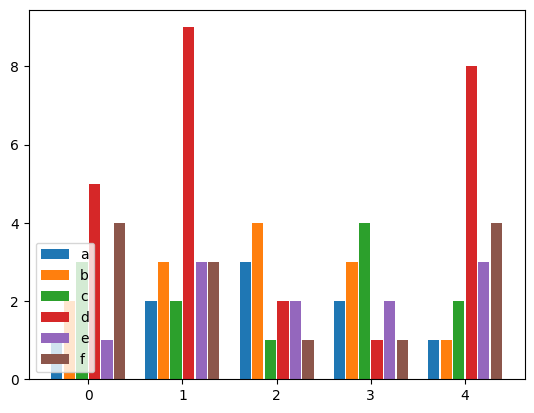

In [160]:
# copied from https://stackoverflow.com/questions/14270391/how-to-plot-multiple-bars-grouped
from matplotlib import pyplot as plt


def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys(), loc="lower left")


if __name__ == "__main__":
    # Usage example:
    data = {
        "a": [1, 2, 3, 2, 1],
        "b": [2, 3, 4, 3, 1],
        "c": [3, 2, 1, 4, 2],
        "d": [5, 9, 2, 1, 8],
        "e": [1, 3, 2, 2, 3],
        "f": [4, 3, 1, 1, 4],
    }

    fig, ax = plt.subplots()
    bar_plot(ax, data, total_width=.8, single_width=.9)
    plt.show()


{'chr_states_alpha': 0.7859430136066199, 'histone_mods_alpha': 0.8816768119094309, 'combined_alpha': 0.9817816701665683, 'chr_states_intragenic_alpha': 0.7595149734875326, 'histone_mods_intragenic_alpha': 0.9725095135531517, 'combined_intragenic_alpha': 0.9886708213383846, 'chr_states_beta': 0.486207863688943, 'histone_mods_beta': 0.6922806242409142, 'combined_beta': 0.7690824965105973, 'chr_states_intragenic_beta': 0.9190466602191072, 'histone_mods_intragenic_beta': 0.932808083726195, 'combined_intragenic_beta': 0.9626077933684531}


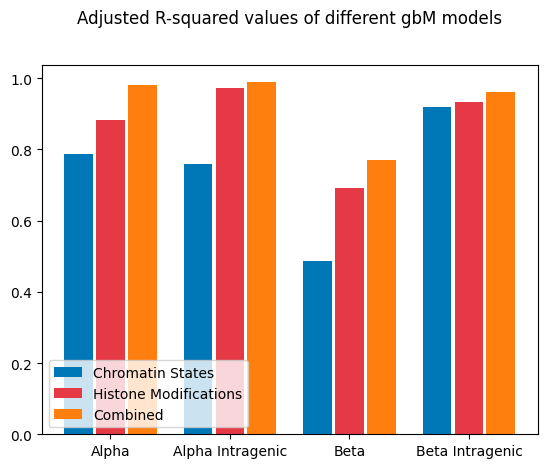

In [161]:
# Plot the r_squared values of different models
print(multiple_regression_results)

import matplotlib.pyplot as plt
import numpy as np

alpha_all = list(multiple_regression_results.items())[0:3]
alpha_intragenic = list(multiple_regression_results.items())[3:6]
beta_all = list(multiple_regression_results.items())[6:9]
beta_intragenic = list(multiple_regression_results.items())[9:12]

# # bar chart over all keys and values of multiple_regression_results, grouped into groups of three

data_grouped = {
    "Chromatin States": [alpha_all[0][1], alpha_intragenic[0][1], beta_all[0][1], beta_intragenic[0][1]],
    "Histone Modifications": [alpha_all[1][1], alpha_intragenic[1][1], beta_all[1][1], beta_intragenic[1][1]],
    "Combined": [alpha_all[2][1], alpha_intragenic[2][1], beta_all[2][1], beta_intragenic[2][1]]
}
fig, ax = plt.subplots()
bar_plot(ax, data_grouped, total_width=.8, single_width=.9, colors=[b,r,o])
plt.title("Adjusted R-squared values of different gbM models",pad=30)
plt.xticks(range(4), ["Alpha", "Alpha Intragenic", "Beta", "Beta Intragenic"])
plt.show()


# Model for UM Genes

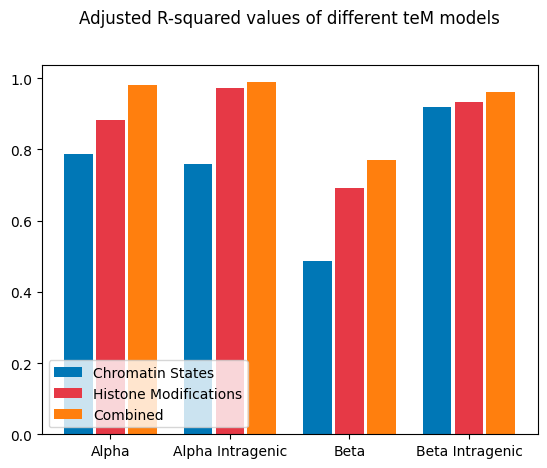

In [164]:
UM_data = pd.DataFrame.from_dict(UM_distribution, orient="columns")
UM_data.insert(0, "alpha", UM_alpha)
UM_data.insert(0, "beta", UM_beta)
UM_data_intragenic = UM_data.iloc[100:199]


UM_alpha_formula_cs = "alpha ~ " + " + ".join([s for s in UM_data.columns if s != "alpha" and s != "beta" and "S" in s])
UM_beta_formula_cs = "beta ~ " + " + ".join([s for s in UM_data.columns if s != "alpha" and s != "beta" and "S" in s])
UM_alpha_formula_hist_mods = "alpha ~ " + " + ".join([s for s in UM_data.columns if s != "alpha" and s != "beta" and "S" not in s])
UM_beta_formula_hist_mods = "beta ~ " + " + ".join([s for s in UM_data.columns if s != "alpha" and s != "beta" and "S" not in s])
UM_alpha_formula_combined = "alpha ~ " + " + ".join([s for s in UM_data.columns if s != "alpha" and s != "beta"])
UM_beta_formula_combined = "beta ~ " + " + ".join([s for s in UM_data.columns if s != "alpha" and s != "beta"])

UM_model_alpha_cs = ols(alpha_formula, UM_data).fit()
UM_model_beta_cs = ols(beta_formula, UM_data).fit()
UM_model_alpha_hist_mods = ols(alpha_formula, UM_data).fit()
UM_model_beta_hist_mods = ols(beta_formula, UM_data).fit()
UM_model_alpha_combined = ols(alpha_formula, UM_data).fit()
UM_model_beta_combined = ols(beta_formula, UM_data).fit()

UM_model_alpha_cs_intragenic = ols(alpha_formula, UM_data_intragenic).fit()
UM_model_beta_cs_intragenic = ols(beta_formula, UM_data_intragenic).fit()
UM_model_alpha_hist_mods_intragenic = ols(alpha_formula, UM_data_intragenic).fit()
UM_model_beta_hist_mods_intragenic = ols(beta_formula, UM_data_intragenic).fit()
UM_model_alpha_combined_intragenic = ols(alpha_formula, UM_data_intragenic).fit()
UM_model_beta_combined_intragenic = ols(beta_formula, UM_data_intragenic).fit()

UM_data_grouped = {
    "Chromatin States": [UM_model_alpha_cs.rsquared_adj, UM_model_alpha_cs_intragenic.rsquared_adj, UM_model_beta_cs.rsquared_adj, UM_model_beta_cs_intragenic.rsquared_adj],
    "Histone Modifications": [UM_model_alpha_hist_mods.rsquared_adj, UM_model_alpha_hist_mods_intragenic.rsquared_adj, UM_model_beta_hist_mods.rsquared_adj, UM_model_beta_hist_mods_intragenic.rsquared_adj],
    "Combined": [UM_model_alpha_combined.rsquared_adj, UM_model_alpha_combined_intragenic.rsquared_adj, UM_model_beta_combined.rsquared_adj, UM_model_beta_combined_intragenic.rsquared_adj]
}

fig, ax = plt.subplots()
bar_plot(ax, data_grouped, total_width=.8, single_width=.9, colors=[b,r,o])
plt.title("Adjusted R-squared values of different teM models",pad=30)
plt.xticks(range(4), ["Alpha", "Alpha Intragenic", "Beta", "Beta Intragenic"])
plt.show()



# Model for teM Genes

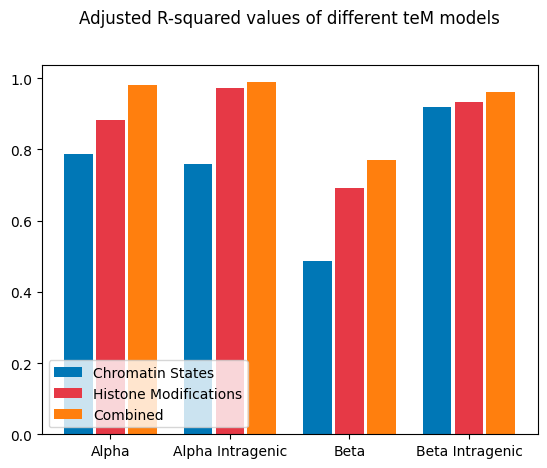

In [165]:
teM_data = pd.DataFrame.from_dict(teM_distribution, orient="columns")
teM_data.insert(0, "alpha", teM_alpha)
teM_data.insert(0, "beta", teM_beta)
teM_data_intragenic = teM_data.iloc[100:199]


teM_alpha_formula_cs = "alpha ~ " + " + ".join([s for s in teM_data.columns if s != "alpha" and s != "beta" and "S" in s])
teM_beta_formula_cs = "beta ~ " + " + ".join([s for s in teM_data.columns if s != "alpha" and s != "beta" and "S" in s])
teM_alpha_formula_hist_mods = "alpha ~ " + " + ".join([s for s in teM_data.columns if s != "alpha" and s != "beta" and "S" not in s])
teM_beta_formula_hist_mods = "beta ~ " + " + ".join([s for s in teM_data.columns if s != "alpha" and s != "beta" and "S" not in s])
teM_alpha_formula_combined = "alpha ~ " + " + ".join([s for s in teM_data.columns if s != "alpha" and s != "beta"])
teM_beta_formula_combined = "beta ~ " + " + ".join([s for s in teM_data.columns if s != "alpha" and s != "beta"])

teM_model_alpha_cs = ols(alpha_formula, teM_data).fit()
teM_model_beta_cs = ols(beta_formula, teM_data).fit()
teM_model_alpha_hist_mods = ols(alpha_formula, teM_data).fit()
teM_model_beta_hist_mods = ols(beta_formula, teM_data).fit()
teM_model_alpha_combined = ols(alpha_formula, teM_data).fit()
teM_model_beta_combined = ols(beta_formula, teM_data).fit()

teM_model_alpha_cs_intragenic = ols(alpha_formula, teM_data_intragenic).fit()
teM_model_beta_cs_intragenic = ols(beta_formula, teM_data_intragenic).fit()
teM_model_alpha_hist_mods_intragenic = ols(alpha_formula, teM_data_intragenic).fit()
teM_model_beta_hist_mods_intragenic = ols(beta_formula, teM_data_intragenic).fit()
teM_model_alpha_combined_intragenic = ols(alpha_formula, teM_data_intragenic).fit()
teM_model_beta_combined_intragenic = ols(beta_formula, teM_data_intragenic).fit()

teM_data_grouped = {
    "Chromatin States": [teM_model_alpha_cs.rsquared_adj, teM_model_alpha_cs_intragenic.rsquared_adj, teM_model_beta_cs.rsquared_adj, teM_model_beta_cs_intragenic.rsquared_adj],
    "Histone Modifications": [teM_model_alpha_hist_mods.rsquared_adj, teM_model_alpha_hist_mods_intragenic.rsquared_adj, teM_model_beta_hist_mods.rsquared_adj, teM_model_beta_hist_mods_intragenic.rsquared_adj],
    "Combined": [teM_model_alpha_combined.rsquared_adj, teM_model_alpha_combined_intragenic.rsquared_adj, teM_model_beta_combined.rsquared_adj, teM_model_beta_combined_intragenic.rsquared_adj]
}

fig, ax = plt.subplots()
bar_plot(ax, data_grouped, total_width=.8, single_width=.9, colors=[b,r,o])
plt.title("Adjusted R-squared values of different teM models",pad=30)
plt.xticks(range(4), ["Alpha", "Alpha Intragenic", "Beta", "Beta Intragenic"])
plt.show()



<Axes: >

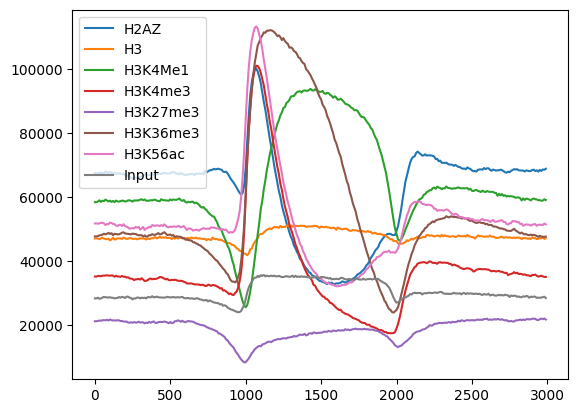

In [181]:
hist_mods.plot()

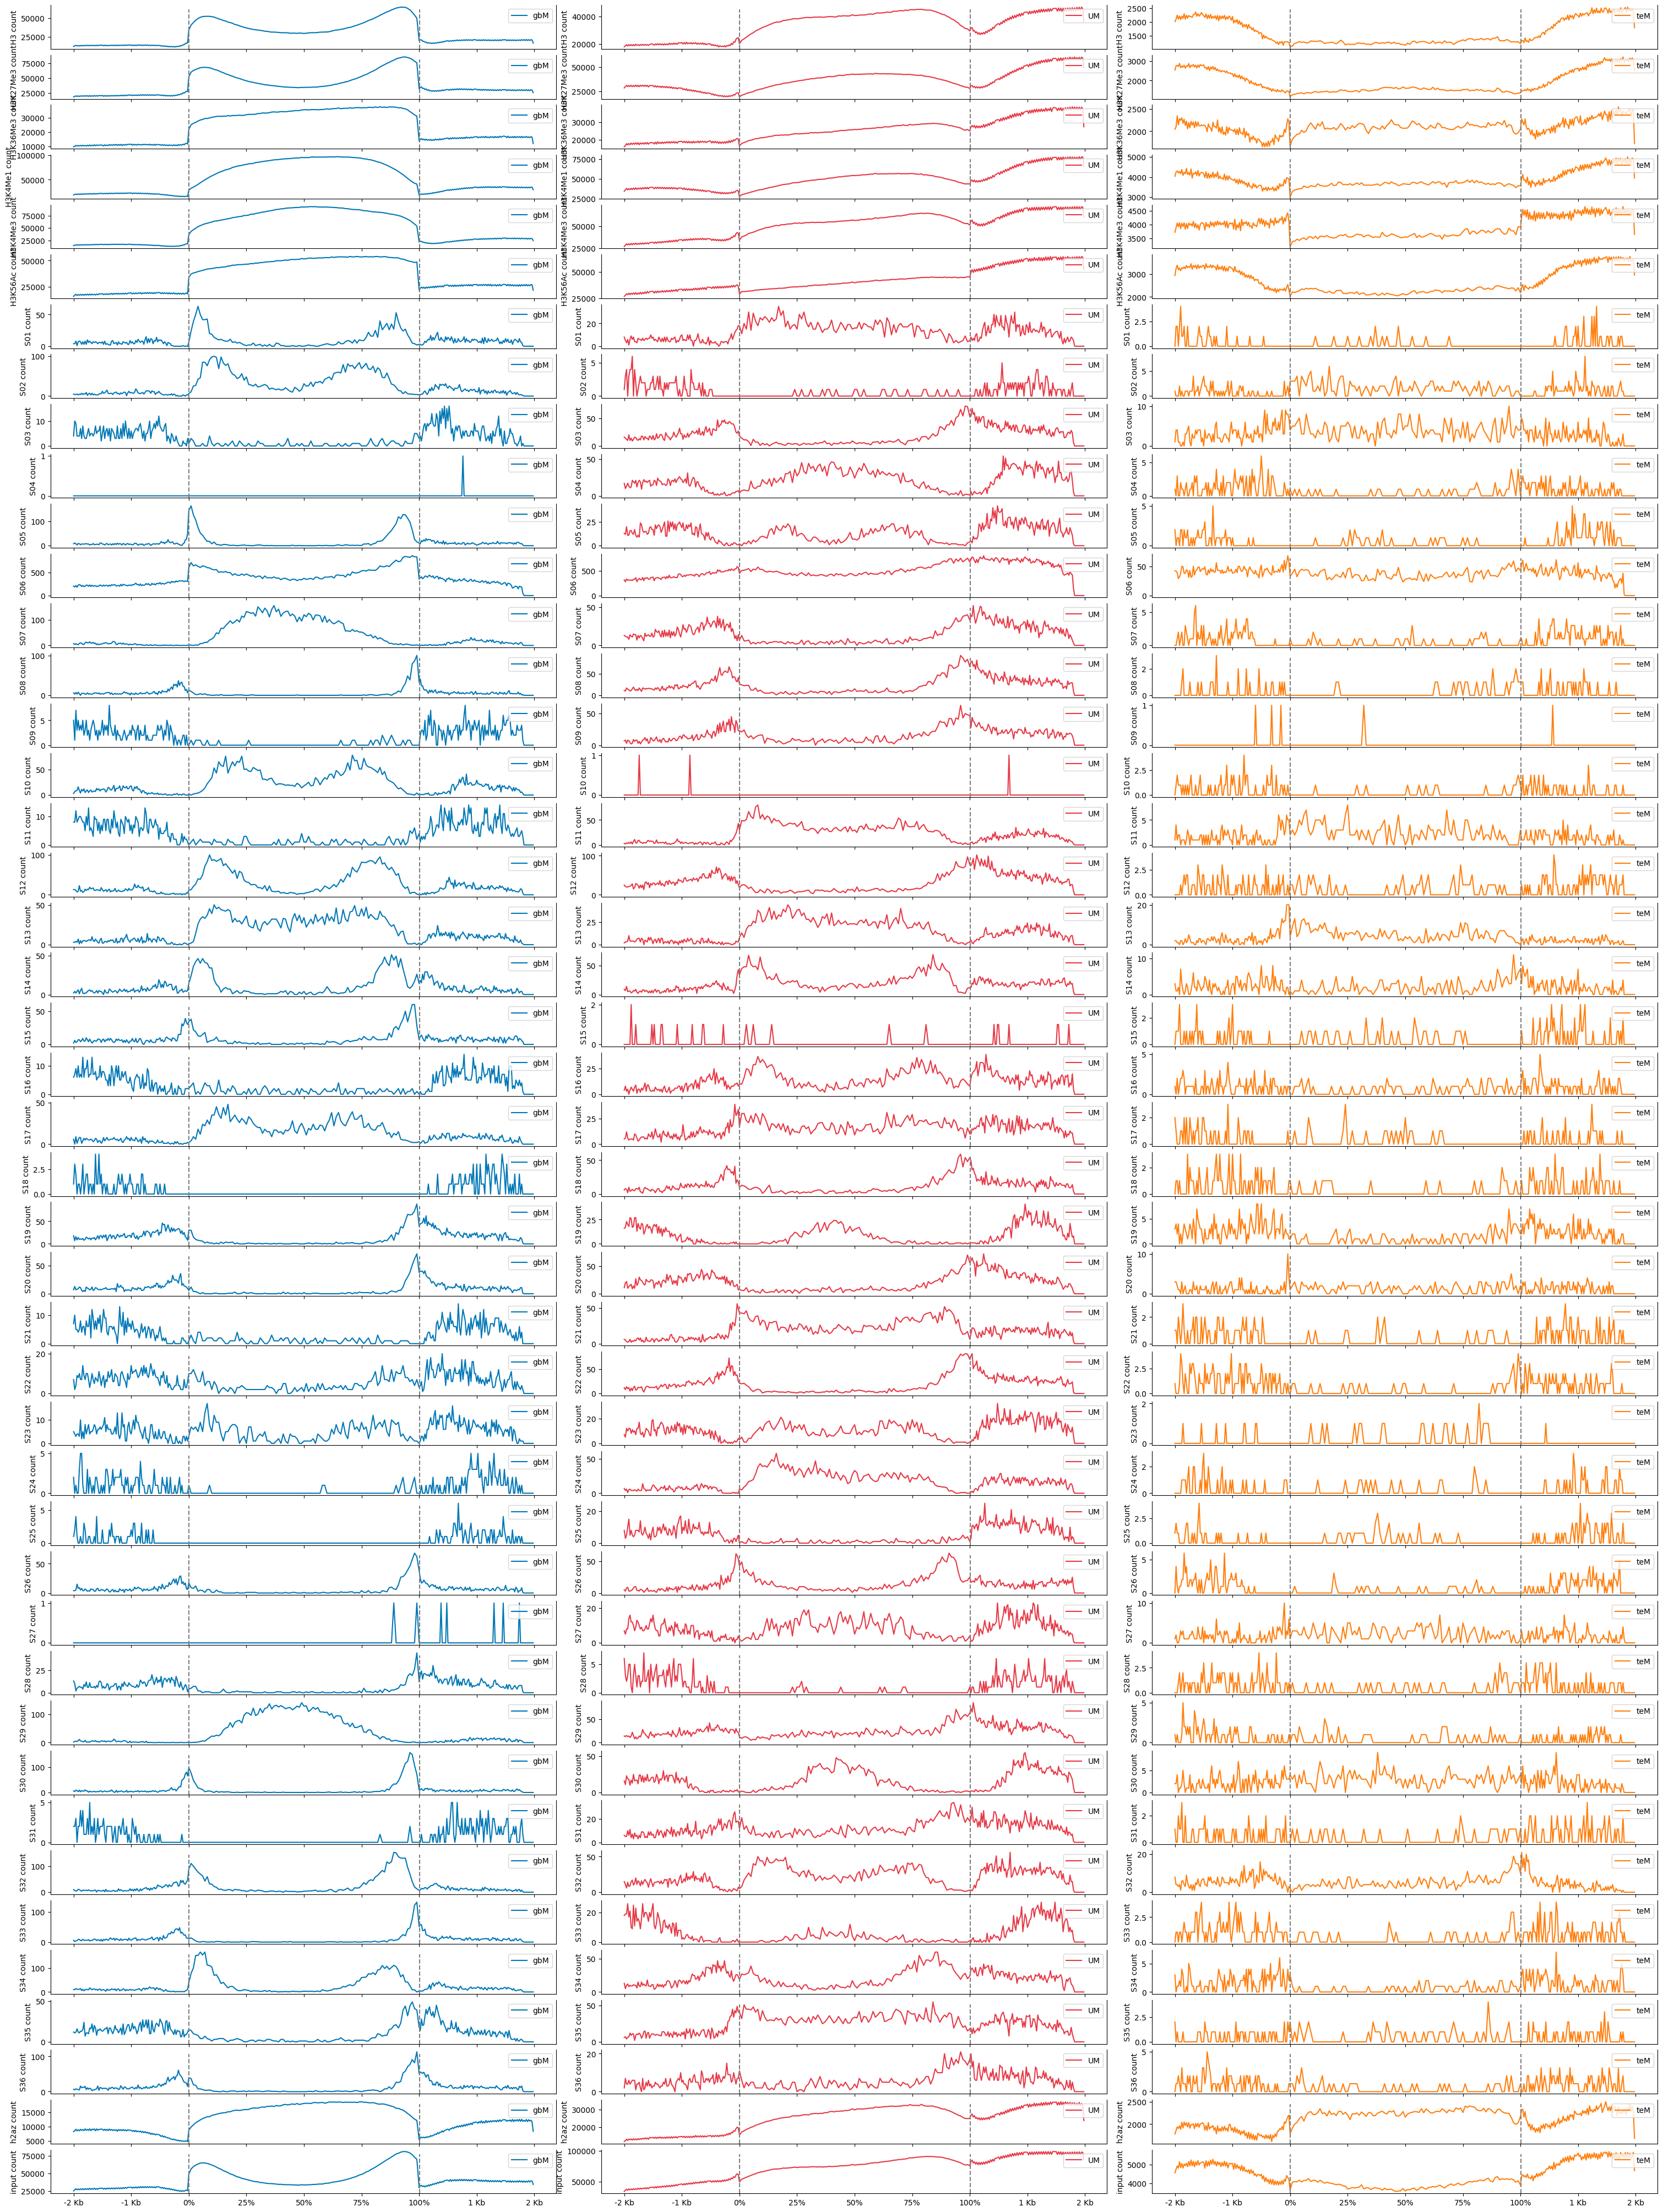

In [ ]:
dpi = 120

fig, axes = plt.subplots(len(gbM_distribution),3 ,sharex=True, figsize=(30,40)) 

r = "#e63946"
b = "#0077b6"
o = "C1"



ax1 = axes[0]
for subaxis in ax1: 
    subaxis.xaxis.set_major_formatter(plt.FuncFormatter(format_tick))
    subaxis.annotate("TSS", xy=(0,0), xytext=(-40, 0.55),  color='C7', fontsize=12)
    subaxis.annotate("TTS", xy=(100,0), xytext=(962, 0.55),  color='C7', fontsize=12)

for ((ax1, ax2, ax3), (state, gbM_windows), (_, UM_windows), (_, teM_windows)) in zip(axes, gbM_distribution.items(), UM_distribution.items(), teM_distribution.items()):
   
    ax1.plot(x, gbM_windows, b)
    ax2.plot(x, UM_windows, r)
    ax3.plot(x, teM_windows, o)

    def format_tick(x, pos): 
        if x < 0: 
            return f'{(x //250):.0f} Kb'
        elif x <= 1000:
            return f'{(x/10):.0f}%'
        else:
            return f'{((x -1000) // 250):.0f} Kb'
        
    ax1.axvline(x=1,ymax=0.9, color='C7', linestyle='--')
    ax1.axvline(x=1001, ymax=0.9,color='C7', linestyle='--')
    ax1.legend(['gbM'], loc='upper right')
    ax1.set_ylabel(f'{state} count')
    ax1.spines['top'].set_visible(False)

    ax2.axvline(x=1,ymax=0.9, color='C7', linestyle='--')
    ax2.axvline(x=1001, ymax=0.9,color='C7', linestyle='--')
    ax2.legend([ "UM"], loc='upper right')
    ax2.set_ylabel(f'{state} count')
    ax2.spines['top'].set_visible(False)

    ax3.axvline(x=1,ymax=0.9, color='C7', linestyle='--')
    ax3.axvline(x=1001, ymax=0.9,color='C7', linestyle='--')
    ax3.legend([ "teM"], loc='upper right')
    ax3.set_ylabel(f'{state} count')
    ax3.spines['top'].set_visible(False)


fig.tight_layout(pad=0)
plt.savefig("cs.jpg", dpi=200, bbox_inches="tight", pad_inches = 1)
plt.show()

# Fig. 3D

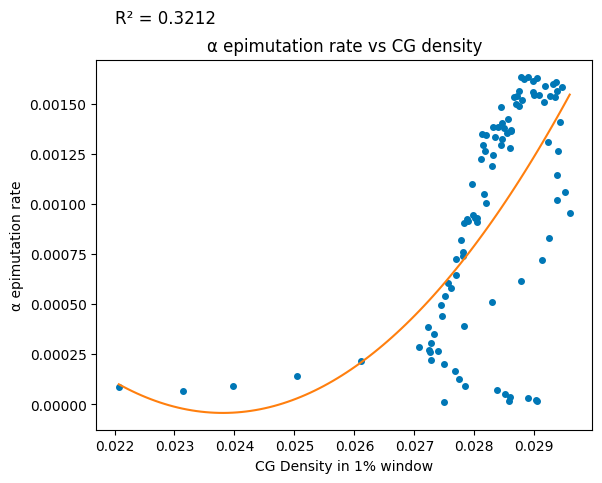

In [ ]:
intragenic_cg_density = cg_density[101:200] 
intragenic_alpha = alpha[101:200]


z = list(zip(intragenic_cg_density, intragenic_alpha))
z = np.array(z,dtype=[('cg_density', float), ('alpha', float)])
s = np.sort(z, order='cg_density' )
cg_dens,alph = zip(*s)



p = np.polyfit(intragenic_cg_density, intragenic_alpha, 2)
x = np.linspace(min(intragenic_cg_density), max(intragenic_cg_density), num=100)


plt.plot(cg_dens, alph, 'o', color=b, markersize=4)
plt.title("α epimutation rate vs CG density")
plt.plot(x, np.poly1d(p)(x), color='C1')
plt.text(0.022, 0.0019, f"R² = 0.3212", fontsize=12)
plt.xlabel("CG Density in 1% window")
plt.ylabel("α epimutation rate")
plt.savefig("3_D.png", dpi=450, ) # TODO: alpha label not readable
plt.show()


## Fig. 3E 

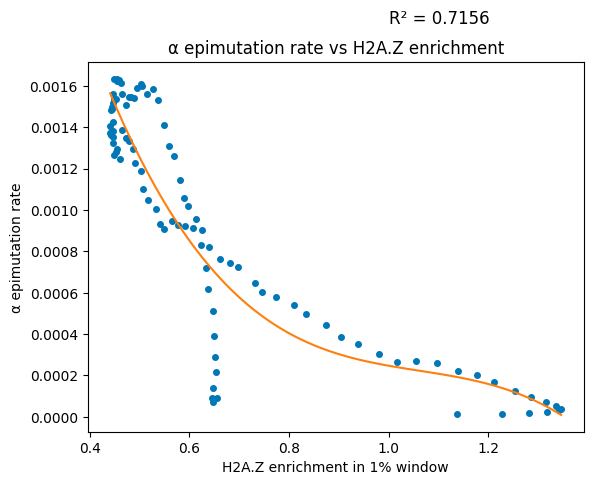

In [ ]:
intragenic_h2az = h2az[101:200]
intragenic_alpha = alpha[101:200]


z = list(zip(intragenic_h2az, intragenic_alpha))
z = np.array(z,dtype=[('cg_density', float), ('alpha', float)])
s = np.sort(z, order='cg_density' )
cg_dens,alph = zip(*s)



p = np.polyfit(intragenic_h2az, intragenic_alpha, 3)
x = np.linspace(min(intragenic_h2az), max(intragenic_h2az), num=100)


plt.plot(cg_dens, alph, 'o', color=b, markersize=4)
plt.title("α epimutation rate vs H2A.Z enrichment")
plt.plot(x, np.poly1d(p)(x), color='C1')
plt.text(1, 0.0019, f"R² = 0.7156", fontsize=12)
plt.xlabel("H2A.Z enrichment in 1% window")
plt.ylabel("α epimutation rate")
plt.savefig("3_E.png", dpi=450) # TODO: alpha label not readable
plt.show()

# Fig. 1C 

Column Chart for Steady State

/tmp/ipykernel_114570/1567519545.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(gens)


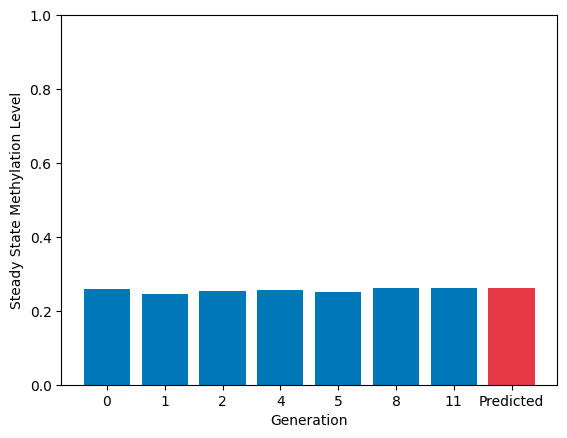

In [ ]:

gens = ['', 0,1,2,4,5,8,11, "Predicted"]

# Create a figure and axes objects
fig, ax = plt.subplots()

# Create a list of colors for the columns
colors = [b] * 7 + [r] 

# Create the bar chart with custom colors
ax.bar(range(8), np.array(meth_lvl, dtype=np.float32), color=colors)

# Set the x-axis tick labels
ax.set_xticklabels(gens)
ax.set_ybound(0.0, 1.0)

# Set the title and axis labels
ax.set_xlabel('Generation')
ax.set_ylabel('Steady State Methylation Level')

# Show the plot
plt.savefig("1C.png", dpi=450)
plt.show()



## Fig. 1B

Divergence over Time

The optained Z-Score 16.00161281731142 leads to a p-value of 1.0000202970953328e-56, which rejects the Null-Hypothesis


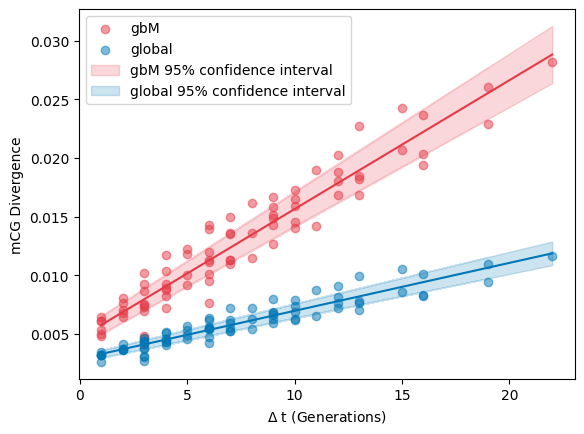

In [ ]:
from scipy import stats

delta_t = D_dt[:,D_dt_headers.index("delta_t")]
D_gbM = D_dt[:,D_dt_headers.index("gbM")]
D_global = D_dt[:,D_dt_headers.index("all")]


fit_gbM = np.poly1d(np.polyfit(delta_t, D_gbM, 1))
fit_global = np.poly1d(np.polyfit(delta_t, D_global, 1))

lr_gbM = stats.linregress(delta_t, D_gbM)
lr_global = stats.linregress(delta_t, D_global)

x = np.linspace(min(delta_t), max(delta_t), num=100)

# Hypothesis test
# Nullhypthesis: slope (aka mutation rate) is the same between the two regions
# Alternative: the slope is different
# alpha < 0.05
# Using the Z-Test:  Clogg, C. C., Petkova, E., & Haritou, A. (1995). Statistical methods for comparing regression coefficients between models. American Journal of Sociology, 100(5), 1261–1293. https://doi.org/10.1086/230638
z = lambda b1, b2, stderr_b1, stderr_b2: (b1 - b2) / np.sqrt(stderr_b1**2 + stderr_b2**2)

Z = z(lr_gbM.slope, lr_global.slope, lr_gbM.stderr, lr_global.stderr)
p = stats.norm.pdf(Z)

print(f"The optained Z-Score {Z} leads to a p-value of {p}, which rejects the Null-Hypothesis")





# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
ts = abs(stats.t.ppf(0.05/2, len(D_gbM)-2))


plt.scatter(delta_t, D_gbM, color=r, alpha=0.5, label="gbM")
plt.scatter(delta_t, D_global, color=b, alpha= 0.5, label = "global")
plt.fill_between(delta_t, delta_t * (lr_gbM.slope -  ts * lr_gbM.stderr) + lr_gbM.intercept - ts*lr_gbM.intercept_stderr, delta_t * (lr_gbM.slope + ts * lr_gbM.stderr) + lr_gbM.intercept  + ts*lr_gbM.intercept_stderr, color=r, alpha=0.2, label="gbM 95% confidence interval")
plt.fill_between(delta_t, delta_t * (lr_global.slope -  ts * lr_global.stderr) + lr_global.intercept - ts*lr_global.intercept_stderr, delta_t * (lr_global.slope + ts * lr_global.stderr) + lr_global.intercept  + ts*lr_global.intercept_stderr, color=b, alpha=0.2, label="global 95% confidence interval")

plt.legend()
plt.ylabel("mCG Divergence")
plt.xlabel("$\Delta$ t (Generations)")
plt.plot(x, fit_gbM(x), color=r)
plt.plot(x, fit_global(x), color=b)
plt.savefig("1D.png", dpi=450)
plt.show()


# Chromatine States

## Plotting chromatine states